# Overview

This notebook shows how to run a Langeving simulation and analyse the results using Mean Force Integration.

The notebook will be structured as follows:

 - Mean Force Integration in 1D
 - Mean Force Integration in 2D
 - Patching simulations in 2D
 
Some functions are taken from the Functions.ipynb file. Please refere to previous notebooks for more information.

In [2]:
#Import modules like numpy and matplotlib as well as functions defined in Functions.ipynb
%run Functions.ipynb

In [3]:
#make sure to run this cell in the right directory!!
path = os.getcwd()
print("The path to this notebook is:", path)

The path to this notebook is: /home/antoniu/Desktop/Public_Notebooks


# Define analytical free energy surface

The analytical free energy surface will be defined as $y(x) = 7*x^4-23*x^2$

It will be used to run Langevin dynamics simulations.

In [3]:
#Define the grid on which the mean force and the FES is calculated.
nbins = 401   
min_x = -2           
max_x = 2
grid_space = (max_x - min_x) / (nbins-1)
x = np.linspace(min_x,max_x,nbins)

#Define the analytical surface
y = 7*x**4 - 23*x**2
y = y - min(y)          #Set minima to 0

# Mean Force Integration

Mean Force Integration (MFI) is a method that analyses the trajectory and biases of a Metadynaimcs simulation. Using MFI, one can calculate the mean force, which can then be integrated to obtain the FES. 

More about the theory can be read in the origianl paper: Veselina Marinova and Matteo Salvalaglio, Time-independent free energies from metadynamics via mean force integration. Journal of Chemical Physics, 151, 10 2019.

In the next cells, it is shown how MFI can be implemented.

Frist the input files are written and a simulation is started.

In [7]:
os.chdir(path)
try: os.mkdir("MFI")
except: print("folder \"MFI\" already exists")
os.chdir("MFI")

#Runnig the simulation works the same way as for metadynamcis and WT-metadynamics, but
#one doesnt need to do the reweighting or calculate the histogram, just save the
#trajectory and the HILLS. Idealy, the ration of trajectory points to HILLS should be 10.

def run_langevin1D(length, sigma=0.1, height=0.1, biasfactor=10):
    with open("plumed.dat","w") as f:
        print("""p: DISTANCE ATOMS=1,2 COMPONENTS
ff: MATHEVAL ARG=p.x PERIODIC=NO FUNC=(7*x^4-23*x^2)
bb: BIASVALUE ARG=ff
METAD ARG=p.x PACE=100 SIGMA={} HEIGHT={} GRID_MIN=-3 GRID_MAX=3 GRID_BIN=200 BIASFACTOR={} TEMP=120
PRINT FILE=position ARG=p.x STRIDE=10""".format(sigma,height, biasfactor),file=f)

    with open("input","w") as f:
        print("""temperature 1
tstep 0.005
friction 1
dimension 1
nstep {}
ipos -1.0
periodic false""".format(length),file=f)
    
    #Start WT-Metadynamic simulation
    !plumed pesmd < input
    
run_langevin1D_plumed(1000000)

folder "MFI" already exists
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Mar  8 2021 at 17:46:23
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/antoniu/.local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /home/antoniu/.local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: pesmd
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 2
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action DISTANCE
PLUMED:   with label p
PLUMED:   between atoms 1 2
PLUMED:   using periodic boundary conditions
PLUMED:   added component to this action:  p.x 
PLUMED:   added component to this action:  p.y 
PLUMED:   added component to this action:  p.z 
PLUMED:   WARNING: components will

Doing step 6020
Doing step 6040
Doing step 6060
Doing step 6080
Doing step 6100
Doing step 6120
Doing step 6140
Doing step 6160
Doing step 6180
Doing step 6200
Doing step 6220
Doing step 6240
Doing step 6260
Doing step 6280
Doing step 6300
Doing step 6320
Doing step 6340
Doing step 6360
Doing step 6380
Doing step 6400
Doing step 6420
Doing step 6440
Doing step 6460
Doing step 6480
Doing step 6500
Doing step 6520
Doing step 6540
Doing step 6560
Doing step 6580
Doing step 6600
Doing step 6620
Doing step 6640
Doing step 6660
Doing step 6680
Doing step 6700
Doing step 6720
Doing step 6740
Doing step 6760
Doing step 6780
Doing step 6800
Doing step 6820
Doing step 6840
Doing step 6860
Doing step 6880
Doing step 6900
Doing step 6920
Doing step 6940
Doing step 6960
Doing step 6980
Doing step 7000
Doing step 7020
Doing step 7040
Doing step 7060
Doing step 7080
Doing step 7100
Doing step 7120
Doing step 7140
Doing step 7160
Doing step 7180
Doing step 7200
Doing step 7220
Doing step 7240
Doing st

Doing step 16240
Doing step 16260
Doing step 16280
Doing step 16300
Doing step 16320
Doing step 16340
Doing step 16360
Doing step 16380
Doing step 16400
Doing step 16420
Doing step 16440
Doing step 16460
Doing step 16480
Doing step 16500
Doing step 16520
Doing step 16540
Doing step 16560
Doing step 16580
Doing step 16600
Doing step 16620
Doing step 16640
Doing step 16660
Doing step 16680
Doing step 16700
Doing step 16720
Doing step 16740
Doing step 16760
Doing step 16780
Doing step 16800
Doing step 16820
Doing step 16840
Doing step 16860
Doing step 16880
Doing step 16900
Doing step 16920
Doing step 16940
Doing step 16960
Doing step 16980
Doing step 17000
Doing step 17020
Doing step 17040
Doing step 17060
Doing step 17080
Doing step 17100
Doing step 17120
Doing step 17140
Doing step 17160
Doing step 17180
Doing step 17200
Doing step 17220
Doing step 17240
Doing step 17260
Doing step 17280
Doing step 17300
Doing step 17320
Doing step 17340
Doing step 17360
Doing step 17380
Doing step 174

Doing step 26100
Doing step 26120
Doing step 26140
Doing step 26160
Doing step 26180
Doing step 26200
Doing step 26220
Doing step 26240
Doing step 26260
Doing step 26280
Doing step 26300
Doing step 26320
Doing step 26340
Doing step 26360
Doing step 26380
Doing step 26400
Doing step 26420
Doing step 26440
Doing step 26460
Doing step 26480
Doing step 26500
Doing step 26520
Doing step 26540
Doing step 26560
Doing step 26580
Doing step 26600
Doing step 26620
Doing step 26640
Doing step 26660
Doing step 26680
Doing step 26700
Doing step 26720
Doing step 26740
Doing step 26760
Doing step 26780
Doing step 26800
Doing step 26820
Doing step 26840
Doing step 26860
Doing step 26880
Doing step 26900
Doing step 26920
Doing step 26940
Doing step 26960
Doing step 26980
Doing step 27000
Doing step 27020
Doing step 27040
Doing step 27060
Doing step 27080
Doing step 27100
Doing step 27120
Doing step 27140
Doing step 27160
Doing step 27180
Doing step 27200
Doing step 27220
Doing step 27240
Doing step 272

Doing step 43940
Doing step 43960
Doing step 43980
Doing step 44000
Doing step 44020
Doing step 44040
Doing step 44060
Doing step 44080
Doing step 44100
Doing step 44120
Doing step 44140
Doing step 44160
Doing step 44180
Doing step 44200
Doing step 44220
Doing step 44240
Doing step 44260
Doing step 44280
Doing step 44300
Doing step 44320
Doing step 44340
Doing step 44360
Doing step 44380
Doing step 44400
Doing step 44420
Doing step 44440
Doing step 44460
Doing step 44480
Doing step 44500
Doing step 44520
Doing step 44540
Doing step 44560
Doing step 44580
Doing step 44600
Doing step 44620
Doing step 44640
Doing step 44660
Doing step 44680
Doing step 44700
Doing step 44720
Doing step 44740
Doing step 44760
Doing step 44780
Doing step 44800
Doing step 44820
Doing step 44840
Doing step 44860
Doing step 44880
Doing step 44900
Doing step 44920
Doing step 44940
Doing step 44960
Doing step 44980
Doing step 45000
Doing step 45020
Doing step 45040
Doing step 45060
Doing step 45080
Doing step 451

Doing step 53840
Doing step 53860
Doing step 53880
Doing step 53900
Doing step 53920
Doing step 53940
Doing step 53960
Doing step 53980
Doing step 54000
Doing step 54020
Doing step 54040
Doing step 54060
Doing step 54080
Doing step 54100
Doing step 54120
Doing step 54140
Doing step 54160
Doing step 54180
Doing step 54200
Doing step 54220
Doing step 54240
Doing step 54260
Doing step 54280
Doing step 54300
Doing step 54320
Doing step 54340
Doing step 54360
Doing step 54380
Doing step 54400
Doing step 54420
Doing step 54440
Doing step 54460
Doing step 54480
Doing step 54500
Doing step 54520
Doing step 54540
Doing step 54560
Doing step 54580
Doing step 54600
Doing step 54620
Doing step 54640
Doing step 54660
Doing step 54680
Doing step 54700
Doing step 54720
Doing step 54740
Doing step 54760
Doing step 54780
Doing step 54800
Doing step 54820
Doing step 54840
Doing step 54860
Doing step 54880
Doing step 54900
Doing step 54920
Doing step 54940
Doing step 54960
Doing step 54980
Doing step 550

Doing step 65060
Doing step 65080
Doing step 65100
Doing step 65120
Doing step 65140
Doing step 65160
Doing step 65180
Doing step 65200
Doing step 65220
Doing step 65240
Doing step 65260
Doing step 65280
Doing step 65300
Doing step 65320
Doing step 65340
Doing step 65360
Doing step 65380
Doing step 65400
Doing step 65420
Doing step 65440
Doing step 65460
Doing step 65480
Doing step 65500
Doing step 65520
Doing step 65540
Doing step 65560
Doing step 65580
Doing step 65600
Doing step 65620
Doing step 65640
Doing step 65660
Doing step 65680
Doing step 65700
Doing step 65720
Doing step 65740
Doing step 65760
Doing step 65780
Doing step 65800
Doing step 65820
Doing step 65840
Doing step 65860
Doing step 65880
Doing step 65900
Doing step 65920
Doing step 65940
Doing step 65960
Doing step 65980
Doing step 66000
Doing step 66020
Doing step 66040
Doing step 66060
Doing step 66080
Doing step 66100
Doing step 66120
Doing step 66140
Doing step 66160
Doing step 66180
Doing step 66200
Doing step 662

Doing step 74940
Doing step 74960
Doing step 74980
Doing step 75000
Doing step 75020
Doing step 75040
Doing step 75060
Doing step 75080
Doing step 75100
Doing step 75120
Doing step 75140
Doing step 75160
Doing step 75180
Doing step 75200
Doing step 75220
Doing step 75240
Doing step 75260
Doing step 75280
Doing step 75300
Doing step 75320
Doing step 75340
Doing step 75360
Doing step 75380
Doing step 75400
Doing step 75420
Doing step 75440
Doing step 75460
Doing step 75480
Doing step 75500
Doing step 75520
Doing step 75540
Doing step 75560
Doing step 75580
Doing step 75600
Doing step 75620
Doing step 75640
Doing step 75660
Doing step 75680
Doing step 75700
Doing step 75720
Doing step 75740
Doing step 75760
Doing step 75780
Doing step 75800
Doing step 75820
Doing step 75840
Doing step 75860
Doing step 75880
Doing step 75900
Doing step 75920
Doing step 75940
Doing step 75960
Doing step 75980
Doing step 76000
Doing step 76020
Doing step 76040
Doing step 76060
Doing step 76080
Doing step 761

Doing step 85240
Doing step 85260
Doing step 85280
Doing step 85300
Doing step 85320
Doing step 85340
Doing step 85360
Doing step 85380
Doing step 85400
Doing step 85420
Doing step 85440
Doing step 85460
Doing step 85480
Doing step 85500
Doing step 85520
Doing step 85540
Doing step 85560
Doing step 85580
Doing step 85600
Doing step 85620
Doing step 85640
Doing step 85660
Doing step 85680
Doing step 85700
Doing step 85720
Doing step 85740
Doing step 85760
Doing step 85780
Doing step 85800
Doing step 85820
Doing step 85840
Doing step 85860
Doing step 85880
Doing step 85900
Doing step 85920
Doing step 85940
Doing step 85960
Doing step 85980
Doing step 86000
Doing step 86020
Doing step 86040
Doing step 86060
Doing step 86080
Doing step 86100
Doing step 86120
Doing step 86140
Doing step 86160
Doing step 86180
Doing step 86200
Doing step 86220
Doing step 86240
Doing step 86260
Doing step 86280
Doing step 86300
Doing step 86320
Doing step 86340
Doing step 86360
Doing step 86380
Doing step 864

Doing step 95360
Doing step 95380
Doing step 95400
Doing step 95420
Doing step 95440
Doing step 95460
Doing step 95480
Doing step 95500
Doing step 95520
Doing step 95540
Doing step 95560
Doing step 95580
Doing step 95600
Doing step 95620
Doing step 95640
Doing step 95660
Doing step 95680
Doing step 95700
Doing step 95720
Doing step 95740
Doing step 95760
Doing step 95780
Doing step 95800
Doing step 95820
Doing step 95840
Doing step 95860
Doing step 95880
Doing step 95900
Doing step 95920
Doing step 95940
Doing step 95960
Doing step 95980
Doing step 96000
Doing step 96020
Doing step 96040
Doing step 96060
Doing step 96080
Doing step 96100
Doing step 96120
Doing step 96140
Doing step 96160
Doing step 96180
Doing step 96200
Doing step 96220
Doing step 96240
Doing step 96260
Doing step 96280
Doing step 96300
Doing step 96320
Doing step 96340
Doing step 96360
Doing step 96380
Doing step 96400
Doing step 96420
Doing step 96440
Doing step 96460
Doing step 96480
Doing step 96500
Doing step 965

Doing step 105740
Doing step 105760
Doing step 105780
Doing step 105800
Doing step 105820
Doing step 105840
Doing step 105860
Doing step 105880
Doing step 105900
Doing step 105920
Doing step 105940
Doing step 105960
Doing step 105980
Doing step 106000
Doing step 106020
Doing step 106040
Doing step 106060
Doing step 106080
Doing step 106100
Doing step 106120
Doing step 106140
Doing step 106160
Doing step 106180
Doing step 106200
Doing step 106220
Doing step 106240
Doing step 106260
Doing step 106280
Doing step 106300
Doing step 106320
Doing step 106340
Doing step 106360
Doing step 106380
Doing step 106400
Doing step 106420
Doing step 106440
Doing step 106460
Doing step 106480
Doing step 106500
Doing step 106520
Doing step 106540
Doing step 106560
Doing step 106580
Doing step 106600
Doing step 106620
Doing step 106640
Doing step 106660
Doing step 106680
Doing step 106700
Doing step 106720
Doing step 106740
Doing step 106760
Doing step 106780
Doing step 106800
Doing step 106820
Doing step

Doing step 115300
Doing step 115320
Doing step 115340
Doing step 115360
Doing step 115380
Doing step 115400
Doing step 115420
Doing step 115440
Doing step 115460
Doing step 115480
Doing step 115500
Doing step 115520
Doing step 115540
Doing step 115560
Doing step 115580
Doing step 115600
Doing step 115620
Doing step 115640
Doing step 115660
Doing step 115680
Doing step 115700
Doing step 115720
Doing step 115740
Doing step 115760
Doing step 115780
Doing step 115800
Doing step 115820
Doing step 115840
Doing step 115860
Doing step 115880
Doing step 115900
Doing step 115920
Doing step 115940
Doing step 115960
Doing step 115980
Doing step 116000
Doing step 116020
Doing step 116040
Doing step 116060
Doing step 116080
Doing step 116100
Doing step 116120
Doing step 116140
Doing step 116160
Doing step 116180
Doing step 116200
Doing step 116220
Doing step 116240
Doing step 116260
Doing step 116280
Doing step 116300
Doing step 116320
Doing step 116340
Doing step 116360
Doing step 116380
Doing step

Doing step 125440
Doing step 125460
Doing step 125480
Doing step 125500
Doing step 125520
Doing step 125540
Doing step 125560
Doing step 125580
Doing step 125600
Doing step 125620
Doing step 125640
Doing step 125660
Doing step 125680
Doing step 125700
Doing step 125720
Doing step 125740
Doing step 125760
Doing step 125780
Doing step 125800
Doing step 125820
Doing step 125840
Doing step 125860
Doing step 125880
Doing step 125900
Doing step 125920
Doing step 125940
Doing step 125960
Doing step 125980
Doing step 126000
Doing step 126020
Doing step 126040
Doing step 126060
Doing step 126080
Doing step 126100
Doing step 126120
Doing step 126140
Doing step 126160
Doing step 126180
Doing step 126200
Doing step 126220
Doing step 126240
Doing step 126260
Doing step 126280
Doing step 126300
Doing step 126320
Doing step 126340
Doing step 126360
Doing step 126380
Doing step 126400
Doing step 126420
Doing step 126440
Doing step 126460
Doing step 126480
Doing step 126500
Doing step 126520
Doing step

Doing step 135780
Doing step 135800
Doing step 135820
Doing step 135840
Doing step 135860
Doing step 135880
Doing step 135900
Doing step 135920
Doing step 135940
Doing step 135960
Doing step 135980
Doing step 136000
Doing step 136020
Doing step 136040
Doing step 136060
Doing step 136080
Doing step 136100
Doing step 136120
Doing step 136140
Doing step 136160
Doing step 136180
Doing step 136200
Doing step 136220
Doing step 136240
Doing step 136260
Doing step 136280
Doing step 136300
Doing step 136320
Doing step 136340
Doing step 136360
Doing step 136380
Doing step 136400
Doing step 136420
Doing step 136440
Doing step 136460
Doing step 136480
Doing step 136500
Doing step 136520
Doing step 136540
Doing step 136560
Doing step 136580
Doing step 136600
Doing step 136620
Doing step 136640
Doing step 136660
Doing step 136680
Doing step 136700
Doing step 136720
Doing step 136740
Doing step 136760
Doing step 136780
Doing step 136800
Doing step 136820
Doing step 136840
Doing step 136860
Doing step

Doing step 146360
Doing step 146380
Doing step 146400
Doing step 146420
Doing step 146440
Doing step 146460
Doing step 146480
Doing step 146500
Doing step 146520
Doing step 146540
Doing step 146560
Doing step 146580
Doing step 146600
Doing step 146620
Doing step 146640
Doing step 146660
Doing step 146680
Doing step 146700
Doing step 146720
Doing step 146740
Doing step 146760
Doing step 146780
Doing step 146800
Doing step 146820
Doing step 146840
Doing step 146860
Doing step 146880
Doing step 146900
Doing step 146920
Doing step 146940
Doing step 146960
Doing step 146980
Doing step 147000
Doing step 147020
Doing step 147040
Doing step 147060
Doing step 147080
Doing step 147100
Doing step 147120
Doing step 147140
Doing step 147160
Doing step 147180
Doing step 147200
Doing step 147220
Doing step 147240
Doing step 147260
Doing step 147280
Doing step 147300
Doing step 147320
Doing step 147340
Doing step 147360
Doing step 147380
Doing step 147400
Doing step 147420
Doing step 147440
Doing step

Doing step 156540
Doing step 156560
Doing step 156580
Doing step 156600
Doing step 156620
Doing step 156640
Doing step 156660
Doing step 156680
Doing step 156700
Doing step 156720
Doing step 156740
Doing step 156760
Doing step 156780
Doing step 156800
Doing step 156820
Doing step 156840
Doing step 156860
Doing step 156880
Doing step 156900
Doing step 156920
Doing step 156940
Doing step 156960
Doing step 156980
Doing step 157000
Doing step 157020
Doing step 157040
Doing step 157060
Doing step 157080
Doing step 157100
Doing step 157120
Doing step 157140
Doing step 157160
Doing step 157180
Doing step 157200
Doing step 157220
Doing step 157240
Doing step 157260
Doing step 157280
Doing step 157300
Doing step 157320
Doing step 157340
Doing step 157360
Doing step 157380
Doing step 157400
Doing step 157420
Doing step 157440
Doing step 157460
Doing step 157480
Doing step 157500
Doing step 157520
Doing step 157540
Doing step 157560
Doing step 157580
Doing step 157600
Doing step 157620
Doing step

Doing step 176500
Doing step 176520
Doing step 176540
Doing step 176560
Doing step 176580
Doing step 176600
Doing step 176620
Doing step 176640
Doing step 176660
Doing step 176680
Doing step 176700
Doing step 176720
Doing step 176740
Doing step 176760
Doing step 176780
Doing step 176800
Doing step 176820
Doing step 176840
Doing step 176860
Doing step 176880
Doing step 176900
Doing step 176920
Doing step 176940
Doing step 176960
Doing step 176980
Doing step 177000
Doing step 177020
Doing step 177040
Doing step 177060
Doing step 177080
Doing step 177100
Doing step 177120
Doing step 177140
Doing step 177160
Doing step 177180
Doing step 177200
Doing step 177220
Doing step 177240
Doing step 177260
Doing step 177280
Doing step 177300
Doing step 177320
Doing step 177340
Doing step 177360
Doing step 177380
Doing step 177400
Doing step 177420
Doing step 177440
Doing step 177460
Doing step 177480
Doing step 177500
Doing step 177520
Doing step 177540
Doing step 177560
Doing step 177580
Doing step

Doing step 185980
Doing step 186000
Doing step 186020
Doing step 186040
Doing step 186060
Doing step 186080
Doing step 186100
Doing step 186120
Doing step 186140
Doing step 186160
Doing step 186180
Doing step 186200
Doing step 186220
Doing step 186240
Doing step 186260
Doing step 186280
Doing step 186300
Doing step 186320
Doing step 186340
Doing step 186360
Doing step 186380
Doing step 186400
Doing step 186420
Doing step 186440
Doing step 186460
Doing step 186480
Doing step 186500
Doing step 186520
Doing step 186540
Doing step 186560
Doing step 186580
Doing step 186600
Doing step 186620
Doing step 186640
Doing step 186660
Doing step 186680
Doing step 186700
Doing step 186720
Doing step 186740
Doing step 186760
Doing step 186780
Doing step 186800
Doing step 186820
Doing step 186840
Doing step 186860
Doing step 186880
Doing step 186900
Doing step 186920
Doing step 186940
Doing step 186960
Doing step 186980
Doing step 187000
Doing step 187020
Doing step 187040
Doing step 187060
Doing step

Doing step 195960
Doing step 195980
Doing step 196000
Doing step 196020
Doing step 196040
Doing step 196060
Doing step 196080
Doing step 196100
Doing step 196120
Doing step 196140
Doing step 196160
Doing step 196180
Doing step 196200
Doing step 196220
Doing step 196240
Doing step 196260
Doing step 196280
Doing step 196300
Doing step 196320
Doing step 196340
Doing step 196360
Doing step 196380
Doing step 196400
Doing step 196420
Doing step 196440
Doing step 196460
Doing step 196480
Doing step 196500
Doing step 196520
Doing step 196540
Doing step 196560
Doing step 196580
Doing step 196600
Doing step 196620
Doing step 196640
Doing step 196660
Doing step 196680
Doing step 196700
Doing step 196720
Doing step 196740
Doing step 196760
Doing step 196780
Doing step 196800
Doing step 196820
Doing step 196840
Doing step 196860
Doing step 196880
Doing step 196900
Doing step 196920
Doing step 196940
Doing step 196960
Doing step 196980
Doing step 197000
Doing step 197020
Doing step 197040
Doing step

Doing step 206060
Doing step 206080
Doing step 206100
Doing step 206120
Doing step 206140
Doing step 206160
Doing step 206180
Doing step 206200
Doing step 206220
Doing step 206240
Doing step 206260
Doing step 206280
Doing step 206300
Doing step 206320
Doing step 206340
Doing step 206360
Doing step 206380
Doing step 206400
Doing step 206420
Doing step 206440
Doing step 206460
Doing step 206480
Doing step 206500
Doing step 206520
Doing step 206540
Doing step 206560
Doing step 206580
Doing step 206600
Doing step 206620
Doing step 206640
Doing step 206660
Doing step 206680
Doing step 206700
Doing step 206720
Doing step 206740
Doing step 206760
Doing step 206780
Doing step 206800
Doing step 206820
Doing step 206840
Doing step 206860
Doing step 206880
Doing step 206900
Doing step 206920
Doing step 206940
Doing step 206960
Doing step 206980
Doing step 207000
Doing step 207020
Doing step 207040
Doing step 207060
Doing step 207080
Doing step 207100
Doing step 207120
Doing step 207140
Doing step

Doing step 216180
Doing step 216200
Doing step 216220
Doing step 216240
Doing step 216260
Doing step 216280
Doing step 216300
Doing step 216320
Doing step 216340
Doing step 216360
Doing step 216380
Doing step 216400
Doing step 216420
Doing step 216440
Doing step 216460
Doing step 216480
Doing step 216500
Doing step 216520
Doing step 216540
Doing step 216560
Doing step 216580
Doing step 216600
Doing step 216620
Doing step 216640
Doing step 216660
Doing step 216680
Doing step 216700
Doing step 216720
Doing step 216740
Doing step 216760
Doing step 216780
Doing step 216800
Doing step 216820
Doing step 216840
Doing step 216860
Doing step 216880
Doing step 216900
Doing step 216920
Doing step 216940
Doing step 216960
Doing step 216980
Doing step 217000
Doing step 217020
Doing step 217040
Doing step 217060
Doing step 217080
Doing step 217100
Doing step 217120
Doing step 217140
Doing step 217160
Doing step 217180
Doing step 217200
Doing step 217220
Doing step 217240
Doing step 217260
Doing step

Doing step 226400
Doing step 226420
Doing step 226440
Doing step 226460
Doing step 226480
Doing step 226500
Doing step 226520
Doing step 226540
Doing step 226560
Doing step 226580
Doing step 226600
Doing step 226620
Doing step 226640
Doing step 226660
Doing step 226680
Doing step 226700
Doing step 226720
Doing step 226740
Doing step 226760
Doing step 226780
Doing step 226800
Doing step 226820
Doing step 226840
Doing step 226860
Doing step 226880
Doing step 226900
Doing step 226920
Doing step 226940
Doing step 226960
Doing step 226980
Doing step 227000
Doing step 227020
Doing step 227040
Doing step 227060
Doing step 227080
Doing step 227100
Doing step 227120
Doing step 227140
Doing step 227160
Doing step 227180
Doing step 227200
Doing step 227220
Doing step 227240
Doing step 227260
Doing step 227280
Doing step 227300
Doing step 227320
Doing step 227340
Doing step 227360
Doing step 227380
Doing step 227400
Doing step 227420
Doing step 227440
Doing step 227460
Doing step 227480
Doing step

Doing step 236760
Doing step 236780
Doing step 236800
Doing step 236820
Doing step 236840
Doing step 236860
Doing step 236880
Doing step 236900
Doing step 236920
Doing step 236940
Doing step 236960
Doing step 236980
Doing step 237000
Doing step 237020
Doing step 237040
Doing step 237060
Doing step 237080
Doing step 237100
Doing step 237120
Doing step 237140
Doing step 237160
Doing step 237180
Doing step 237200
Doing step 237220
Doing step 237240
Doing step 237260
Doing step 237280
Doing step 237300
Doing step 237320
Doing step 237340
Doing step 237360
Doing step 237380
Doing step 237400
Doing step 237420
Doing step 237440
Doing step 237460
Doing step 237480
Doing step 237500
Doing step 237520
Doing step 237540
Doing step 237560
Doing step 237580
Doing step 237600
Doing step 237620
Doing step 237640
Doing step 237660
Doing step 237680
Doing step 237700
Doing step 237720
Doing step 237740
Doing step 237760
Doing step 237780
Doing step 237800
Doing step 237820
Doing step 237840
Doing step

Doing step 246660
Doing step 246680
Doing step 246700
Doing step 246720
Doing step 246740
Doing step 246760
Doing step 246780
Doing step 246800
Doing step 246820
Doing step 246840
Doing step 246860
Doing step 246880
Doing step 246900
Doing step 246920
Doing step 246940
Doing step 246960
Doing step 246980
Doing step 247000
Doing step 247020
Doing step 247040
Doing step 247060
Doing step 247080
Doing step 247100
Doing step 247120
Doing step 247140
Doing step 247160
Doing step 247180
Doing step 247200
Doing step 247220
Doing step 247240
Doing step 247260
Doing step 247280
Doing step 247300
Doing step 247320
Doing step 247340
Doing step 247360
Doing step 247380
Doing step 247400
Doing step 247420
Doing step 247440
Doing step 247460
Doing step 247480
Doing step 247500
Doing step 247520
Doing step 247540
Doing step 247560
Doing step 247580
Doing step 247600
Doing step 247620
Doing step 247640
Doing step 247660
Doing step 247680
Doing step 247700
Doing step 247720
Doing step 247740
Doing step

Doing step 256880
Doing step 256900
Doing step 256920
Doing step 256940
Doing step 256960
Doing step 256980
Doing step 257000
Doing step 257020
Doing step 257040
Doing step 257060
Doing step 257080
Doing step 257100
Doing step 257120
Doing step 257140
Doing step 257160
Doing step 257180
Doing step 257200
Doing step 257220
Doing step 257240
Doing step 257260
Doing step 257280
Doing step 257300
Doing step 257320
Doing step 257340
Doing step 257360
Doing step 257380
Doing step 257400
Doing step 257420
Doing step 257440
Doing step 257460
Doing step 257480
Doing step 257500
Doing step 257520
Doing step 257540
Doing step 257560
Doing step 257580
Doing step 257600
Doing step 257620
Doing step 257640
Doing step 257660
Doing step 257680
Doing step 257700
Doing step 257720
Doing step 257740
Doing step 257760
Doing step 257780
Doing step 257800
Doing step 257820
Doing step 257840
Doing step 257860
Doing step 257880
Doing step 257900
Doing step 257920
Doing step 257940
Doing step 257960
Doing step

Doing step 267520
Doing step 267540
Doing step 267560
Doing step 267580
Doing step 267600
Doing step 267620
Doing step 267640
Doing step 267660
Doing step 267680
Doing step 267700
Doing step 267720
Doing step 267740
Doing step 267760
Doing step 267780
Doing step 267800
Doing step 267820
Doing step 267840
Doing step 267860
Doing step 267880
Doing step 267900
Doing step 267920
Doing step 267940
Doing step 267960
Doing step 267980
Doing step 268000
Doing step 268020
Doing step 268040
Doing step 268060
Doing step 268080
Doing step 268100
Doing step 268120
Doing step 268140
Doing step 268160
Doing step 268180
Doing step 268200
Doing step 268220
Doing step 268240
Doing step 268260
Doing step 268280
Doing step 268300
Doing step 268320
Doing step 268340
Doing step 268360
Doing step 268380
Doing step 268400
Doing step 268420
Doing step 268440
Doing step 268460
Doing step 268480
Doing step 268500
Doing step 268520
Doing step 268540
Doing step 268560
Doing step 268580
Doing step 268600
Doing step

Doing step 277960
Doing step 277980
Doing step 278000
Doing step 278020
Doing step 278040
Doing step 278060
Doing step 278080
Doing step 278100
Doing step 278120
Doing step 278140
Doing step 278160
Doing step 278180
Doing step 278200
Doing step 278220
Doing step 278240
Doing step 278260
Doing step 278280
Doing step 278300
Doing step 278320
Doing step 278340
Doing step 278360
Doing step 278380
Doing step 278400
Doing step 278420
Doing step 278440
Doing step 278460
Doing step 278480
Doing step 278500
Doing step 278520
Doing step 278540
Doing step 278560
Doing step 278580
Doing step 278600
Doing step 278620
Doing step 278640
Doing step 278660
Doing step 278680
Doing step 278700
Doing step 278720
Doing step 278740
Doing step 278760
Doing step 278780
Doing step 278800
Doing step 278820
Doing step 278840
Doing step 278860
Doing step 278880
Doing step 278900
Doing step 278920
Doing step 278940
Doing step 278960
Doing step 278980
Doing step 279000
Doing step 279020
Doing step 279040
Doing step

Doing step 288240
Doing step 288260
Doing step 288280
Doing step 288300
Doing step 288320
Doing step 288340
Doing step 288360
Doing step 288380
Doing step 288400
Doing step 288420
Doing step 288440
Doing step 288460
Doing step 288480
Doing step 288500
Doing step 288520
Doing step 288540
Doing step 288560
Doing step 288580
Doing step 288600
Doing step 288620
Doing step 288640
Doing step 288660
Doing step 288680
Doing step 288700
Doing step 288720
Doing step 288740
Doing step 288760
Doing step 288780
Doing step 288800
Doing step 288820
Doing step 288840
Doing step 288860
Doing step 288880
Doing step 288900
Doing step 288920
Doing step 288940
Doing step 288960
Doing step 288980
Doing step 289000
Doing step 289020
Doing step 289040
Doing step 289060
Doing step 289080
Doing step 289100
Doing step 289120
Doing step 289140
Doing step 289160
Doing step 289180
Doing step 289200
Doing step 289220
Doing step 289240
Doing step 289260
Doing step 289280
Doing step 289300
Doing step 289320
Doing step

Doing step 298040
Doing step 298060
Doing step 298080
Doing step 298100
Doing step 298120
Doing step 298140
Doing step 298160
Doing step 298180
Doing step 298200
Doing step 298220
Doing step 298240
Doing step 298260
Doing step 298280
Doing step 298300
Doing step 298320
Doing step 298340
Doing step 298360
Doing step 298380
Doing step 298400
Doing step 298420
Doing step 298440
Doing step 298460
Doing step 298480
Doing step 298500
Doing step 298520
Doing step 298540
Doing step 298560
Doing step 298580
Doing step 298600
Doing step 298620
Doing step 298640
Doing step 298660
Doing step 298680
Doing step 298700
Doing step 298720
Doing step 298740
Doing step 298760
Doing step 298780
Doing step 298800
Doing step 298820
Doing step 298840
Doing step 298860
Doing step 298880
Doing step 298900
Doing step 298920
Doing step 298940
Doing step 298960
Doing step 298980
Doing step 299000
Doing step 299020
Doing step 299040
Doing step 299060
Doing step 299080
Doing step 299100
Doing step 299120
Doing step

Doing step 308060
Doing step 308080
Doing step 308100
Doing step 308120
Doing step 308140
Doing step 308160
Doing step 308180
Doing step 308200
Doing step 308220
Doing step 308240
Doing step 308260
Doing step 308280
Doing step 308300
Doing step 308320
Doing step 308340
Doing step 308360
Doing step 308380
Doing step 308400
Doing step 308420
Doing step 308440
Doing step 308460
Doing step 308480
Doing step 308500
Doing step 308520
Doing step 308540
Doing step 308560
Doing step 308580
Doing step 308600
Doing step 308620
Doing step 308640
Doing step 308660
Doing step 308680
Doing step 308700
Doing step 308720
Doing step 308740
Doing step 308760
Doing step 308780
Doing step 308800
Doing step 308820
Doing step 308840
Doing step 308860
Doing step 308880
Doing step 308900
Doing step 308920
Doing step 308940
Doing step 308960
Doing step 308980
Doing step 309000
Doing step 309020
Doing step 309040
Doing step 309060
Doing step 309080
Doing step 309100
Doing step 309120
Doing step 309140
Doing step

Doing step 318800
Doing step 318820
Doing step 318840
Doing step 318860
Doing step 318880
Doing step 318900
Doing step 318920
Doing step 318940
Doing step 318960
Doing step 318980
Doing step 319000
Doing step 319020
Doing step 319040
Doing step 319060
Doing step 319080
Doing step 319100
Doing step 319120
Doing step 319140
Doing step 319160
Doing step 319180
Doing step 319200
Doing step 319220
Doing step 319240
Doing step 319260
Doing step 319280
Doing step 319300
Doing step 319320
Doing step 319340
Doing step 319360
Doing step 319380
Doing step 319400
Doing step 319420
Doing step 319440
Doing step 319460
Doing step 319480
Doing step 319500
Doing step 319520
Doing step 319540
Doing step 319560
Doing step 319580
Doing step 319600
Doing step 319620
Doing step 319640
Doing step 319660
Doing step 319680
Doing step 319700
Doing step 319720
Doing step 319740
Doing step 319760
Doing step 319780
Doing step 319800
Doing step 319820
Doing step 319840
Doing step 319860
Doing step 319880
Doing step

Doing step 328920
Doing step 328940
Doing step 328960
Doing step 328980
Doing step 329000
Doing step 329020
Doing step 329040
Doing step 329060
Doing step 329080
Doing step 329100
Doing step 329120
Doing step 329140
Doing step 329160
Doing step 329180
Doing step 329200
Doing step 329220
Doing step 329240
Doing step 329260
Doing step 329280
Doing step 329300
Doing step 329320
Doing step 329340
Doing step 329360
Doing step 329380
Doing step 329400
Doing step 329420
Doing step 329440
Doing step 329460
Doing step 329480
Doing step 329500
Doing step 329520
Doing step 329540
Doing step 329560
Doing step 329580
Doing step 329600
Doing step 329620
Doing step 329640
Doing step 329660
Doing step 329680
Doing step 329700
Doing step 329720
Doing step 329740
Doing step 329760
Doing step 329780
Doing step 329800
Doing step 329820
Doing step 329840
Doing step 329860
Doing step 329880
Doing step 329900
Doing step 329920
Doing step 329940
Doing step 329960
Doing step 329980
Doing step 330000
Doing step

Doing step 340360
Doing step 340380
Doing step 340400
Doing step 340420
Doing step 340440
Doing step 340460
Doing step 340480
Doing step 340500
Doing step 340520
Doing step 340540
Doing step 340560
Doing step 340580
Doing step 340600
Doing step 340620
Doing step 340640
Doing step 340660
Doing step 340680
Doing step 340700
Doing step 340720
Doing step 340740
Doing step 340760
Doing step 340780
Doing step 340800
Doing step 340820
Doing step 340840
Doing step 340860
Doing step 340880
Doing step 340900
Doing step 340920
Doing step 340940
Doing step 340960
Doing step 340980
Doing step 341000
Doing step 341020
Doing step 341040
Doing step 341060
Doing step 341080
Doing step 341100
Doing step 341120
Doing step 341140
Doing step 341160
Doing step 341180
Doing step 341200
Doing step 341220
Doing step 341240
Doing step 341260
Doing step 341280
Doing step 341300
Doing step 341320
Doing step 341340
Doing step 341360
Doing step 341380
Doing step 341400
Doing step 341420
Doing step 341440
Doing step

Doing step 351920
Doing step 351940
Doing step 351960
Doing step 351980
Doing step 352000
Doing step 352020
Doing step 352040
Doing step 352060
Doing step 352080
Doing step 352100
Doing step 352120
Doing step 352140
Doing step 352160
Doing step 352180
Doing step 352200
Doing step 352220
Doing step 352240
Doing step 352260
Doing step 352280
Doing step 352300
Doing step 352320
Doing step 352340
Doing step 352360
Doing step 352380
Doing step 352400
Doing step 352420
Doing step 352440
Doing step 352460
Doing step 352480
Doing step 352500
Doing step 352520
Doing step 352540
Doing step 352560
Doing step 352580
Doing step 352600
Doing step 352620
Doing step 352640
Doing step 352660
Doing step 352680
Doing step 352700
Doing step 352720
Doing step 352740
Doing step 352760
Doing step 352780
Doing step 352800
Doing step 352820
Doing step 352840
Doing step 352860
Doing step 352880
Doing step 352900
Doing step 352920
Doing step 352940
Doing step 352960
Doing step 352980
Doing step 353000
Doing step

Doing step 362220
Doing step 362240
Doing step 362260
Doing step 362280
Doing step 362300
Doing step 362320
Doing step 362340
Doing step 362360
Doing step 362380
Doing step 362400
Doing step 362420
Doing step 362440
Doing step 362460
Doing step 362480
Doing step 362500
Doing step 362520
Doing step 362540
Doing step 362560
Doing step 362580
Doing step 362600
Doing step 362620
Doing step 362640
Doing step 362660
Doing step 362680
Doing step 362700
Doing step 362720
Doing step 362740
Doing step 362760
Doing step 362780
Doing step 362800
Doing step 362820
Doing step 362840
Doing step 362860
Doing step 362880
Doing step 362900
Doing step 362920
Doing step 362940
Doing step 362960
Doing step 362980
Doing step 363000
Doing step 363020
Doing step 363040
Doing step 363060
Doing step 363080
Doing step 363100
Doing step 363120
Doing step 363140
Doing step 363160
Doing step 363180
Doing step 363200
Doing step 363220
Doing step 363240
Doing step 363260
Doing step 363280
Doing step 363300
Doing step

Doing step 372140
Doing step 372160
Doing step 372180
Doing step 372200
Doing step 372220
Doing step 372240
Doing step 372260
Doing step 372280
Doing step 372300
Doing step 372320
Doing step 372340
Doing step 372360
Doing step 372380
Doing step 372400
Doing step 372420
Doing step 372440
Doing step 372460
Doing step 372480
Doing step 372500
Doing step 372520
Doing step 372540
Doing step 372560
Doing step 372580
Doing step 372600
Doing step 372620
Doing step 372640
Doing step 372660
Doing step 372680
Doing step 372700
Doing step 372720
Doing step 372740
Doing step 372760
Doing step 372780
Doing step 372800
Doing step 372820
Doing step 372840
Doing step 372860
Doing step 372880
Doing step 372900
Doing step 372920
Doing step 372940
Doing step 372960
Doing step 372980
Doing step 373000
Doing step 373020
Doing step 373040
Doing step 373060
Doing step 373080
Doing step 373100
Doing step 373120
Doing step 373140
Doing step 373160
Doing step 373180
Doing step 373200
Doing step 373220
Doing step

Doing step 382060
Doing step 382080
Doing step 382100
Doing step 382120
Doing step 382140
Doing step 382160
Doing step 382180
Doing step 382200
Doing step 382220
Doing step 382240
Doing step 382260
Doing step 382280
Doing step 382300
Doing step 382320
Doing step 382340
Doing step 382360
Doing step 382380
Doing step 382400
Doing step 382420
Doing step 382440
Doing step 382460
Doing step 382480
Doing step 382500
Doing step 382520
Doing step 382540
Doing step 382560
Doing step 382580
Doing step 382600
Doing step 382620
Doing step 382640
Doing step 382660
Doing step 382680
Doing step 382700
Doing step 382720
Doing step 382740
Doing step 382760
Doing step 382780
Doing step 382800
Doing step 382820
Doing step 382840
Doing step 382860
Doing step 382880
Doing step 382900
Doing step 382920
Doing step 382940
Doing step 382960
Doing step 382980
Doing step 383000
Doing step 383020
Doing step 383040
Doing step 383060
Doing step 383080
Doing step 383100
Doing step 383120
Doing step 383140
Doing step

Doing step 391900
Doing step 391920
Doing step 391940
Doing step 391960
Doing step 391980
Doing step 392000
Doing step 392020
Doing step 392040
Doing step 392060
Doing step 392080
Doing step 392100
Doing step 392120
Doing step 392140
Doing step 392160
Doing step 392180
Doing step 392200
Doing step 392220
Doing step 392240
Doing step 392260
Doing step 392280
Doing step 392300
Doing step 392320
Doing step 392340
Doing step 392360
Doing step 392380
Doing step 392400
Doing step 392420
Doing step 392440
Doing step 392460
Doing step 392480
Doing step 392500
Doing step 392520
Doing step 392540
Doing step 392560
Doing step 392580
Doing step 392600
Doing step 392620
Doing step 392640
Doing step 392660
Doing step 392680
Doing step 392700
Doing step 392720
Doing step 392740
Doing step 392760
Doing step 392780
Doing step 392800
Doing step 392820
Doing step 392840
Doing step 392860
Doing step 392880
Doing step 392900
Doing step 392920
Doing step 392940
Doing step 392960
Doing step 392980
Doing step

Doing step 401860
Doing step 401880
Doing step 401900
Doing step 401920
Doing step 401940
Doing step 401960
Doing step 401980
Doing step 402000
Doing step 402020
Doing step 402040
Doing step 402060
Doing step 402080
Doing step 402100
Doing step 402120
Doing step 402140
Doing step 402160
Doing step 402180
Doing step 402200
Doing step 402220
Doing step 402240
Doing step 402260
Doing step 402280
Doing step 402300
Doing step 402320
Doing step 402340
Doing step 402360
Doing step 402380
Doing step 402400
Doing step 402420
Doing step 402440
Doing step 402460
Doing step 402480
Doing step 402500
Doing step 402520
Doing step 402540
Doing step 402560
Doing step 402580
Doing step 402600
Doing step 402620
Doing step 402640
Doing step 402660
Doing step 402680
Doing step 402700
Doing step 402720
Doing step 402740
Doing step 402760
Doing step 402780
Doing step 402800
Doing step 402820
Doing step 402840
Doing step 402860
Doing step 402880
Doing step 402900
Doing step 402920
Doing step 402940
Doing step

Doing step 411600
Doing step 411620
Doing step 411640
Doing step 411660
Doing step 411680
Doing step 411700
Doing step 411720
Doing step 411740
Doing step 411760
Doing step 411780
Doing step 411800
Doing step 411820
Doing step 411840
Doing step 411860
Doing step 411880
Doing step 411900
Doing step 411920
Doing step 411940
Doing step 411960
Doing step 411980
Doing step 412000
Doing step 412020
Doing step 412040
Doing step 412060
Doing step 412080
Doing step 412100
Doing step 412120
Doing step 412140
Doing step 412160
Doing step 412180
Doing step 412200
Doing step 412220
Doing step 412240
Doing step 412260
Doing step 412280
Doing step 412300
Doing step 412320
Doing step 412340
Doing step 412360
Doing step 412380
Doing step 412400
Doing step 412420
Doing step 412440
Doing step 412460
Doing step 412480
Doing step 412500
Doing step 412520
Doing step 412540
Doing step 412560
Doing step 412580
Doing step 412600
Doing step 412620
Doing step 412640
Doing step 412660
Doing step 412680
Doing step

Doing step 421280
Doing step 421300
Doing step 421320
Doing step 421340
Doing step 421360
Doing step 421380
Doing step 421400
Doing step 421420
Doing step 421440
Doing step 421460
Doing step 421480
Doing step 421500
Doing step 421520
Doing step 421540
Doing step 421560
Doing step 421580
Doing step 421600
Doing step 421620
Doing step 421640
Doing step 421660
Doing step 421680
Doing step 421700
Doing step 421720
Doing step 421740
Doing step 421760
Doing step 421780
Doing step 421800
Doing step 421820
Doing step 421840
Doing step 421860
Doing step 421880
Doing step 421900
Doing step 421920
Doing step 421940
Doing step 421960
Doing step 421980
Doing step 422000
Doing step 422020
Doing step 422040
Doing step 422060
Doing step 422080
Doing step 422100
Doing step 422120
Doing step 422140
Doing step 422160
Doing step 422180
Doing step 422200
Doing step 422220
Doing step 422240
Doing step 422260
Doing step 422280
Doing step 422300
Doing step 422320
Doing step 422340
Doing step 422360
Doing step

Doing step 431460
Doing step 431480
Doing step 431500
Doing step 431520
Doing step 431540
Doing step 431560
Doing step 431580
Doing step 431600
Doing step 431620
Doing step 431640
Doing step 431660
Doing step 431680
Doing step 431700
Doing step 431720
Doing step 431740
Doing step 431760
Doing step 431780
Doing step 431800
Doing step 431820
Doing step 431840
Doing step 431860
Doing step 431880
Doing step 431900
Doing step 431920
Doing step 431940
Doing step 431960
Doing step 431980
Doing step 432000
Doing step 432020
Doing step 432040
Doing step 432060
Doing step 432080
Doing step 432100
Doing step 432120
Doing step 432140
Doing step 432160
Doing step 432180
Doing step 432200
Doing step 432220
Doing step 432240
Doing step 432260
Doing step 432280
Doing step 432300
Doing step 432320
Doing step 432340
Doing step 432360
Doing step 432380
Doing step 432400
Doing step 432420
Doing step 432440
Doing step 432460
Doing step 432480
Doing step 432500
Doing step 432520
Doing step 432540
Doing step

Doing step 441660
Doing step 441680
Doing step 441700
Doing step 441720
Doing step 441740
Doing step 441760
Doing step 441780
Doing step 441800
Doing step 441820
Doing step 441840
Doing step 441860
Doing step 441880
Doing step 441900
Doing step 441920
Doing step 441940
Doing step 441960
Doing step 441980
Doing step 442000
Doing step 442020
Doing step 442040
Doing step 442060
Doing step 442080
Doing step 442100
Doing step 442120
Doing step 442140
Doing step 442160
Doing step 442180
Doing step 442200
Doing step 442220
Doing step 442240
Doing step 442260
Doing step 442280
Doing step 442300
Doing step 442320
Doing step 442340
Doing step 442360
Doing step 442380
Doing step 442400
Doing step 442420
Doing step 442440
Doing step 442460
Doing step 442480
Doing step 442500
Doing step 442520
Doing step 442540
Doing step 442560
Doing step 442580
Doing step 442600
Doing step 442620
Doing step 442640
Doing step 442660
Doing step 442680
Doing step 442700
Doing step 442720
Doing step 442740
Doing step

Doing step 451360
Doing step 451380
Doing step 451400
Doing step 451420
Doing step 451440
Doing step 451460
Doing step 451480
Doing step 451500
Doing step 451520
Doing step 451540
Doing step 451560
Doing step 451580
Doing step 451600
Doing step 451620
Doing step 451640
Doing step 451660
Doing step 451680
Doing step 451700
Doing step 451720
Doing step 451740
Doing step 451760
Doing step 451780
Doing step 451800
Doing step 451820
Doing step 451840
Doing step 451860
Doing step 451880
Doing step 451900
Doing step 451920
Doing step 451940
Doing step 451960
Doing step 451980
Doing step 452000
Doing step 452020
Doing step 452040
Doing step 452060
Doing step 452080
Doing step 452100
Doing step 452120
Doing step 452140
Doing step 452160
Doing step 452180
Doing step 452200
Doing step 452220
Doing step 452240
Doing step 452260
Doing step 452280
Doing step 452300
Doing step 452320
Doing step 452340
Doing step 452360
Doing step 452380
Doing step 452400
Doing step 452420
Doing step 452440
Doing step

Doing step 461160
Doing step 461180
Doing step 461200
Doing step 461220
Doing step 461240
Doing step 461260
Doing step 461280
Doing step 461300
Doing step 461320
Doing step 461340
Doing step 461360
Doing step 461380
Doing step 461400
Doing step 461420
Doing step 461440
Doing step 461460
Doing step 461480
Doing step 461500
Doing step 461520
Doing step 461540
Doing step 461560
Doing step 461580
Doing step 461600
Doing step 461620
Doing step 461640
Doing step 461660
Doing step 461680
Doing step 461700
Doing step 461720
Doing step 461740
Doing step 461760
Doing step 461780
Doing step 461800
Doing step 461820
Doing step 461840
Doing step 461860
Doing step 461880
Doing step 461900
Doing step 461920
Doing step 461940
Doing step 461960
Doing step 461980
Doing step 462000
Doing step 462020
Doing step 462040
Doing step 462060
Doing step 462080
Doing step 462100
Doing step 462120
Doing step 462140
Doing step 462160
Doing step 462180
Doing step 462200
Doing step 462220
Doing step 462240
Doing step

Doing step 471160
Doing step 471180
Doing step 471200
Doing step 471220
Doing step 471240
Doing step 471260
Doing step 471280
Doing step 471300
Doing step 471320
Doing step 471340
Doing step 471360
Doing step 471380
Doing step 471400
Doing step 471420
Doing step 471440
Doing step 471460
Doing step 471480
Doing step 471500
Doing step 471520
Doing step 471540
Doing step 471560
Doing step 471580
Doing step 471600
Doing step 471620
Doing step 471640
Doing step 471660
Doing step 471680
Doing step 471700
Doing step 471720
Doing step 471740
Doing step 471760
Doing step 471780
Doing step 471800
Doing step 471820
Doing step 471840
Doing step 471860
Doing step 471880
Doing step 471900
Doing step 471920
Doing step 471940
Doing step 471960
Doing step 471980
Doing step 472000
Doing step 472020
Doing step 472040
Doing step 472060
Doing step 472080
Doing step 472100
Doing step 472120
Doing step 472140
Doing step 472160
Doing step 472180
Doing step 472200
Doing step 472220
Doing step 472240
Doing step

Doing step 481460
Doing step 481480
Doing step 481500
Doing step 481520
Doing step 481540
Doing step 481560
Doing step 481580
Doing step 481600
Doing step 481620
Doing step 481640
Doing step 481660
Doing step 481680
Doing step 481700
Doing step 481720
Doing step 481740
Doing step 481760
Doing step 481780
Doing step 481800
Doing step 481820
Doing step 481840
Doing step 481860
Doing step 481880
Doing step 481900
Doing step 481920
Doing step 481940
Doing step 481960
Doing step 481980
Doing step 482000
Doing step 482020
Doing step 482040
Doing step 482060
Doing step 482080
Doing step 482100
Doing step 482120
Doing step 482140
Doing step 482160
Doing step 482180
Doing step 482200
Doing step 482220
Doing step 482240
Doing step 482260
Doing step 482280
Doing step 482300
Doing step 482320
Doing step 482340
Doing step 482360
Doing step 482380
Doing step 482400
Doing step 482420
Doing step 482440
Doing step 482460
Doing step 482480
Doing step 482500
Doing step 482520
Doing step 482540
Doing step

Doing step 492060
Doing step 492080
Doing step 492100
Doing step 492120
Doing step 492140
Doing step 492160
Doing step 492180
Doing step 492200
Doing step 492220
Doing step 492240
Doing step 492260
Doing step 492280
Doing step 492300
Doing step 492320
Doing step 492340
Doing step 492360
Doing step 492380
Doing step 492400
Doing step 492420
Doing step 492440
Doing step 492460
Doing step 492480
Doing step 492500
Doing step 492520
Doing step 492540
Doing step 492560
Doing step 492580
Doing step 492600
Doing step 492620
Doing step 492640
Doing step 492660
Doing step 492680
Doing step 492700
Doing step 492720
Doing step 492740
Doing step 492760
Doing step 492780
Doing step 492800
Doing step 492820
Doing step 492840
Doing step 492860
Doing step 492880
Doing step 492900
Doing step 492920
Doing step 492940
Doing step 492960
Doing step 492980
Doing step 493000
Doing step 493020
Doing step 493040
Doing step 493060
Doing step 493080
Doing step 493100
Doing step 493120
Doing step 493140
Doing step

Doing step 502520
Doing step 502540
Doing step 502560
Doing step 502580
Doing step 502600
Doing step 502620
Doing step 502640
Doing step 502660
Doing step 502680
Doing step 502700
Doing step 502720
Doing step 502740
Doing step 502760
Doing step 502780
Doing step 502800
Doing step 502820
Doing step 502840
Doing step 502860
Doing step 502880
Doing step 502900
Doing step 502920
Doing step 502940
Doing step 502960
Doing step 502980
Doing step 503000
Doing step 503020
Doing step 503040
Doing step 503060
Doing step 503080
Doing step 503100
Doing step 503120
Doing step 503140
Doing step 503160
Doing step 503180
Doing step 503200
Doing step 503220
Doing step 503240
Doing step 503260
Doing step 503280
Doing step 503300
Doing step 503320
Doing step 503340
Doing step 503360
Doing step 503380
Doing step 503400
Doing step 503420
Doing step 503440
Doing step 503460
Doing step 503480
Doing step 503500
Doing step 503520
Doing step 503540
Doing step 503560
Doing step 503580
Doing step 503600
Doing step

Doing step 512560
Doing step 512580
Doing step 512600
Doing step 512620
Doing step 512640
Doing step 512660
Doing step 512680
Doing step 512700
Doing step 512720
Doing step 512740
Doing step 512760
Doing step 512780
Doing step 512800
Doing step 512820
Doing step 512840
Doing step 512860
Doing step 512880
Doing step 512900
Doing step 512920
Doing step 512940
Doing step 512960
Doing step 512980
Doing step 513000
Doing step 513020
Doing step 513040
Doing step 513060
Doing step 513080
Doing step 513100
Doing step 513120
Doing step 513140
Doing step 513160
Doing step 513180
Doing step 513200
Doing step 513220
Doing step 513240
Doing step 513260
Doing step 513280
Doing step 513300
Doing step 513320
Doing step 513340
Doing step 513360
Doing step 513380
Doing step 513400
Doing step 513420
Doing step 513440
Doing step 513460
Doing step 513480
Doing step 513500
Doing step 513520
Doing step 513540
Doing step 513560
Doing step 513580
Doing step 513600
Doing step 513620
Doing step 513640
Doing step

Doing step 522560
Doing step 522580
Doing step 522600
Doing step 522620
Doing step 522640
Doing step 522660
Doing step 522680
Doing step 522700
Doing step 522720
Doing step 522740
Doing step 522760
Doing step 522780
Doing step 522800
Doing step 522820
Doing step 522840
Doing step 522860
Doing step 522880
Doing step 522900
Doing step 522920
Doing step 522940
Doing step 522960
Doing step 522980
Doing step 523000
Doing step 523020
Doing step 523040
Doing step 523060
Doing step 523080
Doing step 523100
Doing step 523120
Doing step 523140
Doing step 523160
Doing step 523180
Doing step 523200
Doing step 523220
Doing step 523240
Doing step 523260
Doing step 523280
Doing step 523300
Doing step 523320
Doing step 523340
Doing step 523360
Doing step 523380
Doing step 523400
Doing step 523420
Doing step 523440
Doing step 523460
Doing step 523480
Doing step 523500
Doing step 523520
Doing step 523540
Doing step 523560
Doing step 523580
Doing step 523600
Doing step 523620
Doing step 523640
Doing step

Doing step 533060
Doing step 533080
Doing step 533100
Doing step 533120
Doing step 533140
Doing step 533160
Doing step 533180
Doing step 533200
Doing step 533220
Doing step 533240
Doing step 533260
Doing step 533280
Doing step 533300
Doing step 533320
Doing step 533340
Doing step 533360
Doing step 533380
Doing step 533400
Doing step 533420
Doing step 533440
Doing step 533460
Doing step 533480
Doing step 533500
Doing step 533520
Doing step 533540
Doing step 533560
Doing step 533580
Doing step 533600
Doing step 533620
Doing step 533640
Doing step 533660
Doing step 533680
Doing step 533700
Doing step 533720
Doing step 533740
Doing step 533760
Doing step 533780
Doing step 533800
Doing step 533820
Doing step 533840
Doing step 533860
Doing step 533880
Doing step 533900
Doing step 533920
Doing step 533940
Doing step 533960
Doing step 533980
Doing step 534000
Doing step 534020
Doing step 534040
Doing step 534060
Doing step 534080
Doing step 534100
Doing step 534120
Doing step 534140
Doing step

Doing step 543340
Doing step 543360
Doing step 543380
Doing step 543400
Doing step 543420
Doing step 543440
Doing step 543460
Doing step 543480
Doing step 543500
Doing step 543520
Doing step 543540
Doing step 543560
Doing step 543580
Doing step 543600
Doing step 543620
Doing step 543640
Doing step 543660
Doing step 543680
Doing step 543700
Doing step 543720
Doing step 543740
Doing step 543760
Doing step 543780
Doing step 543800
Doing step 543820
Doing step 543840
Doing step 543860
Doing step 543880
Doing step 543900
Doing step 543920
Doing step 543940
Doing step 543960
Doing step 543980
Doing step 544000
Doing step 544020
Doing step 544040
Doing step 544060
Doing step 544080
Doing step 544100
Doing step 544120
Doing step 544140
Doing step 544160
Doing step 544180
Doing step 544200
Doing step 544220
Doing step 544240
Doing step 544260
Doing step 544280
Doing step 544300
Doing step 544320
Doing step 544340
Doing step 544360
Doing step 544380
Doing step 544400
Doing step 544420
Doing step

Doing step 553240
Doing step 553260
Doing step 553280
Doing step 553300
Doing step 553320
Doing step 553340
Doing step 553360
Doing step 553380
Doing step 553400
Doing step 553420
Doing step 553440
Doing step 553460
Doing step 553480
Doing step 553500
Doing step 553520
Doing step 553540
Doing step 553560
Doing step 553580
Doing step 553600
Doing step 553620
Doing step 553640
Doing step 553660
Doing step 553680
Doing step 553700
Doing step 553720
Doing step 553740
Doing step 553760
Doing step 553780
Doing step 553800
Doing step 553820
Doing step 553840
Doing step 553860
Doing step 553880
Doing step 553900
Doing step 553920
Doing step 553940
Doing step 553960
Doing step 553980
Doing step 554000
Doing step 554020
Doing step 554040
Doing step 554060
Doing step 554080
Doing step 554100
Doing step 554120
Doing step 554140
Doing step 554160
Doing step 554180
Doing step 554200
Doing step 554220
Doing step 554240
Doing step 554260
Doing step 554280
Doing step 554300
Doing step 554320
Doing step

Doing step 563280
Doing step 563300
Doing step 563320
Doing step 563340
Doing step 563360
Doing step 563380
Doing step 563400
Doing step 563420
Doing step 563440
Doing step 563460
Doing step 563480
Doing step 563500
Doing step 563520
Doing step 563540
Doing step 563560
Doing step 563580
Doing step 563600
Doing step 563620
Doing step 563640
Doing step 563660
Doing step 563680
Doing step 563700
Doing step 563720
Doing step 563740
Doing step 563760
Doing step 563780
Doing step 563800
Doing step 563820
Doing step 563840
Doing step 563860
Doing step 563880
Doing step 563900
Doing step 563920
Doing step 563940
Doing step 563960
Doing step 563980
Doing step 564000
Doing step 564020
Doing step 564040
Doing step 564060
Doing step 564080
Doing step 564100
Doing step 564120
Doing step 564140
Doing step 564160
Doing step 564180
Doing step 564200
Doing step 564220
Doing step 564240
Doing step 564260
Doing step 564280
Doing step 564300
Doing step 564320
Doing step 564340
Doing step 564360
Doing step

Doing step 573160
Doing step 573180
Doing step 573200
Doing step 573220
Doing step 573240
Doing step 573260
Doing step 573280
Doing step 573300
Doing step 573320
Doing step 573340
Doing step 573360
Doing step 573380
Doing step 573400
Doing step 573420
Doing step 573440
Doing step 573460
Doing step 573480
Doing step 573500
Doing step 573520
Doing step 573540
Doing step 573560
Doing step 573580
Doing step 573600
Doing step 573620
Doing step 573640
Doing step 573660
Doing step 573680
Doing step 573700
Doing step 573720
Doing step 573740
Doing step 573760
Doing step 573780
Doing step 573800
Doing step 573820
Doing step 573840
Doing step 573860
Doing step 573880
Doing step 573900
Doing step 573920
Doing step 573940
Doing step 573960
Doing step 573980
Doing step 574000
Doing step 574020
Doing step 574040
Doing step 574060
Doing step 574080
Doing step 574100
Doing step 574120
Doing step 574140
Doing step 574160
Doing step 574180
Doing step 574200
Doing step 574220
Doing step 574240
Doing step

Doing step 583140
Doing step 583160
Doing step 583180
Doing step 583200
Doing step 583220
Doing step 583240
Doing step 583260
Doing step 583280
Doing step 583300
Doing step 583320
Doing step 583340
Doing step 583360
Doing step 583380
Doing step 583400
Doing step 583420
Doing step 583440
Doing step 583460
Doing step 583480
Doing step 583500
Doing step 583520
Doing step 583540
Doing step 583560
Doing step 583580
Doing step 583600
Doing step 583620
Doing step 583640
Doing step 583660
Doing step 583680
Doing step 583700
Doing step 583720
Doing step 583740
Doing step 583760
Doing step 583780
Doing step 583800
Doing step 583820
Doing step 583840
Doing step 583860
Doing step 583880
Doing step 583900
Doing step 583920
Doing step 583940
Doing step 583960
Doing step 583980
Doing step 584000
Doing step 584020
Doing step 584040
Doing step 584060
Doing step 584080
Doing step 584100
Doing step 584120
Doing step 584140
Doing step 584160
Doing step 584180
Doing step 584200
Doing step 584220
Doing step

Doing step 592920
Doing step 592940
Doing step 592960
Doing step 592980
Doing step 593000
Doing step 593020
Doing step 593040
Doing step 593060
Doing step 593080
Doing step 593100
Doing step 593120
Doing step 593140
Doing step 593160
Doing step 593180
Doing step 593200
Doing step 593220
Doing step 593240
Doing step 593260
Doing step 593280
Doing step 593300
Doing step 593320
Doing step 593340
Doing step 593360
Doing step 593380
Doing step 593400
Doing step 593420
Doing step 593440
Doing step 593460
Doing step 593480
Doing step 593500
Doing step 593520
Doing step 593540
Doing step 593560
Doing step 593580
Doing step 593600
Doing step 593620
Doing step 593640
Doing step 593660
Doing step 593680
Doing step 593700
Doing step 593720
Doing step 593740
Doing step 593760
Doing step 593780
Doing step 593800
Doing step 593820
Doing step 593840
Doing step 593860
Doing step 593880
Doing step 593900
Doing step 593920
Doing step 593940
Doing step 593960
Doing step 593980
Doing step 594000
Doing step

Doing step 602820
Doing step 602840
Doing step 602860
Doing step 602880
Doing step 602900
Doing step 602920
Doing step 602940
Doing step 602960
Doing step 602980
Doing step 603000
Doing step 603020
Doing step 603040
Doing step 603060
Doing step 603080
Doing step 603100
Doing step 603120
Doing step 603140
Doing step 603160
Doing step 603180
Doing step 603200
Doing step 603220
Doing step 603240
Doing step 603260
Doing step 603280
Doing step 603300
Doing step 603320
Doing step 603340
Doing step 603360
Doing step 603380
Doing step 603400
Doing step 603420
Doing step 603440
Doing step 603460
Doing step 603480
Doing step 603500
Doing step 603520
Doing step 603540
Doing step 603560
Doing step 603580
Doing step 603600
Doing step 603620
Doing step 603640
Doing step 603660
Doing step 603680
Doing step 603700
Doing step 603720
Doing step 603740
Doing step 603760
Doing step 603780
Doing step 603800
Doing step 603820
Doing step 603840
Doing step 603860
Doing step 603880
Doing step 603900
Doing step

Doing step 612680
Doing step 612700
Doing step 612720
Doing step 612740
Doing step 612760
Doing step 612780
Doing step 612800
Doing step 612820
Doing step 612840
Doing step 612860
Doing step 612880
Doing step 612900
Doing step 612920
Doing step 612940
Doing step 612960
Doing step 612980
Doing step 613000
Doing step 613020
Doing step 613040
Doing step 613060
Doing step 613080
Doing step 613100
Doing step 613120
Doing step 613140
Doing step 613160
Doing step 613180
Doing step 613200
Doing step 613220
Doing step 613240
Doing step 613260
Doing step 613280
Doing step 613300
Doing step 613320
Doing step 613340
Doing step 613360
Doing step 613380
Doing step 613400
Doing step 613420
Doing step 613440
Doing step 613460
Doing step 613480
Doing step 613500
Doing step 613520
Doing step 613540
Doing step 613560
Doing step 613580
Doing step 613600
Doing step 613620
Doing step 613640
Doing step 613660
Doing step 613680
Doing step 613700
Doing step 613720
Doing step 613740
Doing step 613760
Doing step

Doing step 623300
Doing step 623320
Doing step 623340
Doing step 623360
Doing step 623380
Doing step 623400
Doing step 623420
Doing step 623440
Doing step 623460
Doing step 623480
Doing step 623500
Doing step 623520
Doing step 623540
Doing step 623560
Doing step 623580
Doing step 623600
Doing step 623620
Doing step 623640
Doing step 623660
Doing step 623680
Doing step 623700
Doing step 623720
Doing step 623740
Doing step 623760
Doing step 623780
Doing step 623800
Doing step 623820
Doing step 623840
Doing step 623860
Doing step 623880
Doing step 623900
Doing step 623920
Doing step 623940
Doing step 623960
Doing step 623980
Doing step 624000
Doing step 624020
Doing step 624040
Doing step 624060
Doing step 624080
Doing step 624100
Doing step 624120
Doing step 624140
Doing step 624160
Doing step 624180
Doing step 624200
Doing step 624220
Doing step 624240
Doing step 624260
Doing step 624280
Doing step 624300
Doing step 624320
Doing step 624340
Doing step 624360
Doing step 624380
Doing step

Doing step 632480
Doing step 632500
Doing step 632520
Doing step 632540
Doing step 632560
Doing step 632580
Doing step 632600
Doing step 632620
Doing step 632640
Doing step 632660
Doing step 632680
Doing step 632700
Doing step 632720
Doing step 632740
Doing step 632760
Doing step 632780
Doing step 632800
Doing step 632820
Doing step 632840
Doing step 632860
Doing step 632880
Doing step 632900
Doing step 632920
Doing step 632940
Doing step 632960
Doing step 632980
Doing step 633000
Doing step 633020
Doing step 633040
Doing step 633060
Doing step 633080
Doing step 633100
Doing step 633120
Doing step 633140
Doing step 633160
Doing step 633180
Doing step 633200
Doing step 633220
Doing step 633240
Doing step 633260
Doing step 633280
Doing step 633300
Doing step 633320
Doing step 633340
Doing step 633360
Doing step 633380
Doing step 633400
Doing step 633420
Doing step 633440
Doing step 633460
Doing step 633480
Doing step 633500
Doing step 633520
Doing step 633540
Doing step 633560
Doing step

Doing step 642000
Doing step 642020
Doing step 642040
Doing step 642060
Doing step 642080
Doing step 642100
Doing step 642120
Doing step 642140
Doing step 642160
Doing step 642180
Doing step 642200
Doing step 642220
Doing step 642240
Doing step 642260
Doing step 642280
Doing step 642300
Doing step 642320
Doing step 642340
Doing step 642360
Doing step 642380
Doing step 642400
Doing step 642420
Doing step 642440
Doing step 642460
Doing step 642480
Doing step 642500
Doing step 642520
Doing step 642540
Doing step 642560
Doing step 642580
Doing step 642600
Doing step 642620
Doing step 642640
Doing step 642660
Doing step 642680
Doing step 642700
Doing step 642720
Doing step 642740
Doing step 642760
Doing step 642780
Doing step 642800
Doing step 642820
Doing step 642840
Doing step 642860
Doing step 642880
Doing step 642900
Doing step 642920
Doing step 642940
Doing step 642960
Doing step 642980
Doing step 643000
Doing step 643020
Doing step 643040
Doing step 643060
Doing step 643080
Doing step

Doing step 651860
Doing step 651880
Doing step 651900
Doing step 651920
Doing step 651940
Doing step 651960
Doing step 651980
Doing step 652000
Doing step 652020
Doing step 652040
Doing step 652060
Doing step 652080
Doing step 652100
Doing step 652120
Doing step 652140
Doing step 652160
Doing step 652180
Doing step 652200
Doing step 652220
Doing step 652240
Doing step 652260
Doing step 652280
Doing step 652300
Doing step 652320
Doing step 652340
Doing step 652360
Doing step 652380
Doing step 652400
Doing step 652420
Doing step 652440
Doing step 652460
Doing step 652480
Doing step 652500
Doing step 652520
Doing step 652540
Doing step 652560
Doing step 652580
Doing step 652600
Doing step 652620
Doing step 652640
Doing step 652660
Doing step 652680
Doing step 652700
Doing step 652720
Doing step 652740
Doing step 652760
Doing step 652780
Doing step 652800
Doing step 652820
Doing step 652840
Doing step 652860
Doing step 652880
Doing step 652900
Doing step 652920
Doing step 652940
Doing step

Doing step 662280
Doing step 662300
Doing step 662320
Doing step 662340
Doing step 662360
Doing step 662380
Doing step 662400
Doing step 662420
Doing step 662440
Doing step 662460
Doing step 662480
Doing step 662500
Doing step 662520
Doing step 662540
Doing step 662560
Doing step 662580
Doing step 662600
Doing step 662620
Doing step 662640
Doing step 662660
Doing step 662680
Doing step 662700
Doing step 662720
Doing step 662740
Doing step 662760
Doing step 662780
Doing step 662800
Doing step 662820
Doing step 662840
Doing step 662860
Doing step 662880
Doing step 662900
Doing step 662920
Doing step 662940
Doing step 662960
Doing step 662980
Doing step 663000
Doing step 663020
Doing step 663040
Doing step 663060
Doing step 663080
Doing step 663100
Doing step 663120
Doing step 663140
Doing step 663160
Doing step 663180
Doing step 663200
Doing step 663220
Doing step 663240
Doing step 663260
Doing step 663280
Doing step 663300
Doing step 663320
Doing step 663340
Doing step 663360
Doing step

Doing step 672440
Doing step 672460
Doing step 672480
Doing step 672500
Doing step 672520
Doing step 672540
Doing step 672560
Doing step 672580
Doing step 672600
Doing step 672620
Doing step 672640
Doing step 672660
Doing step 672680
Doing step 672700
Doing step 672720
Doing step 672740
Doing step 672760
Doing step 672780
Doing step 672800
Doing step 672820
Doing step 672840
Doing step 672860
Doing step 672880
Doing step 672900
Doing step 672920
Doing step 672940
Doing step 672960
Doing step 672980
Doing step 673000
Doing step 673020
Doing step 673040
Doing step 673060
Doing step 673080
Doing step 673100
Doing step 673120
Doing step 673140
Doing step 673160
Doing step 673180
Doing step 673200
Doing step 673220
Doing step 673240
Doing step 673260
Doing step 673280
Doing step 673300
Doing step 673320
Doing step 673340
Doing step 673360
Doing step 673380
Doing step 673400
Doing step 673420
Doing step 673440
Doing step 673460
Doing step 673480
Doing step 673500
Doing step 673520
Doing step

Doing step 682120
Doing step 682140
Doing step 682160
Doing step 682180
Doing step 682200
Doing step 682220
Doing step 682240
Doing step 682260
Doing step 682280
Doing step 682300
Doing step 682320
Doing step 682340
Doing step 682360
Doing step 682380
Doing step 682400
Doing step 682420
Doing step 682440
Doing step 682460
Doing step 682480
Doing step 682500
Doing step 682520
Doing step 682540
Doing step 682560
Doing step 682580
Doing step 682600
Doing step 682620
Doing step 682640
Doing step 682660
Doing step 682680
Doing step 682700
Doing step 682720
Doing step 682740
Doing step 682760
Doing step 682780
Doing step 682800
Doing step 682820
Doing step 682840
Doing step 682860
Doing step 682880
Doing step 682900
Doing step 682920
Doing step 682940
Doing step 682960
Doing step 682980
Doing step 683000
Doing step 683020
Doing step 683040
Doing step 683060
Doing step 683080
Doing step 683100
Doing step 683120
Doing step 683140
Doing step 683160
Doing step 683180
Doing step 683200
Doing step

Doing step 692400
Doing step 692420
Doing step 692440
Doing step 692460
Doing step 692480
Doing step 692500
Doing step 692520
Doing step 692540
Doing step 692560
Doing step 692580
Doing step 692600
Doing step 692620
Doing step 692640
Doing step 692660
Doing step 692680
Doing step 692700
Doing step 692720
Doing step 692740
Doing step 692760
Doing step 692780
Doing step 692800
Doing step 692820
Doing step 692840
Doing step 692860
Doing step 692880
Doing step 692900
Doing step 692920
Doing step 692940
Doing step 692960
Doing step 692980
Doing step 693000
Doing step 693020
Doing step 693040
Doing step 693060
Doing step 693080
Doing step 693100
Doing step 693120
Doing step 693140
Doing step 693160
Doing step 693180
Doing step 693200
Doing step 693220
Doing step 693240
Doing step 693260
Doing step 693280
Doing step 693300
Doing step 693320
Doing step 693340
Doing step 693360
Doing step 693380
Doing step 693400
Doing step 693420
Doing step 693440
Doing step 693460
Doing step 693480
Doing step

Doing step 702260
Doing step 702280
Doing step 702300
Doing step 702320
Doing step 702340
Doing step 702360
Doing step 702380
Doing step 702400
Doing step 702420
Doing step 702440
Doing step 702460
Doing step 702480
Doing step 702500
Doing step 702520
Doing step 702540
Doing step 702560
Doing step 702580
Doing step 702600
Doing step 702620
Doing step 702640
Doing step 702660
Doing step 702680
Doing step 702700
Doing step 702720
Doing step 702740
Doing step 702760
Doing step 702780
Doing step 702800
Doing step 702820
Doing step 702840
Doing step 702860
Doing step 702880
Doing step 702900
Doing step 702920
Doing step 702940
Doing step 702960
Doing step 702980
Doing step 703000
Doing step 703020
Doing step 703040
Doing step 703060
Doing step 703080
Doing step 703100
Doing step 703120
Doing step 703140
Doing step 703160
Doing step 703180
Doing step 703200
Doing step 703220
Doing step 703240
Doing step 703260
Doing step 703280
Doing step 703300
Doing step 703320
Doing step 703340
Doing step

Doing step 712700
Doing step 712720
Doing step 712740
Doing step 712760
Doing step 712780
Doing step 712800
Doing step 712820
Doing step 712840
Doing step 712860
Doing step 712880
Doing step 712900
Doing step 712920
Doing step 712940
Doing step 712960
Doing step 712980
Doing step 713000
Doing step 713020
Doing step 713040
Doing step 713060
Doing step 713080
Doing step 713100
Doing step 713120
Doing step 713140
Doing step 713160
Doing step 713180
Doing step 713200
Doing step 713220
Doing step 713240
Doing step 713260
Doing step 713280
Doing step 713300
Doing step 713320
Doing step 713340
Doing step 713360
Doing step 713380
Doing step 713400
Doing step 713420
Doing step 713440
Doing step 713460
Doing step 713480
Doing step 713500
Doing step 713520
Doing step 713540
Doing step 713560
Doing step 713580
Doing step 713600
Doing step 713620
Doing step 713640
Doing step 713660
Doing step 713680
Doing step 713700
Doing step 713720
Doing step 713740
Doing step 713760
Doing step 713780
Doing step

Doing step 722980
Doing step 723000
Doing step 723020
Doing step 723040
Doing step 723060
Doing step 723080
Doing step 723100
Doing step 723120
Doing step 723140
Doing step 723160
Doing step 723180
Doing step 723200
Doing step 723220
Doing step 723240
Doing step 723260
Doing step 723280
Doing step 723300
Doing step 723320
Doing step 723340
Doing step 723360
Doing step 723380
Doing step 723400
Doing step 723420
Doing step 723440
Doing step 723460
Doing step 723480
Doing step 723500
Doing step 723520
Doing step 723540
Doing step 723560
Doing step 723580
Doing step 723600
Doing step 723620
Doing step 723640
Doing step 723660
Doing step 723680
Doing step 723700
Doing step 723720
Doing step 723740
Doing step 723760
Doing step 723780
Doing step 723800
Doing step 723820
Doing step 723840
Doing step 723860
Doing step 723880
Doing step 723900
Doing step 723920
Doing step 723940
Doing step 723960
Doing step 723980
Doing step 724000
Doing step 724020
Doing step 724040
Doing step 724060
Doing step

Doing step 733320
Doing step 733340
Doing step 733360
Doing step 733380
Doing step 733400
Doing step 733420
Doing step 733440
Doing step 733460
Doing step 733480
Doing step 733500
Doing step 733520
Doing step 733540
Doing step 733560
Doing step 733580
Doing step 733600
Doing step 733620
Doing step 733640
Doing step 733660
Doing step 733680
Doing step 733700
Doing step 733720
Doing step 733740
Doing step 733760
Doing step 733780
Doing step 733800
Doing step 733820
Doing step 733840
Doing step 733860
Doing step 733880
Doing step 733900
Doing step 733920
Doing step 733940
Doing step 733960
Doing step 733980
Doing step 734000
Doing step 734020
Doing step 734040
Doing step 734060
Doing step 734080
Doing step 734100
Doing step 734120
Doing step 734140
Doing step 734160
Doing step 734180
Doing step 734200
Doing step 734220
Doing step 734240
Doing step 734260
Doing step 734280
Doing step 734300
Doing step 734320
Doing step 734340
Doing step 734360
Doing step 734380
Doing step 734400
Doing step

Doing step 742460
Doing step 742480
Doing step 742500
Doing step 742520
Doing step 742540
Doing step 742560
Doing step 742580
Doing step 742600
Doing step 742620
Doing step 742640
Doing step 742660
Doing step 742680
Doing step 742700
Doing step 742720
Doing step 742740
Doing step 742760
Doing step 742780
Doing step 742800
Doing step 742820
Doing step 742840
Doing step 742860
Doing step 742880
Doing step 742900
Doing step 742920
Doing step 742940
Doing step 742960
Doing step 742980
Doing step 743000
Doing step 743020
Doing step 743040
Doing step 743060
Doing step 743080
Doing step 743100
Doing step 743120
Doing step 743140
Doing step 743160
Doing step 743180
Doing step 743200
Doing step 743220
Doing step 743240
Doing step 743260
Doing step 743280
Doing step 743300
Doing step 743320
Doing step 743340
Doing step 743360
Doing step 743380
Doing step 743400
Doing step 743420
Doing step 743440
Doing step 743460
Doing step 743480
Doing step 743500
Doing step 743520
Doing step 743540
Doing step

Doing step 752940
Doing step 752960
Doing step 752980
Doing step 753000
Doing step 753020
Doing step 753040
Doing step 753060
Doing step 753080
Doing step 753100
Doing step 753120
Doing step 753140
Doing step 753160
Doing step 753180
Doing step 753200
Doing step 753220
Doing step 753240
Doing step 753260
Doing step 753280
Doing step 753300
Doing step 753320
Doing step 753340
Doing step 753360
Doing step 753380
Doing step 753400
Doing step 753420
Doing step 753440
Doing step 753460
Doing step 753480
Doing step 753500
Doing step 753520
Doing step 753540
Doing step 753560
Doing step 753580
Doing step 753600
Doing step 753620
Doing step 753640
Doing step 753660
Doing step 753680
Doing step 753700
Doing step 753720
Doing step 753740
Doing step 753760
Doing step 753780
Doing step 753800
Doing step 753820
Doing step 753840
Doing step 753860
Doing step 753880
Doing step 753900
Doing step 753920
Doing step 753940
Doing step 753960
Doing step 753980
Doing step 754000
Doing step 754020
Doing step

Doing step 763040
Doing step 763060
Doing step 763080
Doing step 763100
Doing step 763120
Doing step 763140
Doing step 763160
Doing step 763180
Doing step 763200
Doing step 763220
Doing step 763240
Doing step 763260
Doing step 763280
Doing step 763300
Doing step 763320
Doing step 763340
Doing step 763360
Doing step 763380
Doing step 763400
Doing step 763420
Doing step 763440
Doing step 763460
Doing step 763480
Doing step 763500
Doing step 763520
Doing step 763540
Doing step 763560
Doing step 763580
Doing step 763600
Doing step 763620
Doing step 763640
Doing step 763660
Doing step 763680
Doing step 763700
Doing step 763720
Doing step 763740
Doing step 763760
Doing step 763780
Doing step 763800
Doing step 763820
Doing step 763840
Doing step 763860
Doing step 763880
Doing step 763900
Doing step 763920
Doing step 763940
Doing step 763960
Doing step 763980
Doing step 764000
Doing step 764020
Doing step 764040
Doing step 764060
Doing step 764080
Doing step 764100
Doing step 764120
Doing step

Doing step 773400
Doing step 773420
Doing step 773440
Doing step 773460
Doing step 773480
Doing step 773500
Doing step 773520
Doing step 773540
Doing step 773560
Doing step 773580
Doing step 773600
Doing step 773620
Doing step 773640
Doing step 773660
Doing step 773680
Doing step 773700
Doing step 773720
Doing step 773740
Doing step 773760
Doing step 773780
Doing step 773800
Doing step 773820
Doing step 773840
Doing step 773860
Doing step 773880
Doing step 773900
Doing step 773920
Doing step 773940
Doing step 773960
Doing step 773980
Doing step 774000
Doing step 774020
Doing step 774040
Doing step 774060
Doing step 774080
Doing step 774100
Doing step 774120
Doing step 774140
Doing step 774160
Doing step 774180
Doing step 774200
Doing step 774220
Doing step 774240
Doing step 774260
Doing step 774280
Doing step 774300
Doing step 774320
Doing step 774340
Doing step 774360
Doing step 774380
Doing step 774400
Doing step 774420
Doing step 774440
Doing step 774460
Doing step 774480
Doing step

Doing step 783900
Doing step 783920
Doing step 783940
Doing step 783960
Doing step 783980
Doing step 784000
Doing step 784020
Doing step 784040
Doing step 784060
Doing step 784080
Doing step 784100
Doing step 784120
Doing step 784140
Doing step 784160
Doing step 784180
Doing step 784200
Doing step 784220
Doing step 784240
Doing step 784260
Doing step 784280
Doing step 784300
Doing step 784320
Doing step 784340
Doing step 784360
Doing step 784380
Doing step 784400
Doing step 784420
Doing step 784440
Doing step 784460
Doing step 784480
Doing step 784500
Doing step 784520
Doing step 784540
Doing step 784560
Doing step 784580
Doing step 784600
Doing step 784620
Doing step 784640
Doing step 784660
Doing step 784680
Doing step 784700
Doing step 784720
Doing step 784740
Doing step 784760
Doing step 784780
Doing step 784800
Doing step 784820
Doing step 784840
Doing step 784860
Doing step 784880
Doing step 784900
Doing step 784920
Doing step 784940
Doing step 784960
Doing step 784980
Doing step

Doing step 794540
Doing step 794560
Doing step 794580
Doing step 794600
Doing step 794620
Doing step 794640
Doing step 794660
Doing step 794680
Doing step 794700
Doing step 794720
Doing step 794740
Doing step 794760
Doing step 794780
Doing step 794800
Doing step 794820
Doing step 794840
Doing step 794860
Doing step 794880
Doing step 794900
Doing step 794920
Doing step 794940
Doing step 794960
Doing step 794980
Doing step 795000
Doing step 795020
Doing step 795040
Doing step 795060
Doing step 795080
Doing step 795100
Doing step 795120
Doing step 795140
Doing step 795160
Doing step 795180
Doing step 795200
Doing step 795220
Doing step 795240
Doing step 795260
Doing step 795280
Doing step 795300
Doing step 795320
Doing step 795340
Doing step 795360
Doing step 795380
Doing step 795400
Doing step 795420
Doing step 795440
Doing step 795460
Doing step 795480
Doing step 795500
Doing step 795520
Doing step 795540
Doing step 795560
Doing step 795580
Doing step 795600
Doing step 795620
Doing step

Doing step 804820
Doing step 804840
Doing step 804860
Doing step 804880
Doing step 804900
Doing step 804920
Doing step 804940
Doing step 804960
Doing step 804980
Doing step 805000
Doing step 805020
Doing step 805040
Doing step 805060
Doing step 805080
Doing step 805100
Doing step 805120
Doing step 805140
Doing step 805160
Doing step 805180
Doing step 805200
Doing step 805220
Doing step 805240
Doing step 805260
Doing step 805280
Doing step 805300
Doing step 805320
Doing step 805340
Doing step 805360
Doing step 805380
Doing step 805400
Doing step 805420
Doing step 805440
Doing step 805460
Doing step 805480
Doing step 805500
Doing step 805520
Doing step 805540
Doing step 805560
Doing step 805580
Doing step 805600
Doing step 805620
Doing step 805640
Doing step 805660
Doing step 805680
Doing step 805700
Doing step 805720
Doing step 805740
Doing step 805760
Doing step 805780
Doing step 805800
Doing step 805820
Doing step 805840
Doing step 805860
Doing step 805880
Doing step 805900
Doing step

Doing step 814960
Doing step 814980
Doing step 815000
Doing step 815020
Doing step 815040
Doing step 815060
Doing step 815080
Doing step 815100
Doing step 815120
Doing step 815140
Doing step 815160
Doing step 815180
Doing step 815200
Doing step 815220
Doing step 815240
Doing step 815260
Doing step 815280
Doing step 815300
Doing step 815320
Doing step 815340
Doing step 815360
Doing step 815380
Doing step 815400
Doing step 815420
Doing step 815440
Doing step 815460
Doing step 815480
Doing step 815500
Doing step 815520
Doing step 815540
Doing step 815560
Doing step 815580
Doing step 815600
Doing step 815620
Doing step 815640
Doing step 815660
Doing step 815680
Doing step 815700
Doing step 815720
Doing step 815740
Doing step 815760
Doing step 815780
Doing step 815800
Doing step 815820
Doing step 815840
Doing step 815860
Doing step 815880
Doing step 815900
Doing step 815920
Doing step 815940
Doing step 815960
Doing step 815980
Doing step 816000
Doing step 816020
Doing step 816040
Doing step

Doing step 824800
Doing step 824820
Doing step 824840
Doing step 824860
Doing step 824880
Doing step 824900
Doing step 824920
Doing step 824940
Doing step 824960
Doing step 824980
Doing step 825000
Doing step 825020
Doing step 825040
Doing step 825060
Doing step 825080
Doing step 825100
Doing step 825120
Doing step 825140
Doing step 825160
Doing step 825180
Doing step 825200
Doing step 825220
Doing step 825240
Doing step 825260
Doing step 825280
Doing step 825300
Doing step 825320
Doing step 825340
Doing step 825360
Doing step 825380
Doing step 825400
Doing step 825420
Doing step 825440
Doing step 825460
Doing step 825480
Doing step 825500
Doing step 825520
Doing step 825540
Doing step 825560
Doing step 825580
Doing step 825600
Doing step 825620
Doing step 825640
Doing step 825660
Doing step 825680
Doing step 825700
Doing step 825720
Doing step 825740
Doing step 825760
Doing step 825780
Doing step 825800
Doing step 825820
Doing step 825840
Doing step 825860
Doing step 825880
Doing step

Doing step 835080
Doing step 835100
Doing step 835120
Doing step 835140
Doing step 835160
Doing step 835180
Doing step 835200
Doing step 835220
Doing step 835240
Doing step 835260
Doing step 835280
Doing step 835300
Doing step 835320
Doing step 835340
Doing step 835360
Doing step 835380
Doing step 835400
Doing step 835420
Doing step 835440
Doing step 835460
Doing step 835480
Doing step 835500
Doing step 835520
Doing step 835540
Doing step 835560
Doing step 835580
Doing step 835600
Doing step 835620
Doing step 835640
Doing step 835660
Doing step 835680
Doing step 835700
Doing step 835720
Doing step 835740
Doing step 835760
Doing step 835780
Doing step 835800
Doing step 835820
Doing step 835840
Doing step 835860
Doing step 835880
Doing step 835900
Doing step 835920
Doing step 835940
Doing step 835960
Doing step 835980
Doing step 836000
Doing step 836020
Doing step 836040
Doing step 836060
Doing step 836080
Doing step 836100
Doing step 836120
Doing step 836140
Doing step 836160
Doing step

Doing step 845320
Doing step 845340
Doing step 845360
Doing step 845380
Doing step 845400
Doing step 845420
Doing step 845440
Doing step 845460
Doing step 845480
Doing step 845500
Doing step 845520
Doing step 845540
Doing step 845560
Doing step 845580
Doing step 845600
Doing step 845620
Doing step 845640
Doing step 845660
Doing step 845680
Doing step 845700
Doing step 845720
Doing step 845740
Doing step 845760
Doing step 845780
Doing step 845800
Doing step 845820
Doing step 845840
Doing step 845860
Doing step 845880
Doing step 845900
Doing step 845920
Doing step 845940
Doing step 845960
Doing step 845980
Doing step 846000
Doing step 846020
Doing step 846040
Doing step 846060
Doing step 846080
Doing step 846100
Doing step 846120
Doing step 846140
Doing step 846160
Doing step 846180
Doing step 846200
Doing step 846220
Doing step 846240
Doing step 846260
Doing step 846280
Doing step 846300
Doing step 846320
Doing step 846340
Doing step 846360
Doing step 846380
Doing step 846400
Doing step

Doing step 855340
Doing step 855360
Doing step 855380
Doing step 855400
Doing step 855420
Doing step 855440
Doing step 855460
Doing step 855480
Doing step 855500
Doing step 855520
Doing step 855540
Doing step 855560
Doing step 855580
Doing step 855600
Doing step 855620
Doing step 855640
Doing step 855660
Doing step 855680
Doing step 855700
Doing step 855720
Doing step 855740
Doing step 855760
Doing step 855780
Doing step 855800
Doing step 855820
Doing step 855840
Doing step 855860
Doing step 855880
Doing step 855900
Doing step 855920
Doing step 855940
Doing step 855960
Doing step 855980
Doing step 856000
Doing step 856020
Doing step 856040
Doing step 856060
Doing step 856080
Doing step 856100
Doing step 856120
Doing step 856140
Doing step 856160
Doing step 856180
Doing step 856200
Doing step 856220
Doing step 856240
Doing step 856260
Doing step 856280
Doing step 856300
Doing step 856320
Doing step 856340
Doing step 856360
Doing step 856380
Doing step 856400
Doing step 856420
Doing step

Doing step 866060
Doing step 866080
Doing step 866100
Doing step 866120
Doing step 866140
Doing step 866160
Doing step 866180
Doing step 866200
Doing step 866220
Doing step 866240
Doing step 866260
Doing step 866280
Doing step 866300
Doing step 866320
Doing step 866340
Doing step 866360
Doing step 866380
Doing step 866400
Doing step 866420
Doing step 866440
Doing step 866460
Doing step 866480
Doing step 866500
Doing step 866520
Doing step 866540
Doing step 866560
Doing step 866580
Doing step 866600
Doing step 866620
Doing step 866640
Doing step 866660
Doing step 866680
Doing step 866700
Doing step 866720
Doing step 866740
Doing step 866760
Doing step 866780
Doing step 866800
Doing step 866820
Doing step 866840
Doing step 866860
Doing step 866880
Doing step 866900
Doing step 866920
Doing step 866940
Doing step 866960
Doing step 866980
Doing step 867000
Doing step 867020
Doing step 867040
Doing step 867060
Doing step 867080
Doing step 867100
Doing step 867120
Doing step 867140
Doing step

Doing step 884500
Doing step 884520
Doing step 884540
Doing step 884560
Doing step 884580
Doing step 884600
Doing step 884620
Doing step 884640
Doing step 884660
Doing step 884680
Doing step 884700
Doing step 884720
Doing step 884740
Doing step 884760
Doing step 884780
Doing step 884800
Doing step 884820
Doing step 884840
Doing step 884860
Doing step 884880
Doing step 884900
Doing step 884920
Doing step 884940
Doing step 884960
Doing step 884980
Doing step 885000
Doing step 885020
Doing step 885040
Doing step 885060
Doing step 885080
Doing step 885100
Doing step 885120
Doing step 885140
Doing step 885160
Doing step 885180
Doing step 885200
Doing step 885220
Doing step 885240
Doing step 885260
Doing step 885280
Doing step 885300
Doing step 885320
Doing step 885340
Doing step 885360
Doing step 885380
Doing step 885400
Doing step 885420
Doing step 885440
Doing step 885460
Doing step 885480
Doing step 885500
Doing step 885520
Doing step 885540
Doing step 885560
Doing step 885580
Doing step

Doing step 894480
Doing step 894500
Doing step 894520
Doing step 894540
Doing step 894560
Doing step 894580
Doing step 894600
Doing step 894620
Doing step 894640
Doing step 894660
Doing step 894680
Doing step 894700
Doing step 894720
Doing step 894740
Doing step 894760
Doing step 894780
Doing step 894800
Doing step 894820
Doing step 894840
Doing step 894860
Doing step 894880
Doing step 894900
Doing step 894920
Doing step 894940
Doing step 894960
Doing step 894980
Doing step 895000
Doing step 895020
Doing step 895040
Doing step 895060
Doing step 895080
Doing step 895100
Doing step 895120
Doing step 895140
Doing step 895160
Doing step 895180
Doing step 895200
Doing step 895220
Doing step 895240
Doing step 895260
Doing step 895280
Doing step 895300
Doing step 895320
Doing step 895340
Doing step 895360
Doing step 895380
Doing step 895400
Doing step 895420
Doing step 895440
Doing step 895460
Doing step 895480
Doing step 895500
Doing step 895520
Doing step 895540
Doing step 895560
Doing step

Doing step 905040
Doing step 905060
Doing step 905080
Doing step 905100
Doing step 905120
Doing step 905140
Doing step 905160
Doing step 905180
Doing step 905200
Doing step 905220
Doing step 905240
Doing step 905260
Doing step 905280
Doing step 905300
Doing step 905320
Doing step 905340
Doing step 905360
Doing step 905380
Doing step 905400
Doing step 905420
Doing step 905440
Doing step 905460
Doing step 905480
Doing step 905500
Doing step 905520
Doing step 905540
Doing step 905560
Doing step 905580
Doing step 905600
Doing step 905620
Doing step 905640
Doing step 905660
Doing step 905680
Doing step 905700
Doing step 905720
Doing step 905740
Doing step 905760
Doing step 905780
Doing step 905800
Doing step 905820
Doing step 905840
Doing step 905860
Doing step 905880
Doing step 905900
Doing step 905920
Doing step 905940
Doing step 905960
Doing step 905980
Doing step 906000
Doing step 906020
Doing step 906040
Doing step 906060
Doing step 906080
Doing step 906100
Doing step 906120
Doing step

Doing step 915680
Doing step 915700
Doing step 915720
Doing step 915740
Doing step 915760
Doing step 915780
Doing step 915800
Doing step 915820
Doing step 915840
Doing step 915860
Doing step 915880
Doing step 915900
Doing step 915920
Doing step 915940
Doing step 915960
Doing step 915980
Doing step 916000
Doing step 916020
Doing step 916040
Doing step 916060
Doing step 916080
Doing step 916100
Doing step 916120
Doing step 916140
Doing step 916160
Doing step 916180
Doing step 916200
Doing step 916220
Doing step 916240
Doing step 916260
Doing step 916280
Doing step 916300
Doing step 916320
Doing step 916340
Doing step 916360
Doing step 916380
Doing step 916400
Doing step 916420
Doing step 916440
Doing step 916460
Doing step 916480
Doing step 916500
Doing step 916520
Doing step 916540
Doing step 916560
Doing step 916580
Doing step 916600
Doing step 916620
Doing step 916640
Doing step 916660
Doing step 916680
Doing step 916700
Doing step 916720
Doing step 916740
Doing step 916760
Doing step

Doing step 925940
Doing step 925960
Doing step 925980
Doing step 926000
Doing step 926020
Doing step 926040
Doing step 926060
Doing step 926080
Doing step 926100
Doing step 926120
Doing step 926140
Doing step 926160
Doing step 926180
Doing step 926200
Doing step 926220
Doing step 926240
Doing step 926260
Doing step 926280
Doing step 926300
Doing step 926320
Doing step 926340
Doing step 926360
Doing step 926380
Doing step 926400
Doing step 926420
Doing step 926440
Doing step 926460
Doing step 926480
Doing step 926500
Doing step 926520
Doing step 926540
Doing step 926560
Doing step 926580
Doing step 926600
Doing step 926620
Doing step 926640
Doing step 926660
Doing step 926680
Doing step 926700
Doing step 926720
Doing step 926740
Doing step 926760
Doing step 926780
Doing step 926800
Doing step 926820
Doing step 926840
Doing step 926860
Doing step 926880
Doing step 926900
Doing step 926920
Doing step 926940
Doing step 926960
Doing step 926980
Doing step 927000
Doing step 927020
Doing step

Doing step 936200
Doing step 936220
Doing step 936240
Doing step 936260
Doing step 936280
Doing step 936300
Doing step 936320
Doing step 936340
Doing step 936360
Doing step 936380
Doing step 936400
Doing step 936420
Doing step 936440
Doing step 936460
Doing step 936480
Doing step 936500
Doing step 936520
Doing step 936540
Doing step 936560
Doing step 936580
Doing step 936600
Doing step 936620
Doing step 936640
Doing step 936660
Doing step 936680
Doing step 936700
Doing step 936720
Doing step 936740
Doing step 936760
Doing step 936780
Doing step 936800
Doing step 936820
Doing step 936840
Doing step 936860
Doing step 936880
Doing step 936900
Doing step 936920
Doing step 936940
Doing step 936960
Doing step 936980
Doing step 937000
Doing step 937020
Doing step 937040
Doing step 937060
Doing step 937080
Doing step 937100
Doing step 937120
Doing step 937140
Doing step 937160
Doing step 937180
Doing step 937200
Doing step 937220
Doing step 937240
Doing step 937260
Doing step 937280
Doing step

Doing step 946260
Doing step 946280
Doing step 946300
Doing step 946320
Doing step 946340
Doing step 946360
Doing step 946380
Doing step 946400
Doing step 946420
Doing step 946440
Doing step 946460
Doing step 946480
Doing step 946500
Doing step 946520
Doing step 946540
Doing step 946560
Doing step 946580
Doing step 946600
Doing step 946620
Doing step 946640
Doing step 946660
Doing step 946680
Doing step 946700
Doing step 946720
Doing step 946740
Doing step 946760
Doing step 946780
Doing step 946800
Doing step 946820
Doing step 946840
Doing step 946860
Doing step 946880
Doing step 946900
Doing step 946920
Doing step 946940
Doing step 946960
Doing step 946980
Doing step 947000
Doing step 947020
Doing step 947040
Doing step 947060
Doing step 947080
Doing step 947100
Doing step 947120
Doing step 947140
Doing step 947160
Doing step 947180
Doing step 947200
Doing step 947220
Doing step 947240
Doing step 947260
Doing step 947280
Doing step 947300
Doing step 947320
Doing step 947340
Doing step

Doing step 956520
Doing step 956540
Doing step 956560
Doing step 956580
Doing step 956600
Doing step 956620
Doing step 956640
Doing step 956660
Doing step 956680
Doing step 956700
Doing step 956720
Doing step 956740
Doing step 956760
Doing step 956780
Doing step 956800
Doing step 956820
Doing step 956840
Doing step 956860
Doing step 956880
Doing step 956900
Doing step 956920
Doing step 956940
Doing step 956960
Doing step 956980
Doing step 957000
Doing step 957020
Doing step 957040
Doing step 957060
Doing step 957080
Doing step 957100
Doing step 957120
Doing step 957140
Doing step 957160
Doing step 957180
Doing step 957200
Doing step 957220
Doing step 957240
Doing step 957260
Doing step 957280
Doing step 957300
Doing step 957320
Doing step 957340
Doing step 957360
Doing step 957380
Doing step 957400
Doing step 957420
Doing step 957440
Doing step 957460
Doing step 957480
Doing step 957500
Doing step 957520
Doing step 957540
Doing step 957560
Doing step 957580
Doing step 957600
Doing step

Doing step 966420
Doing step 966440
Doing step 966460
Doing step 966480
Doing step 966500
Doing step 966520
Doing step 966540
Doing step 966560
Doing step 966580
Doing step 966600
Doing step 966620
Doing step 966640
Doing step 966660
Doing step 966680
Doing step 966700
Doing step 966720
Doing step 966740
Doing step 966760
Doing step 966780
Doing step 966800
Doing step 966820
Doing step 966840
Doing step 966860
Doing step 966880
Doing step 966900
Doing step 966920
Doing step 966940
Doing step 966960
Doing step 966980
Doing step 967000
Doing step 967020
Doing step 967040
Doing step 967060
Doing step 967080
Doing step 967100
Doing step 967120
Doing step 967140
Doing step 967160
Doing step 967180
Doing step 967200
Doing step 967220
Doing step 967240
Doing step 967260
Doing step 967280
Doing step 967300
Doing step 967320
Doing step 967340
Doing step 967360
Doing step 967380
Doing step 967400
Doing step 967420
Doing step 967440
Doing step 967460
Doing step 967480
Doing step 967500
Doing step

Doing step 976240
Doing step 976260
Doing step 976280
Doing step 976300
Doing step 976320
Doing step 976340
Doing step 976360
Doing step 976380
Doing step 976400
Doing step 976420
Doing step 976440
Doing step 976460
Doing step 976480
Doing step 976500
Doing step 976520
Doing step 976540
Doing step 976560
Doing step 976580
Doing step 976600
Doing step 976620
Doing step 976640
Doing step 976660
Doing step 976680
Doing step 976700
Doing step 976720
Doing step 976740
Doing step 976760
Doing step 976780
Doing step 976800
Doing step 976820
Doing step 976840
Doing step 976860
Doing step 976880
Doing step 976900
Doing step 976920
Doing step 976940
Doing step 976960
Doing step 976980
Doing step 977000
Doing step 977020
Doing step 977040
Doing step 977060
Doing step 977080
Doing step 977100
Doing step 977120
Doing step 977140
Doing step 977160
Doing step 977180
Doing step 977200
Doing step 977220
Doing step 977240
Doing step 977260
Doing step 977280
Doing step 977300
Doing step 977320
Doing step

Doing step 986040
Doing step 986060
Doing step 986080
Doing step 986100
Doing step 986120
Doing step 986140
Doing step 986160
Doing step 986180
Doing step 986200
Doing step 986220
Doing step 986240
Doing step 986260
Doing step 986280
Doing step 986300
Doing step 986320
Doing step 986340
Doing step 986360
Doing step 986380
Doing step 986400
Doing step 986420
Doing step 986440
Doing step 986460
Doing step 986480
Doing step 986500
Doing step 986520
Doing step 986540
Doing step 986560
Doing step 986580
Doing step 986600
Doing step 986620
Doing step 986640
Doing step 986660
Doing step 986680
Doing step 986700
Doing step 986720
Doing step 986740
Doing step 986760
Doing step 986780
Doing step 986800
Doing step 986820
Doing step 986840
Doing step 986860
Doing step 986880
Doing step 986900
Doing step 986920
Doing step 986940
Doing step 986960
Doing step 986980
Doing step 987000
Doing step 987020
Doing step 987040
Doing step 987060
Doing step 987080
Doing step 987100
Doing step 987120
Doing step

Doing step 995900
Doing step 995920
Doing step 995940
Doing step 995960
Doing step 995980
Doing step 996000
Doing step 996020
Doing step 996040
Doing step 996060
Doing step 996080
Doing step 996100
Doing step 996120
Doing step 996140
Doing step 996160
Doing step 996180
Doing step 996200
Doing step 996220
Doing step 996240
Doing step 996260
Doing step 996280
Doing step 996300
Doing step 996320
Doing step 996340
Doing step 996360
Doing step 996380
Doing step 996400
Doing step 996420
Doing step 996440
Doing step 996460
Doing step 996480
Doing step 996500
Doing step 996520
Doing step 996540
Doing step 996560
Doing step 996580
Doing step 996600
Doing step 996620
Doing step 996640
Doing step 996660
Doing step 996680
Doing step 996700
Doing step 996720
Doing step 996740
Doing step 996760
Doing step 996780
Doing step 996800
Doing step 996820
Doing step 996840
Doing step 996860
Doing step 996880
Doing step 996900
Doing step 996920
Doing step 996940
Doing step 996960
Doing step 996980
Doing step

Next, the data is analysed. The key equation here is: 

$\frac{dF_t(x)}{dx} = - \frac{d \beta^{-1} ln(p_t^b(x))}{dx} - \frac{dV_t(x)}{dx}$ 

where $F$ is the Free Energy and $\frac{dF_t(x)}{dx}$ the mean force, $p_t^b(x)$ is the probability density, $V$ is the metadynamics bias, $t$ is the time and $x$ the collective variable.

Since the metadynamics bias evolves with the progression of the simulation, the term $\frac{dV_t(x)}{dx}$ is always changing. For this raeson, the term $\frac{dF_t(x)}{dx}$ is calculated for "windows" where the the metadymamics bias $V$ stays constant.

The $\frac{dF_t(x)}{dx}$ of each individual window are then summed up using a weighted sum approach, where the wight is the probability density of that time window. The weighted sum can be expressed as follows:

$\Big\langle \frac{dF_t(x)}{dx} \Big\rangle_t = \frac{\sum_t p_t^b(x) \frac{dF_t(x)}{dx}}{\sum_t p_t^b(x)}$

where $\Big\langle \frac{dF_t(x)}{dx} \Big\rangle_t$ is the average mean force, which is integrated to obtain the free energy.

More about the theory can be read in the origianl paper: Veselina Marinova and Matteo Salvalaglio, Time-independent free energies from metadynamics via mean force integration. Journal of Chemical Physics, 151, 10 2019.

In [28]:
#Load the HILLS data
def load_HILLS_1D(hills_name = "HILLS"):
    for file in glob.glob(hills_name):
        hills = np.loadtxt(file)
        hills = hills[:-1]
        hills0 = hills[0]
        hills0[3] = 0
        hills = np.concatenate(([hills0],hills))
    return hills

#Load the trajectory (position) data
def laod_position_1D(position_name = "position"):
    for file1 in glob.glob(position_name):
        colvar = np.loadtxt(file1)
    return colvar[:-1, 1]

### Algorithm to run 1D MFI
def MFI_1D_simple():
    #initialise force terms
    Fbias = np.zeros(len(x));
    Ftot_num = np.zeros(len(x));
    Ftot_den = np.zeros(len(x));

    for i in range(total_number_of_hills):
        # Build metadynamics potential
        s = HILLS[i, 1]  # center position of gausian
        sigma_meta2 = HILLS[i, 2] ** 2  # width of gausian
        gamma = HILLS[i, 4]  #scaling factor of gausian
        height_meta = HILLS[i, 3] * ((gamma - 1) / (gamma))  # Height of Gausian
        kernelmeta = np.exp(-0.5 * (((x - s) ** 2) / (sigma_meta2)))
        Fbias = Fbias + height_meta * kernelmeta * ((x - s) / (sigma_meta2)) #Bias force due to Metadynamics potentials

        # Estimate the biased proabability density
        pb_t = np.zeros(len(x))
        Fpbt = np.zeros(len(x))
        data = position[i * stride: (i + 1) * stride] #positons of window of constant bias force.
        for j in range(stride):
            kernel = const * np.exp(- (x - data[j])**2 / (2*bw2) ) #probability density of 1 datapoint
            pb_t = pb_t + kernel #probability density of window 
            Fpbt = Fpbt + kT * kernel * (x - data[j]) / bw2

        # Estimate of the Mean Force
        Ftot_den = Ftot_den + pb_t   #total probability density
        dfds = np.divide(Fpbt, pb_t, out=np.zeros_like(Fpbt), where=pb_t != 0) + Fbias
        Ftot_num = Ftot_num + pb_t * dfds
        Ftot = np.divide(Ftot_num, Ftot_den, out=np.zeros_like(Ftot_num), where=Ftot_den != 0) #total force

        if (i+1) % (total_number_of_hills/10) == 0:
            print(str(i+1) + " / " + str(total_number_of_hills))
            
    return [Ftot_den, Ftot]

        
# Integrate Ftot, obtain FES 
def intg_1D(F):
    fes = []
    for j in range(len(x)): fes.append(integrate.simps(F[:j + 1], x[:j + 1]))
    fes = fes - min(fes)
    return fes

# Calculate average deviation of 1D FES
def error_1D(FES):
    AD = abs(FES - y)
    AAD = sum(AD) / len(AD)
    print("The AAD of the FES is: " + str(AAD))
    return (AD, AAD)

#define indexing
def index(position, min_grid=min_x, _grid_space=grid_space):
    return int((position-min_grid)//_grid_space) + 1


# Calculate average deviation of 1D FES in central region [range_min, range_max]. e.g. [-1.75, 1.75]
def error_1D_centre(FES, range_min, range_max):
    AD = abs(FES[index(-1.75):index(1.75)+1] - y[index(-1.75):index(1.75)+1])
    AAD = sum(AD) / len(AD)
    print("The AAD of the FES from x=" + str(range_min) +" to x=" + str(range_max) + " is: " + str(AAD))
    return (AD, AAD)

In [30]:
HILLS = load_HILLS_1D()
position = laod_position_1D()
                      
#Define constants
bw = 0.02         # bw: bandwidth for the KDE of the biased probability density
bw2 = bw**2
kT = 1          # kT:       value of kT
stride = int(len(position) / len(HILLS[:,1]))     
const = (1 / (bw*np.sqrt(2*np.pi)*stride))
total_number_of_hills=len(HILLS[:,1])
print("total number of hills:", total_number_of_hills)

#Analyze trajectory to obtain mean force Ftot
[Ftot_den, Ftot] = MFI_1D_simple()

# Integrate Ftot, obtain FES 
FES = intg_1D(Ftot)

# calculate error  
(AD, AAD) = error_1D(FES)
(AD_centre, AAD_centre) = error_1D_centre(FES, -1.75, 1.75)


total number of hills: 10000
1000 / 10000
2000 / 10000
3000 / 10000
4000 / 10000
5000 / 10000
6000 / 10000
7000 / 10000
8000 / 10000
9000 / 10000
10000 / 10000
The average error is: 0.2590017010656836
The average error from x=-1.74 to x=1.76 is: 0.0958494243084857


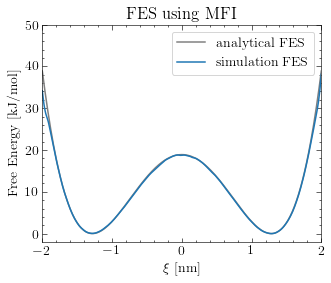

In [32]:
#plot analytical fes
plt.plot(x, y, color="grey", label="analytical FES")

#plot fes
plt.plot(x, FES, label="simulation FES")
plt.xlabel("$\\xi$ [nm]")
plt.ylabel("Free Energy [kJ/mol]")
plt.title("FES using MFI")
plt.xlim(-2,2)
plt.ylim(-2,50)
plt.legend()
plt.show()

72


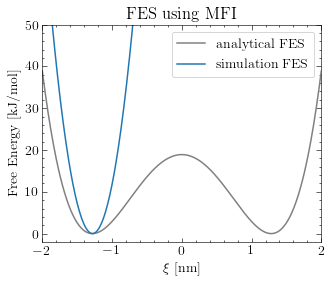

In [11]:
#plot analytical fes
plt.plot(x, y, color="grey", label="analytical FES")

#plot fes
print(index(-1.28))

plt.plot(x, 150*(x+1.28)**2, label="simulation FES")


plt.xlabel("$\\xi$ [nm]")
plt.ylabel("Free Energy [kJ/mol]")
plt.title("FES using MFI")
plt.xlim(-2,2)
plt.ylim(-2,50)
plt.legend()
plt.show()

# Mean Force Integration in 2 Dimensions

The Mean Force Integration in 2 dimensions works in the same way as in one dimension. The reason for using two dimensional MFI, is that it allows to use 2 collective variables instead of one, which might be necessary for some systems.

First, the theoretical function is defined, which is analogous to the 1 dimensional used above.

Next, the input files need to be written, which require small changes, and the simulation can be started. 

As the position and HILLS file are available, the MFI algoritm is used to find the mean force. Instead of using a 1 dimensional gausian distributions for the probability density and the metadynamics bias (or other biases), a 2 dimensional gausian distribution is used.

The derivative of a 2 dimensional free energy is expressed as 2 independent gradients, where each gradients corresponds to the derivative w.r.t. one dimension. The integration of the gradient isn't very straight forward and more complicated when the gradients are noisy. 


In [40]:
os.chdir(path)
try: os.mkdir("MFI_2D")
except: print("folder \"MFI_2D\" already exists")
os.chdir("MFI_2D")

folder "MFI_2D" already exists


<ipython-input-39-d64bce7177b8>:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fes3d.gca(projection='3d')


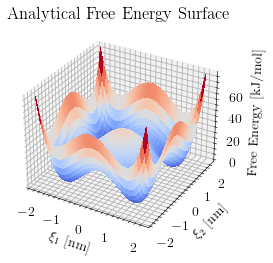

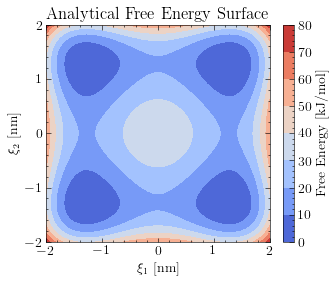

In [39]:
#Define Grid and theoretical function
nbins = 201
min_grid = -2
max_grid = 2
grid = np.linspace(min_grid, max_grid, nbins)
grid_space = (max_grid - min_grid) / (nbins - 1)
X, Y = np.meshgrid(grid, grid)
Z = 7*X**4 - 23*X**2 + 7*Y**4 - 23*Y**2
Z = Z - np.min(Z)

#Plot theoretical Function
fes3d = plt.figure(81)
ax = fes3d.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap="coolwarm", linewidth=0, antialiased=False)
# fes3d_woco.colorbar(surf, shrink=0.5, aspect=5)
plt.title("Analytical Free Energy Surface")
ax.set_xlabel(r"$\xi_1$ [nm]")
ax.set_ylabel(r"$\xi_2$ [nm]")
ax.set_zlabel('Free Energy [kJ/mol]');plt.savefig('/home/antoniu/Desktop/Windows/Graphs_Report/Analtical3D_7x^4-23x^2.png', dpi=600, bbox_inches='tight')
plt.show()

#Plot theoretical Function
plt.figure(82)
plt.contourf(X, Y, Z, cmap='coolwarm')
plt.colorbar(label="Free Energy [kJ/mol]")
plt.xlabel(r"$\xi_1$ [nm]")
plt.ylabel(r"$\xi_2$ [nm]")
plt.title("Analytical Free Energy Surface")
plt.show()

In [35]:
os.chdir(path + "/MFI_2D")

def run_langevin2D(length, sigma=0.1, height=0.1, biasfactor=10):
    with open("plumed.dat","w") as f:
        print("""p: DISTANCE ATOMS=1,2 COMPONENTS
ff: MATHEVAL ARG=p.x,p.y PERIODIC=NO FUNC=(7*x^4-23*x^2+7*y^4-23*y^2)
bb: BIASVALUE ARG=ff
METAD ARG=p.x,p.y PACE=100 SIGMA={},{} HEIGHT={} GRID_MIN=-3,-3 GRID_MAX=3,3 GRID_BIN=300,300 BIASFACTOR={} TEMP=120 CALC_RCT
#Uncomment following lines to obtain the FES using plumed functions:
#bias: REWEIGHT_METAD TEMP=120
#hh: HISTOGRAM ARG=p.x,p.y GRID_MIN=-3,-3 GRID_MAX=3,3 GRID_BIN=300,300 BANDWIDTH=0.01,0.01 LOGWEIGHTS=bias
#fes: CONVERT_TO_FES GRID=hh TEMP=120
#DUMPGRID GRID=fes FILE=fes.dat STRIDE={}
PRINT FILE=position ARG=p.x,p.y STRIDE=10""".format(sigma, sigma, height, biasfactor, length),file=f)

    with open("input","w") as f:
        print("""temperature 1
tstep 0.005
friction 1
dimension 2
nstep {}
ipos -1.0,-1.0
periodic false""".format(length),file=f)

    !plumed pesmd < input  
    
run_langevin2D(1000000)

PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Mar  8 2021 at 17:46:23
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/antoniu/.local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /home/antoniu/.local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: pesmd
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 2
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action DISTANCE
PLUMED:   with label p
PLUMED:   between atoms 1 2
PLUMED:   using periodic boundary conditions
PLUMED:   added component to this action:  p.x 
PLUMED:   added component to this action:  p.y 
PLUMED:   added component to this action:  p.z 
PLUMED:   WARNING: components will not have the proper periodi

Doing step 7200
Doing step 7220
Doing step 7240
Doing step 7260
Doing step 7280
Doing step 7300
Doing step 7320
Doing step 7340
Doing step 7360
Doing step 7380
Doing step 7400
Doing step 7420
Doing step 7440
Doing step 7460
Doing step 7480
Doing step 7500
Doing step 7520
Doing step 7540
Doing step 7560
Doing step 7580
Doing step 7600
Doing step 7620
Doing step 7640
Doing step 7660
Doing step 7680
Doing step 7700
Doing step 7720
Doing step 7740
Doing step 7760
Doing step 7780
Doing step 7800
Doing step 7820
Doing step 7840
Doing step 7860
Doing step 7880
Doing step 7900
Doing step 7920
Doing step 7940
Doing step 7960
Doing step 7980
Doing step 8000
Doing step 8020
Doing step 8040
Doing step 8060
Doing step 8080
Doing step 8100
Doing step 8120
Doing step 8140
Doing step 8160
Doing step 8180
Doing step 8200
Doing step 8220
Doing step 8240
Doing step 8260
Doing step 8280
Doing step 8300
Doing step 8320
Doing step 8340
Doing step 8360
Doing step 8380
Doing step 8400
Doing step 8420
Doing st

Doing step 17680
Doing step 17700
Doing step 17720
Doing step 17740
Doing step 17760
Doing step 17780
Doing step 17800
Doing step 17820
Doing step 17840
Doing step 17860
Doing step 17880
Doing step 17900
Doing step 17920
Doing step 17940
Doing step 17960
Doing step 17980
Doing step 18000
Doing step 18020
Doing step 18040
Doing step 18060
Doing step 18080
Doing step 18100
Doing step 18120
Doing step 18140
Doing step 18160
Doing step 18180
Doing step 18200
Doing step 18220
Doing step 18240
Doing step 18260
Doing step 18280
Doing step 18300
Doing step 18320
Doing step 18340
Doing step 18360
Doing step 18380
Doing step 18400
Doing step 18420
Doing step 18440
Doing step 18460
Doing step 18480
Doing step 18500
Doing step 18520
Doing step 18540
Doing step 18560
Doing step 18580
Doing step 18600
Doing step 18620
Doing step 18640
Doing step 18660
Doing step 18680
Doing step 18700
Doing step 18720
Doing step 18740
Doing step 18760
Doing step 18780
Doing step 18800
Doing step 18820
Doing step 188

Doing step 28100
Doing step 28120
Doing step 28140
Doing step 28160
Doing step 28180
Doing step 28200
Doing step 28220
Doing step 28240
Doing step 28260
Doing step 28280
Doing step 28300
Doing step 28320
Doing step 28340
Doing step 28360
Doing step 28380
Doing step 28400
Doing step 28420
Doing step 28440
Doing step 28460
Doing step 28480
Doing step 28500
Doing step 28520
Doing step 28540
Doing step 28560
Doing step 28580
Doing step 28600
Doing step 28620
Doing step 28640
Doing step 28660
Doing step 28680
Doing step 28700
Doing step 28720
Doing step 28740
Doing step 28760
Doing step 28780
Doing step 28800
Doing step 28820
Doing step 28840
Doing step 28860
Doing step 28880
Doing step 28900
Doing step 28920
Doing step 28940
Doing step 28960
Doing step 28980
Doing step 29000
Doing step 29020
Doing step 29040
Doing step 29060
Doing step 29080
Doing step 29100
Doing step 29120
Doing step 29140
Doing step 29160
Doing step 29180
Doing step 29200
Doing step 29220
Doing step 29240
Doing step 292

Doing step 38400
Doing step 38420
Doing step 38440
Doing step 38460
Doing step 38480
Doing step 38500
Doing step 38520
Doing step 38540
Doing step 38560
Doing step 38580
Doing step 38600
Doing step 38620
Doing step 38640
Doing step 38660
Doing step 38680
Doing step 38700
Doing step 38720
Doing step 38740
Doing step 38760
Doing step 38780
Doing step 38800
Doing step 38820
Doing step 38840
Doing step 38860
Doing step 38880
Doing step 38900
Doing step 38920
Doing step 38940
Doing step 38960
Doing step 38980
Doing step 39000
Doing step 39020
Doing step 39040
Doing step 39060
Doing step 39080
Doing step 39100
Doing step 39120
Doing step 39140
Doing step 39160
Doing step 39180
Doing step 39200
Doing step 39220
Doing step 39240
Doing step 39260
Doing step 39280
Doing step 39300
Doing step 39320
Doing step 39340
Doing step 39360
Doing step 39380
Doing step 39400
Doing step 39420
Doing step 39440
Doing step 39460
Doing step 39480
Doing step 39500
Doing step 39520
Doing step 39540
Doing step 395

Doing step 48700
Doing step 48720
Doing step 48740
Doing step 48760
Doing step 48780
Doing step 48800
Doing step 48820
Doing step 48840
Doing step 48860
Doing step 48880
Doing step 48900
Doing step 48920
Doing step 48940
Doing step 48960
Doing step 48980
Doing step 49000
Doing step 49020
Doing step 49040
Doing step 49060
Doing step 49080
Doing step 49100
Doing step 49120
Doing step 49140
Doing step 49160
Doing step 49180
Doing step 49200
Doing step 49220
Doing step 49240
Doing step 49260
Doing step 49280
Doing step 49300
Doing step 49320
Doing step 49340
Doing step 49360
Doing step 49380
Doing step 49400
Doing step 49420
Doing step 49440
Doing step 49460
Doing step 49480
Doing step 49500
Doing step 49520
Doing step 49540
Doing step 49560
Doing step 49580
Doing step 49600
Doing step 49620
Doing step 49640
Doing step 49660
Doing step 49680
Doing step 49700
Doing step 49720
Doing step 49740
Doing step 49760
Doing step 49780
Doing step 49800
Doing step 49820
Doing step 49840
Doing step 498

Doing step 58600
Doing step 58620
Doing step 58640
Doing step 58660
Doing step 58680
Doing step 58700
Doing step 58720
Doing step 58740
Doing step 58760
Doing step 58780
Doing step 58800
Doing step 58820
Doing step 58840
Doing step 58860
Doing step 58880
Doing step 58900
Doing step 58920
Doing step 58940
Doing step 58960
Doing step 58980
Doing step 59000
Doing step 59020
Doing step 59040
Doing step 59060
Doing step 59080
Doing step 59100
Doing step 59120
Doing step 59140
Doing step 59160
Doing step 59180
Doing step 59200
Doing step 59220
Doing step 59240
Doing step 59260
Doing step 59280
Doing step 59300
Doing step 59320
Doing step 59340
Doing step 59360
Doing step 59380
Doing step 59400
Doing step 59420
Doing step 59440
Doing step 59460
Doing step 59480
Doing step 59500
Doing step 59520
Doing step 59540
Doing step 59560
Doing step 59580
Doing step 59600
Doing step 59620
Doing step 59640
Doing step 59660
Doing step 59680
Doing step 59700
Doing step 59720
Doing step 59740
Doing step 597

Doing step 68440
Doing step 68460
Doing step 68480
Doing step 68500
Doing step 68520
Doing step 68540
Doing step 68560
Doing step 68580
Doing step 68600
Doing step 68620
Doing step 68640
Doing step 68660
Doing step 68680
Doing step 68700
Doing step 68720
Doing step 68740
Doing step 68760
Doing step 68780
Doing step 68800
Doing step 68820
Doing step 68840
Doing step 68860
Doing step 68880
Doing step 68900
Doing step 68920
Doing step 68940
Doing step 68960
Doing step 68980
Doing step 69000
Doing step 69020
Doing step 69040
Doing step 69060
Doing step 69080
Doing step 69100
Doing step 69120
Doing step 69140
Doing step 69160
Doing step 69180
Doing step 69200
Doing step 69220
Doing step 69240
Doing step 69260
Doing step 69280
Doing step 69300
Doing step 69320
Doing step 69340
Doing step 69360
Doing step 69380
Doing step 69400
Doing step 69420
Doing step 69440
Doing step 69460
Doing step 69480
Doing step 69500
Doing step 69520
Doing step 69540
Doing step 69560
Doing step 69580
Doing step 696

Doing step 78920
Doing step 78940
Doing step 78960
Doing step 78980
Doing step 79000
Doing step 79020
Doing step 79040
Doing step 79060
Doing step 79080
Doing step 79100
Doing step 79120
Doing step 79140
Doing step 79160
Doing step 79180
Doing step 79200
Doing step 79220
Doing step 79240
Doing step 79260
Doing step 79280
Doing step 79300
Doing step 79320
Doing step 79340
Doing step 79360
Doing step 79380
Doing step 79400
Doing step 79420
Doing step 79440
Doing step 79460
Doing step 79480
Doing step 79500
Doing step 79520
Doing step 79540
Doing step 79560
Doing step 79580
Doing step 79600
Doing step 79620
Doing step 79640
Doing step 79660
Doing step 79680
Doing step 79700
Doing step 79720
Doing step 79740
Doing step 79760
Doing step 79780
Doing step 79800
Doing step 79820
Doing step 79840
Doing step 79860
Doing step 79880
Doing step 79900
Doing step 79920
Doing step 79940
Doing step 79960
Doing step 79980
Doing step 80000
Doing step 80020
Doing step 80040
Doing step 80060
Doing step 800

Doing step 89100
Doing step 89120
Doing step 89140
Doing step 89160
Doing step 89180
Doing step 89200
Doing step 89220
Doing step 89240
Doing step 89260
Doing step 89280
Doing step 89300
Doing step 89320
Doing step 89340
Doing step 89360
Doing step 89380
Doing step 89400
Doing step 89420
Doing step 89440
Doing step 89460
Doing step 89480
Doing step 89500
Doing step 89520
Doing step 89540
Doing step 89560
Doing step 89580
Doing step 89600
Doing step 89620
Doing step 89640
Doing step 89660
Doing step 89680
Doing step 89700
Doing step 89720
Doing step 89740
Doing step 89760
Doing step 89780
Doing step 89800
Doing step 89820
Doing step 89840
Doing step 89860
Doing step 89880
Doing step 89900
Doing step 89920
Doing step 89940
Doing step 89960
Doing step 89980
Doing step 90000
Doing step 90020
Doing step 90040
Doing step 90060
Doing step 90080
Doing step 90100
Doing step 90120
Doing step 90140
Doing step 90160
Doing step 90180
Doing step 90200
Doing step 90220
Doing step 90240
Doing step 902

Doing step 99600
Doing step 99620
Doing step 99640
Doing step 99660
Doing step 99680
Doing step 99700
Doing step 99720
Doing step 99740
Doing step 99760
Doing step 99780
Doing step 99800
Doing step 99820
Doing step 99840
Doing step 99860
Doing step 99880
Doing step 99900
Doing step 99920
Doing step 99940
Doing step 99960
Doing step 99980
Doing step 100000
Doing step 100020
Doing step 100040
Doing step 100060
Doing step 100080
Doing step 100100
Doing step 100120
Doing step 100140
Doing step 100160
Doing step 100180
Doing step 100200
Doing step 100220
Doing step 100240
Doing step 100260
Doing step 100280
Doing step 100300
Doing step 100320
Doing step 100340
Doing step 100360
Doing step 100380
Doing step 100400
Doing step 100420
Doing step 100440
Doing step 100460
Doing step 100480
Doing step 100500
Doing step 100520
Doing step 100540
Doing step 100560
Doing step 100580
Doing step 100600
Doing step 100620
Doing step 100640
Doing step 100660
Doing step 100680
Doing step 100700
Doing step 1

Doing step 108800
Doing step 108820
Doing step 108840
Doing step 108860
Doing step 108880
Doing step 108900
Doing step 108920
Doing step 108940
Doing step 108960
Doing step 108980
Doing step 109000
Doing step 109020
Doing step 109040
Doing step 109060
Doing step 109080
Doing step 109100
Doing step 109120
Doing step 109140
Doing step 109160
Doing step 109180
Doing step 109200
Doing step 109220
Doing step 109240
Doing step 109260
Doing step 109280
Doing step 109300
Doing step 109320
Doing step 109340
Doing step 109360
Doing step 109380
Doing step 109400
Doing step 109420
Doing step 109440
Doing step 109460
Doing step 109480
Doing step 109500
Doing step 109520
Doing step 109540
Doing step 109560
Doing step 109580
Doing step 109600
Doing step 109620
Doing step 109640
Doing step 109660
Doing step 109680
Doing step 109700
Doing step 109720
Doing step 109740
Doing step 109760
Doing step 109780
Doing step 109800
Doing step 109820
Doing step 109840
Doing step 109860
Doing step 109880
Doing step

Doing step 118500
Doing step 118520
Doing step 118540
Doing step 118560
Doing step 118580
Doing step 118600
Doing step 118620
Doing step 118640
Doing step 118660
Doing step 118680
Doing step 118700
Doing step 118720
Doing step 118740
Doing step 118760
Doing step 118780
Doing step 118800
Doing step 118820
Doing step 118840
Doing step 118860
Doing step 118880
Doing step 118900
Doing step 118920
Doing step 118940
Doing step 118960
Doing step 118980
Doing step 119000
Doing step 119020
Doing step 119040
Doing step 119060
Doing step 119080
Doing step 119100
Doing step 119120
Doing step 119140
Doing step 119160
Doing step 119180
Doing step 119200
Doing step 119220
Doing step 119240
Doing step 119260
Doing step 119280
Doing step 119300
Doing step 119320
Doing step 119340
Doing step 119360
Doing step 119380
Doing step 119400
Doing step 119420
Doing step 119440
Doing step 119460
Doing step 119480
Doing step 119500
Doing step 119520
Doing step 119540
Doing step 119560
Doing step 119580
Doing step

Doing step 128660
Doing step 128680
Doing step 128700
Doing step 128720
Doing step 128740
Doing step 128760
Doing step 128780
Doing step 128800
Doing step 128820
Doing step 128840
Doing step 128860
Doing step 128880
Doing step 128900
Doing step 128920
Doing step 128940
Doing step 128960
Doing step 128980
Doing step 129000
Doing step 129020
Doing step 129040
Doing step 129060
Doing step 129080
Doing step 129100
Doing step 129120
Doing step 129140
Doing step 129160
Doing step 129180
Doing step 129200
Doing step 129220
Doing step 129240
Doing step 129260
Doing step 129280
Doing step 129300
Doing step 129320
Doing step 129340
Doing step 129360
Doing step 129380
Doing step 129400
Doing step 129420
Doing step 129440
Doing step 129460
Doing step 129480
Doing step 129500
Doing step 129520
Doing step 129540
Doing step 129560
Doing step 129580
Doing step 129600
Doing step 129620
Doing step 129640
Doing step 129660
Doing step 129680
Doing step 129700
Doing step 129720
Doing step 129740
Doing step

Doing step 138200
Doing step 138220
Doing step 138240
Doing step 138260
Doing step 138280
Doing step 138300
Doing step 138320
Doing step 138340
Doing step 138360
Doing step 138380
Doing step 138400
Doing step 138420
Doing step 138440
Doing step 138460
Doing step 138480
Doing step 138500
Doing step 138520
Doing step 138540
Doing step 138560
Doing step 138580
Doing step 138600
Doing step 138620
Doing step 138640
Doing step 138660
Doing step 138680
Doing step 138700
Doing step 138720
Doing step 138740
Doing step 138760
Doing step 138780
Doing step 138800
Doing step 138820
Doing step 138840
Doing step 138860
Doing step 138880
Doing step 138900
Doing step 138920
Doing step 138940
Doing step 138960
Doing step 138980
Doing step 139000
Doing step 139020
Doing step 139040
Doing step 139060
Doing step 139080
Doing step 139100
Doing step 139120
Doing step 139140
Doing step 139160
Doing step 139180
Doing step 139200
Doing step 139220
Doing step 139240
Doing step 139260
Doing step 139280
Doing step

Doing step 148300
Doing step 148320
Doing step 148340
Doing step 148360
Doing step 148380
Doing step 148400
Doing step 148420
Doing step 148440
Doing step 148460
Doing step 148480
Doing step 148500
Doing step 148520
Doing step 148540
Doing step 148560
Doing step 148580
Doing step 148600
Doing step 148620
Doing step 148640
Doing step 148660
Doing step 148680
Doing step 148700
Doing step 148720
Doing step 148740
Doing step 148760
Doing step 148780
Doing step 148800
Doing step 148820
Doing step 148840
Doing step 148860
Doing step 148880
Doing step 148900
Doing step 148920
Doing step 148940
Doing step 148960
Doing step 148980
Doing step 149000
Doing step 149020
Doing step 149040
Doing step 149060
Doing step 149080
Doing step 149100
Doing step 149120
Doing step 149140
Doing step 149160
Doing step 149180
Doing step 149200
Doing step 149220
Doing step 149240
Doing step 149260
Doing step 149280
Doing step 149300
Doing step 149320
Doing step 149340
Doing step 149360
Doing step 149380
Doing step

Doing step 158240
Doing step 158260
Doing step 158280
Doing step 158300
Doing step 158320
Doing step 158340
Doing step 158360
Doing step 158380
Doing step 158400
Doing step 158420
Doing step 158440
Doing step 158460
Doing step 158480
Doing step 158500
Doing step 158520
Doing step 158540
Doing step 158560
Doing step 158580
Doing step 158600
Doing step 158620
Doing step 158640
Doing step 158660
Doing step 158680
Doing step 158700
Doing step 158720
Doing step 158740
Doing step 158760
Doing step 158780
Doing step 158800
Doing step 158820
Doing step 158840
Doing step 158860
Doing step 158880
Doing step 158900
Doing step 158920
Doing step 158940
Doing step 158960
Doing step 158980
Doing step 159000
Doing step 159020
Doing step 159040
Doing step 159060
Doing step 159080
Doing step 159100
Doing step 159120
Doing step 159140
Doing step 159160
Doing step 159180
Doing step 159200
Doing step 159220
Doing step 159240
Doing step 159260
Doing step 159280
Doing step 159300
Doing step 159320
Doing step

Doing step 167700
Doing step 167720
Doing step 167740
Doing step 167760
Doing step 167780
Doing step 167800
Doing step 167820
Doing step 167840
Doing step 167860
Doing step 167880
Doing step 167900
Doing step 167920
Doing step 167940
Doing step 167960
Doing step 167980
Doing step 168000
Doing step 168020
Doing step 168040
Doing step 168060
Doing step 168080
Doing step 168100
Doing step 168120
Doing step 168140
Doing step 168160
Doing step 168180
Doing step 168200
Doing step 168220
Doing step 168240
Doing step 168260
Doing step 168280
Doing step 168300
Doing step 168320
Doing step 168340
Doing step 168360
Doing step 168380
Doing step 168400
Doing step 168420
Doing step 168440
Doing step 168460
Doing step 168480
Doing step 168500
Doing step 168520
Doing step 168540
Doing step 168560
Doing step 168580
Doing step 168600
Doing step 168620
Doing step 168640
Doing step 168660
Doing step 168680
Doing step 168700
Doing step 168720
Doing step 168740
Doing step 168760
Doing step 168780
Doing step

Doing step 177480
Doing step 177500
Doing step 177520
Doing step 177540
Doing step 177560
Doing step 177580
Doing step 177600
Doing step 177620
Doing step 177640
Doing step 177660
Doing step 177680
Doing step 177700
Doing step 177720
Doing step 177740
Doing step 177760
Doing step 177780
Doing step 177800
Doing step 177820
Doing step 177840
Doing step 177860
Doing step 177880
Doing step 177900
Doing step 177920
Doing step 177940
Doing step 177960
Doing step 177980
Doing step 178000
Doing step 178020
Doing step 178040
Doing step 178060
Doing step 178080
Doing step 178100
Doing step 178120
Doing step 178140
Doing step 178160
Doing step 178180
Doing step 178200
Doing step 178220
Doing step 178240
Doing step 178260
Doing step 178280
Doing step 178300
Doing step 178320
Doing step 178340
Doing step 178360
Doing step 178380
Doing step 178400
Doing step 178420
Doing step 178440
Doing step 178460
Doing step 178480
Doing step 178500
Doing step 178520
Doing step 178540
Doing step 178560
Doing step

Doing step 187160
Doing step 187180
Doing step 187200
Doing step 187220
Doing step 187240
Doing step 187260
Doing step 187280
Doing step 187300
Doing step 187320
Doing step 187340
Doing step 187360
Doing step 187380
Doing step 187400
Doing step 187420
Doing step 187440
Doing step 187460
Doing step 187480
Doing step 187500
Doing step 187520
Doing step 187540
Doing step 187560
Doing step 187580
Doing step 187600
Doing step 187620
Doing step 187640
Doing step 187660
Doing step 187680
Doing step 187700
Doing step 187720
Doing step 187740
Doing step 187760
Doing step 187780
Doing step 187800
Doing step 187820
Doing step 187840
Doing step 187860
Doing step 187880
Doing step 187900
Doing step 187920
Doing step 187940
Doing step 187960
Doing step 187980
Doing step 188000
Doing step 188020
Doing step 188040
Doing step 188060
Doing step 188080
Doing step 188100
Doing step 188120
Doing step 188140
Doing step 188160
Doing step 188180
Doing step 188200
Doing step 188220
Doing step 188240
Doing step

Doing step 196660
Doing step 196680
Doing step 196700
Doing step 196720
Doing step 196740
Doing step 196760
Doing step 196780
Doing step 196800
Doing step 196820
Doing step 196840
Doing step 196860
Doing step 196880
Doing step 196900
Doing step 196920
Doing step 196940
Doing step 196960
Doing step 196980
Doing step 197000
Doing step 197020
Doing step 197040
Doing step 197060
Doing step 197080
Doing step 197100
Doing step 197120
Doing step 197140
Doing step 197160
Doing step 197180
Doing step 197200
Doing step 197220
Doing step 197240
Doing step 197260
Doing step 197280
Doing step 197300
Doing step 197320
Doing step 197340
Doing step 197360
Doing step 197380
Doing step 197400
Doing step 197420
Doing step 197440
Doing step 197460
Doing step 197480
Doing step 197500
Doing step 197520
Doing step 197540
Doing step 197560
Doing step 197580
Doing step 197600
Doing step 197620
Doing step 197640
Doing step 197660
Doing step 197680
Doing step 197700
Doing step 197720
Doing step 197740
Doing step

Doing step 206780
Doing step 206800
Doing step 206820
Doing step 206840
Doing step 206860
Doing step 206880
Doing step 206900
Doing step 206920
Doing step 206940
Doing step 206960
Doing step 206980
Doing step 207000
Doing step 207020
Doing step 207040
Doing step 207060
Doing step 207080
Doing step 207100
Doing step 207120
Doing step 207140
Doing step 207160
Doing step 207180
Doing step 207200
Doing step 207220
Doing step 207240
Doing step 207260
Doing step 207280
Doing step 207300
Doing step 207320
Doing step 207340
Doing step 207360
Doing step 207380
Doing step 207400
Doing step 207420
Doing step 207440
Doing step 207460
Doing step 207480
Doing step 207500
Doing step 207520
Doing step 207540
Doing step 207560
Doing step 207580
Doing step 207600
Doing step 207620
Doing step 207640
Doing step 207660
Doing step 207680
Doing step 207700
Doing step 207720
Doing step 207740
Doing step 207760
Doing step 207780
Doing step 207800
Doing step 207820
Doing step 207840
Doing step 207860
Doing step

Doing step 216300
Doing step 216320
Doing step 216340
Doing step 216360
Doing step 216380
Doing step 216400
Doing step 216420
Doing step 216440
Doing step 216460
Doing step 216480
Doing step 216500
Doing step 216520
Doing step 216540
Doing step 216560
Doing step 216580
Doing step 216600
Doing step 216620
Doing step 216640
Doing step 216660
Doing step 216680
Doing step 216700
Doing step 216720
Doing step 216740
Doing step 216760
Doing step 216780
Doing step 216800
Doing step 216820
Doing step 216840
Doing step 216860
Doing step 216880
Doing step 216900
Doing step 216920
Doing step 216940
Doing step 216960
Doing step 216980
Doing step 217000
Doing step 217020
Doing step 217040
Doing step 217060
Doing step 217080
Doing step 217100
Doing step 217120
Doing step 217140
Doing step 217160
Doing step 217180
Doing step 217200
Doing step 217220
Doing step 217240
Doing step 217260
Doing step 217280
Doing step 217300
Doing step 217320
Doing step 217340
Doing step 217360
Doing step 217380
Doing step

Doing step 225800
Doing step 225820
Doing step 225840
Doing step 225860
Doing step 225880
Doing step 225900
Doing step 225920
Doing step 225940
Doing step 225960
Doing step 225980
Doing step 226000
Doing step 226020
Doing step 226040
Doing step 226060
Doing step 226080
Doing step 226100
Doing step 226120
Doing step 226140
Doing step 226160
Doing step 226180
Doing step 226200
Doing step 226220
Doing step 226240
Doing step 226260
Doing step 226280
Doing step 226300
Doing step 226320
Doing step 226340
Doing step 226360
Doing step 226380
Doing step 226400
Doing step 226420
Doing step 226440
Doing step 226460
Doing step 226480
Doing step 226500
Doing step 226520
Doing step 226540
Doing step 226560
Doing step 226580
Doing step 226600
Doing step 226620
Doing step 226640
Doing step 226660
Doing step 226680
Doing step 226700
Doing step 226720
Doing step 226740
Doing step 226760
Doing step 226780
Doing step 226800
Doing step 226820
Doing step 226840
Doing step 226860
Doing step 226880
Doing step

Doing step 235180
Doing step 235200
Doing step 235220
Doing step 235240
Doing step 235260
Doing step 235280
Doing step 235300
Doing step 235320
Doing step 235340
Doing step 235360
Doing step 235380
Doing step 235400
Doing step 235420
Doing step 235440
Doing step 235460
Doing step 235480
Doing step 235500
Doing step 235520
Doing step 235540
Doing step 235560
Doing step 235580
Doing step 235600
Doing step 235620
Doing step 235640
Doing step 235660
Doing step 235680
Doing step 235700
Doing step 235720
Doing step 235740
Doing step 235760
Doing step 235780
Doing step 235800
Doing step 235820
Doing step 235840
Doing step 235860
Doing step 235880
Doing step 235900
Doing step 235920
Doing step 235940
Doing step 235960
Doing step 235980
Doing step 236000
Doing step 236020
Doing step 236040
Doing step 236060
Doing step 236080
Doing step 236100
Doing step 236120
Doing step 236140
Doing step 236160
Doing step 236180
Doing step 236200
Doing step 236220
Doing step 236240
Doing step 236260
Doing step

Doing step 245140
Doing step 245160
Doing step 245180
Doing step 245200
Doing step 245220
Doing step 245240
Doing step 245260
Doing step 245280
Doing step 245300
Doing step 245320
Doing step 245340
Doing step 245360
Doing step 245380
Doing step 245400
Doing step 245420
Doing step 245440
Doing step 245460
Doing step 245480
Doing step 245500
Doing step 245520
Doing step 245540
Doing step 245560
Doing step 245580
Doing step 245600
Doing step 245620
Doing step 245640
Doing step 245660
Doing step 245680
Doing step 245700
Doing step 245720
Doing step 245740
Doing step 245760
Doing step 245780
Doing step 245800
Doing step 245820
Doing step 245840
Doing step 245860
Doing step 245880
Doing step 245900
Doing step 245920
Doing step 245940
Doing step 245960
Doing step 245980
Doing step 246000
Doing step 246020
Doing step 246040
Doing step 246060
Doing step 246080
Doing step 246100
Doing step 246120
Doing step 246140
Doing step 246160
Doing step 246180
Doing step 246200
Doing step 246220
Doing step

Doing step 254660
Doing step 254680
Doing step 254700
Doing step 254720
Doing step 254740
Doing step 254760
Doing step 254780
Doing step 254800
Doing step 254820
Doing step 254840
Doing step 254860
Doing step 254880
Doing step 254900
Doing step 254920
Doing step 254940
Doing step 254960
Doing step 254980
Doing step 255000
Doing step 255020
Doing step 255040
Doing step 255060
Doing step 255080
Doing step 255100
Doing step 255120
Doing step 255140
Doing step 255160
Doing step 255180
Doing step 255200
Doing step 255220
Doing step 255240
Doing step 255260
Doing step 255280
Doing step 255300
Doing step 255320
Doing step 255340
Doing step 255360
Doing step 255380
Doing step 255400
Doing step 255420
Doing step 255440
Doing step 255460
Doing step 255480
Doing step 255500
Doing step 255520
Doing step 255540
Doing step 255560
Doing step 255580
Doing step 255600
Doing step 255620
Doing step 255640
Doing step 255660
Doing step 255680
Doing step 255700
Doing step 255720
Doing step 255740
Doing step

Doing step 264000
Doing step 264020
Doing step 264040
Doing step 264060
Doing step 264080
Doing step 264100
Doing step 264120
Doing step 264140
Doing step 264160
Doing step 264180
Doing step 264200
Doing step 264220
Doing step 264240
Doing step 264260
Doing step 264280
Doing step 264300
Doing step 264320
Doing step 264340
Doing step 264360
Doing step 264380
Doing step 264400
Doing step 264420
Doing step 264440
Doing step 264460
Doing step 264480
Doing step 264500
Doing step 264520
Doing step 264540
Doing step 264560
Doing step 264580
Doing step 264600
Doing step 264620
Doing step 264640
Doing step 264660
Doing step 264680
Doing step 264700
Doing step 264720
Doing step 264740
Doing step 264760
Doing step 264780
Doing step 264800
Doing step 264820
Doing step 264840
Doing step 264860
Doing step 264880
Doing step 264900
Doing step 264920
Doing step 264940
Doing step 264960
Doing step 264980
Doing step 265000
Doing step 265020
Doing step 265040
Doing step 265060
Doing step 265080
Doing step

Doing step 273700
Doing step 273720
Doing step 273740
Doing step 273760
Doing step 273780
Doing step 273800
Doing step 273820
Doing step 273840
Doing step 273860
Doing step 273880
Doing step 273900
Doing step 273920
Doing step 273940
Doing step 273960
Doing step 273980
Doing step 274000
Doing step 274020
Doing step 274040
Doing step 274060
Doing step 274080
Doing step 274100
Doing step 274120
Doing step 274140
Doing step 274160
Doing step 274180
Doing step 274200
Doing step 274220
Doing step 274240
Doing step 274260
Doing step 274280
Doing step 274300
Doing step 274320
Doing step 274340
Doing step 274360
Doing step 274380
Doing step 274400
Doing step 274420
Doing step 274440
Doing step 274460
Doing step 274480
Doing step 274500
Doing step 274520
Doing step 274540
Doing step 274560
Doing step 274580
Doing step 274600
Doing step 274620
Doing step 274640
Doing step 274660
Doing step 274680
Doing step 274700
Doing step 274720
Doing step 274740
Doing step 274760
Doing step 274780
Doing step

Doing step 283900
Doing step 283920
Doing step 283940
Doing step 283960
Doing step 283980
Doing step 284000
Doing step 284020
Doing step 284040
Doing step 284060
Doing step 284080
Doing step 284100
Doing step 284120
Doing step 284140
Doing step 284160
Doing step 284180
Doing step 284200
Doing step 284220
Doing step 284240
Doing step 284260
Doing step 284280
Doing step 284300
Doing step 284320
Doing step 284340
Doing step 284360
Doing step 284380
Doing step 284400
Doing step 284420
Doing step 284440
Doing step 284460
Doing step 284480
Doing step 284500
Doing step 284520
Doing step 284540
Doing step 284560
Doing step 284580
Doing step 284600
Doing step 284620
Doing step 284640
Doing step 284660
Doing step 284680
Doing step 284700
Doing step 284720
Doing step 284740
Doing step 284760
Doing step 284780
Doing step 284800
Doing step 284820
Doing step 284840
Doing step 284860
Doing step 284880
Doing step 284900
Doing step 284920
Doing step 284940
Doing step 284960
Doing step 284980
Doing step

Doing step 293200
Doing step 293220
Doing step 293240
Doing step 293260
Doing step 293280
Doing step 293300
Doing step 293320
Doing step 293340
Doing step 293360
Doing step 293380
Doing step 293400
Doing step 293420
Doing step 293440
Doing step 293460
Doing step 293480
Doing step 293500
Doing step 293520
Doing step 293540
Doing step 293560
Doing step 293580
Doing step 293600
Doing step 293620
Doing step 293640
Doing step 293660
Doing step 293680
Doing step 293700
Doing step 293720
Doing step 293740
Doing step 293760
Doing step 293780
Doing step 293800
Doing step 293820
Doing step 293840
Doing step 293860
Doing step 293880
Doing step 293900
Doing step 293920
Doing step 293940
Doing step 293960
Doing step 293980
Doing step 294000
Doing step 294020
Doing step 294040
Doing step 294060
Doing step 294080
Doing step 294100
Doing step 294120
Doing step 294140
Doing step 294160
Doing step 294180
Doing step 294200
Doing step 294220
Doing step 294240
Doing step 294260
Doing step 294280
Doing step

Doing step 302800
Doing step 302820
Doing step 302840
Doing step 302860
Doing step 302880
Doing step 302900
Doing step 302920
Doing step 302940
Doing step 302960
Doing step 302980
Doing step 303000
Doing step 303020
Doing step 303040
Doing step 303060
Doing step 303080
Doing step 303100
Doing step 303120
Doing step 303140
Doing step 303160
Doing step 303180
Doing step 303200
Doing step 303220
Doing step 303240
Doing step 303260
Doing step 303280
Doing step 303300
Doing step 303320
Doing step 303340
Doing step 303360
Doing step 303380
Doing step 303400
Doing step 303420
Doing step 303440
Doing step 303460
Doing step 303480
Doing step 303500
Doing step 303520
Doing step 303540
Doing step 303560
Doing step 303580
Doing step 303600
Doing step 303620
Doing step 303640
Doing step 303660
Doing step 303680
Doing step 303700
Doing step 303720
Doing step 303740
Doing step 303760
Doing step 303780
Doing step 303800
Doing step 303820
Doing step 303840
Doing step 303860
Doing step 303880
Doing step

Doing step 312300
Doing step 312320
Doing step 312340
Doing step 312360
Doing step 312380
Doing step 312400
Doing step 312420
Doing step 312440
Doing step 312460
Doing step 312480
Doing step 312500
Doing step 312520
Doing step 312540
Doing step 312560
Doing step 312580
Doing step 312600
Doing step 312620
Doing step 312640
Doing step 312660
Doing step 312680
Doing step 312700
Doing step 312720
Doing step 312740
Doing step 312760
Doing step 312780
Doing step 312800
Doing step 312820
Doing step 312840
Doing step 312860
Doing step 312880
Doing step 312900
Doing step 312920
Doing step 312940
Doing step 312960
Doing step 312980
Doing step 313000
Doing step 313020
Doing step 313040
Doing step 313060
Doing step 313080
Doing step 313100
Doing step 313120
Doing step 313140
Doing step 313160
Doing step 313180
Doing step 313200
Doing step 313220
Doing step 313240
Doing step 313260
Doing step 313280
Doing step 313300
Doing step 313320
Doing step 313340
Doing step 313360
Doing step 313380
Doing step

Doing step 321620
Doing step 321640
Doing step 321660
Doing step 321680
Doing step 321700
Doing step 321720
Doing step 321740
Doing step 321760
Doing step 321780
Doing step 321800
Doing step 321820
Doing step 321840
Doing step 321860
Doing step 321880
Doing step 321900
Doing step 321920
Doing step 321940
Doing step 321960
Doing step 321980
Doing step 322000
Doing step 322020
Doing step 322040
Doing step 322060
Doing step 322080
Doing step 322100
Doing step 322120
Doing step 322140
Doing step 322160
Doing step 322180
Doing step 322200
Doing step 322220
Doing step 322240
Doing step 322260
Doing step 322280
Doing step 322300
Doing step 322320
Doing step 322340
Doing step 322360
Doing step 322380
Doing step 322400
Doing step 322420
Doing step 322440
Doing step 322460
Doing step 322480
Doing step 322500
Doing step 322520
Doing step 322540
Doing step 322560
Doing step 322580
Doing step 322600
Doing step 322620
Doing step 322640
Doing step 322660
Doing step 322680
Doing step 322700
Doing step

Doing step 331300
Doing step 331320
Doing step 331340
Doing step 331360
Doing step 331380
Doing step 331400
Doing step 331420
Doing step 331440
Doing step 331460
Doing step 331480
Doing step 331500
Doing step 331520
Doing step 331540
Doing step 331560
Doing step 331580
Doing step 331600
Doing step 331620
Doing step 331640
Doing step 331660
Doing step 331680
Doing step 331700
Doing step 331720
Doing step 331740
Doing step 331760
Doing step 331780
Doing step 331800
Doing step 331820
Doing step 331840
Doing step 331860
Doing step 331880
Doing step 331900
Doing step 331920
Doing step 331940
Doing step 331960
Doing step 331980
Doing step 332000
Doing step 332020
Doing step 332040
Doing step 332060
Doing step 332080
Doing step 332100
Doing step 332120
Doing step 332140
Doing step 332160
Doing step 332180
Doing step 332200
Doing step 332220
Doing step 332240
Doing step 332260
Doing step 332280
Doing step 332300
Doing step 332320
Doing step 332340
Doing step 332360
Doing step 332380
Doing step

Doing step 340900
Doing step 340920
Doing step 340940
Doing step 340960
Doing step 340980
Doing step 341000
Doing step 341020
Doing step 341040
Doing step 341060
Doing step 341080
Doing step 341100
Doing step 341120
Doing step 341140
Doing step 341160
Doing step 341180
Doing step 341200
Doing step 341220
Doing step 341240
Doing step 341260
Doing step 341280
Doing step 341300
Doing step 341320
Doing step 341340
Doing step 341360
Doing step 341380
Doing step 341400
Doing step 341420
Doing step 341440
Doing step 341460
Doing step 341480
Doing step 341500
Doing step 341520
Doing step 341540
Doing step 341560
Doing step 341580
Doing step 341600
Doing step 341620
Doing step 341640
Doing step 341660
Doing step 341680
Doing step 341700
Doing step 341720
Doing step 341740
Doing step 341760
Doing step 341780
Doing step 341800
Doing step 341820
Doing step 341840
Doing step 341860
Doing step 341880
Doing step 341900
Doing step 341920
Doing step 341940
Doing step 341960
Doing step 341980
Doing step

Doing step 350080
Doing step 350100
Doing step 350120
Doing step 350140
Doing step 350160
Doing step 350180
Doing step 350200
Doing step 350220
Doing step 350240
Doing step 350260
Doing step 350280
Doing step 350300
Doing step 350320
Doing step 350340
Doing step 350360
Doing step 350380
Doing step 350400
Doing step 350420
Doing step 350440
Doing step 350460
Doing step 350480
Doing step 350500
Doing step 350520
Doing step 350540
Doing step 350560
Doing step 350580
Doing step 350600
Doing step 350620
Doing step 350640
Doing step 350660
Doing step 350680
Doing step 350700
Doing step 350720
Doing step 350740
Doing step 350760
Doing step 350780
Doing step 350800
Doing step 350820
Doing step 350840
Doing step 350860
Doing step 350880
Doing step 350900
Doing step 350920
Doing step 350940
Doing step 350960
Doing step 350980
Doing step 351000
Doing step 351020
Doing step 351040
Doing step 351060
Doing step 351080
Doing step 351100
Doing step 351120
Doing step 351140
Doing step 351160
Doing step

Doing step 359400
Doing step 359420
Doing step 359440
Doing step 359460
Doing step 359480
Doing step 359500
Doing step 359520
Doing step 359540
Doing step 359560
Doing step 359580
Doing step 359600
Doing step 359620
Doing step 359640
Doing step 359660
Doing step 359680
Doing step 359700
Doing step 359720
Doing step 359740
Doing step 359760
Doing step 359780
Doing step 359800
Doing step 359820
Doing step 359840
Doing step 359860
Doing step 359880
Doing step 359900
Doing step 359920
Doing step 359940
Doing step 359960
Doing step 359980
Doing step 360000
Doing step 360020
Doing step 360040
Doing step 360060
Doing step 360080
Doing step 360100
Doing step 360120
Doing step 360140
Doing step 360160
Doing step 360180
Doing step 360200
Doing step 360220
Doing step 360240
Doing step 360260
Doing step 360280
Doing step 360300
Doing step 360320
Doing step 360340
Doing step 360360
Doing step 360380
Doing step 360400
Doing step 360420
Doing step 360440
Doing step 360460
Doing step 360480
Doing step

Doing step 368600
Doing step 368620
Doing step 368640
Doing step 368660
Doing step 368680
Doing step 368700
Doing step 368720
Doing step 368740
Doing step 368760
Doing step 368780
Doing step 368800
Doing step 368820
Doing step 368840
Doing step 368860
Doing step 368880
Doing step 368900
Doing step 368920
Doing step 368940
Doing step 368960
Doing step 368980
Doing step 369000
Doing step 369020
Doing step 369040
Doing step 369060
Doing step 369080
Doing step 369100
Doing step 369120
Doing step 369140
Doing step 369160
Doing step 369180
Doing step 369200
Doing step 369220
Doing step 369240
Doing step 369260
Doing step 369280
Doing step 369300
Doing step 369320
Doing step 369340
Doing step 369360
Doing step 369380
Doing step 369400
Doing step 369420
Doing step 369440
Doing step 369460
Doing step 369480
Doing step 369500
Doing step 369520
Doing step 369540
Doing step 369560
Doing step 369580
Doing step 369600
Doing step 369620
Doing step 369640
Doing step 369660
Doing step 369680
Doing step

Doing step 378160
Doing step 378180
Doing step 378200
Doing step 378220
Doing step 378240
Doing step 378260
Doing step 378280
Doing step 378300
Doing step 378320
Doing step 378340
Doing step 378360
Doing step 378380
Doing step 378400
Doing step 378420
Doing step 378440
Doing step 378460
Doing step 378480
Doing step 378500
Doing step 378520
Doing step 378540
Doing step 378560
Doing step 378580
Doing step 378600
Doing step 378620
Doing step 378640
Doing step 378660
Doing step 378680
Doing step 378700
Doing step 378720
Doing step 378740
Doing step 378760
Doing step 378780
Doing step 378800
Doing step 378820
Doing step 378840
Doing step 378860
Doing step 378880
Doing step 378900
Doing step 378920
Doing step 378940
Doing step 378960
Doing step 378980
Doing step 379000
Doing step 379020
Doing step 379040
Doing step 379060
Doing step 379080
Doing step 379100
Doing step 379120
Doing step 379140
Doing step 379160
Doing step 379180
Doing step 379200
Doing step 379220
Doing step 379240
Doing step

Doing step 387500
Doing step 387520
Doing step 387540
Doing step 387560
Doing step 387580
Doing step 387600
Doing step 387620
Doing step 387640
Doing step 387660
Doing step 387680
Doing step 387700
Doing step 387720
Doing step 387740
Doing step 387760
Doing step 387780
Doing step 387800
Doing step 387820
Doing step 387840
Doing step 387860
Doing step 387880
Doing step 387900
Doing step 387920
Doing step 387940
Doing step 387960
Doing step 387980
Doing step 388000
Doing step 388020
Doing step 388040
Doing step 388060
Doing step 388080
Doing step 388100
Doing step 388120
Doing step 388140
Doing step 388160
Doing step 388180
Doing step 388200
Doing step 388220
Doing step 388240
Doing step 388260
Doing step 388280
Doing step 388300
Doing step 388320
Doing step 388340
Doing step 388360
Doing step 388380
Doing step 388400
Doing step 388420
Doing step 388440
Doing step 388460
Doing step 388480
Doing step 388500
Doing step 388520
Doing step 388540
Doing step 388560
Doing step 388580
Doing step

Doing step 397000
Doing step 397020
Doing step 397040
Doing step 397060
Doing step 397080
Doing step 397100
Doing step 397120
Doing step 397140
Doing step 397160
Doing step 397180
Doing step 397200
Doing step 397220
Doing step 397240
Doing step 397260
Doing step 397280
Doing step 397300
Doing step 397320
Doing step 397340
Doing step 397360
Doing step 397380
Doing step 397400
Doing step 397420
Doing step 397440
Doing step 397460
Doing step 397480
Doing step 397500
Doing step 397520
Doing step 397540
Doing step 397560
Doing step 397580
Doing step 397600
Doing step 397620
Doing step 397640
Doing step 397660
Doing step 397680
Doing step 397700
Doing step 397720
Doing step 397740
Doing step 397760
Doing step 397780
Doing step 397800
Doing step 397820
Doing step 397840
Doing step 397860
Doing step 397880
Doing step 397900
Doing step 397920
Doing step 397940
Doing step 397960
Doing step 397980
Doing step 398000
Doing step 398020
Doing step 398040
Doing step 398060
Doing step 398080
Doing step

Doing step 406500
Doing step 406520
Doing step 406540
Doing step 406560
Doing step 406580
Doing step 406600
Doing step 406620
Doing step 406640
Doing step 406660
Doing step 406680
Doing step 406700
Doing step 406720
Doing step 406740
Doing step 406760
Doing step 406780
Doing step 406800
Doing step 406820
Doing step 406840
Doing step 406860
Doing step 406880
Doing step 406900
Doing step 406920
Doing step 406940
Doing step 406960
Doing step 406980
Doing step 407000
Doing step 407020
Doing step 407040
Doing step 407060
Doing step 407080
Doing step 407100
Doing step 407120
Doing step 407140
Doing step 407160
Doing step 407180
Doing step 407200
Doing step 407220
Doing step 407240
Doing step 407260
Doing step 407280
Doing step 407300
Doing step 407320
Doing step 407340
Doing step 407360
Doing step 407380
Doing step 407400
Doing step 407420
Doing step 407440
Doing step 407460
Doing step 407480
Doing step 407500
Doing step 407520
Doing step 407540
Doing step 407560
Doing step 407580
Doing step

Doing step 415860
Doing step 415880
Doing step 415900
Doing step 415920
Doing step 415940
Doing step 415960
Doing step 415980
Doing step 416000
Doing step 416020
Doing step 416040
Doing step 416060
Doing step 416080
Doing step 416100
Doing step 416120
Doing step 416140
Doing step 416160
Doing step 416180
Doing step 416200
Doing step 416220
Doing step 416240
Doing step 416260
Doing step 416280
Doing step 416300
Doing step 416320
Doing step 416340
Doing step 416360
Doing step 416380
Doing step 416400
Doing step 416420
Doing step 416440
Doing step 416460
Doing step 416480
Doing step 416500
Doing step 416520
Doing step 416540
Doing step 416560
Doing step 416580
Doing step 416600
Doing step 416620
Doing step 416640
Doing step 416660
Doing step 416680
Doing step 416700
Doing step 416720
Doing step 416740
Doing step 416760
Doing step 416780
Doing step 416800
Doing step 416820
Doing step 416840
Doing step 416860
Doing step 416880
Doing step 416900
Doing step 416920
Doing step 416940
Doing step

Doing step 425200
Doing step 425220
Doing step 425240
Doing step 425260
Doing step 425280
Doing step 425300
Doing step 425320
Doing step 425340
Doing step 425360
Doing step 425380
Doing step 425400
Doing step 425420
Doing step 425440
Doing step 425460
Doing step 425480
Doing step 425500
Doing step 425520
Doing step 425540
Doing step 425560
Doing step 425580
Doing step 425600
Doing step 425620
Doing step 425640
Doing step 425660
Doing step 425680
Doing step 425700
Doing step 425720
Doing step 425740
Doing step 425760
Doing step 425780
Doing step 425800
Doing step 425820
Doing step 425840
Doing step 425860
Doing step 425880
Doing step 425900
Doing step 425920
Doing step 425940
Doing step 425960
Doing step 425980
Doing step 426000
Doing step 426020
Doing step 426040
Doing step 426060
Doing step 426080
Doing step 426100
Doing step 426120
Doing step 426140
Doing step 426160
Doing step 426180
Doing step 426200
Doing step 426220
Doing step 426240
Doing step 426260
Doing step 426280
Doing step

Doing step 434500
Doing step 434520
Doing step 434540
Doing step 434560
Doing step 434580
Doing step 434600
Doing step 434620
Doing step 434640
Doing step 434660
Doing step 434680
Doing step 434700
Doing step 434720
Doing step 434740
Doing step 434760
Doing step 434780
Doing step 434800
Doing step 434820
Doing step 434840
Doing step 434860
Doing step 434880
Doing step 434900
Doing step 434920
Doing step 434940
Doing step 434960
Doing step 434980
Doing step 435000
Doing step 435020
Doing step 435040
Doing step 435060
Doing step 435080
Doing step 435100
Doing step 435120
Doing step 435140
Doing step 435160
Doing step 435180
Doing step 435200
Doing step 435220
Doing step 435240
Doing step 435260
Doing step 435280
Doing step 435300
Doing step 435320
Doing step 435340
Doing step 435360
Doing step 435380
Doing step 435400
Doing step 435420
Doing step 435440
Doing step 435460
Doing step 435480
Doing step 435500
Doing step 435520
Doing step 435540
Doing step 435560
Doing step 435580
Doing step

Doing step 444100
Doing step 444120
Doing step 444140
Doing step 444160
Doing step 444180
Doing step 444200
Doing step 444220
Doing step 444240
Doing step 444260
Doing step 444280
Doing step 444300
Doing step 444320
Doing step 444340
Doing step 444360
Doing step 444380
Doing step 444400
Doing step 444420
Doing step 444440
Doing step 444460
Doing step 444480
Doing step 444500
Doing step 444520
Doing step 444540
Doing step 444560
Doing step 444580
Doing step 444600
Doing step 444620
Doing step 444640
Doing step 444660
Doing step 444680
Doing step 444700
Doing step 444720
Doing step 444740
Doing step 444760
Doing step 444780
Doing step 444800
Doing step 444820
Doing step 444840
Doing step 444860
Doing step 444880
Doing step 444900
Doing step 444920
Doing step 444940
Doing step 444960
Doing step 444980
Doing step 445000
Doing step 445020
Doing step 445040
Doing step 445060
Doing step 445080
Doing step 445100
Doing step 445120
Doing step 445140
Doing step 445160
Doing step 445180
Doing step

Doing step 453700
Doing step 453720
Doing step 453740
Doing step 453760
Doing step 453780
Doing step 453800
Doing step 453820
Doing step 453840
Doing step 453860
Doing step 453880
Doing step 453900
Doing step 453920
Doing step 453940
Doing step 453960
Doing step 453980
Doing step 454000
Doing step 454020
Doing step 454040
Doing step 454060
Doing step 454080
Doing step 454100
Doing step 454120
Doing step 454140
Doing step 454160
Doing step 454180
Doing step 454200
Doing step 454220
Doing step 454240
Doing step 454260
Doing step 454280
Doing step 454300
Doing step 454320
Doing step 454340
Doing step 454360
Doing step 454380
Doing step 454400
Doing step 454420
Doing step 454440
Doing step 454460
Doing step 454480
Doing step 454500
Doing step 454520
Doing step 454540
Doing step 454560
Doing step 454580
Doing step 454600
Doing step 454620
Doing step 454640
Doing step 454660
Doing step 454680
Doing step 454700
Doing step 454720
Doing step 454740
Doing step 454760
Doing step 454780
Doing step

Doing step 463100
Doing step 463120
Doing step 463140
Doing step 463160
Doing step 463180
Doing step 463200
Doing step 463220
Doing step 463240
Doing step 463260
Doing step 463280
Doing step 463300
Doing step 463320
Doing step 463340
Doing step 463360
Doing step 463380
Doing step 463400
Doing step 463420
Doing step 463440
Doing step 463460
Doing step 463480
Doing step 463500
Doing step 463520
Doing step 463540
Doing step 463560
Doing step 463580
Doing step 463600
Doing step 463620
Doing step 463640
Doing step 463660
Doing step 463680
Doing step 463700
Doing step 463720
Doing step 463740
Doing step 463760
Doing step 463780
Doing step 463800
Doing step 463820
Doing step 463840
Doing step 463860
Doing step 463880
Doing step 463900
Doing step 463920
Doing step 463940
Doing step 463960
Doing step 463980
Doing step 464000
Doing step 464020
Doing step 464040
Doing step 464060
Doing step 464080
Doing step 464100
Doing step 464120
Doing step 464140
Doing step 464160
Doing step 464180
Doing step

Doing step 472720
Doing step 472740
Doing step 472760
Doing step 472780
Doing step 472800
Doing step 472820
Doing step 472840
Doing step 472860
Doing step 472880
Doing step 472900
Doing step 472920
Doing step 472940
Doing step 472960
Doing step 472980
Doing step 473000
Doing step 473020
Doing step 473040
Doing step 473060
Doing step 473080
Doing step 473100
Doing step 473120
Doing step 473140
Doing step 473160
Doing step 473180
Doing step 473200
Doing step 473220
Doing step 473240
Doing step 473260
Doing step 473280
Doing step 473300
Doing step 473320
Doing step 473340
Doing step 473360
Doing step 473380
Doing step 473400
Doing step 473420
Doing step 473440
Doing step 473460
Doing step 473480
Doing step 473500
Doing step 473520
Doing step 473540
Doing step 473560
Doing step 473580
Doing step 473600
Doing step 473620
Doing step 473640
Doing step 473660
Doing step 473680
Doing step 473700
Doing step 473720
Doing step 473740
Doing step 473760
Doing step 473780
Doing step 473800
Doing step

Doing step 482000
Doing step 482020
Doing step 482040
Doing step 482060
Doing step 482080
Doing step 482100
Doing step 482120
Doing step 482140
Doing step 482160
Doing step 482180
Doing step 482200
Doing step 482220
Doing step 482240
Doing step 482260
Doing step 482280
Doing step 482300
Doing step 482320
Doing step 482340
Doing step 482360
Doing step 482380
Doing step 482400
Doing step 482420
Doing step 482440
Doing step 482460
Doing step 482480
Doing step 482500
Doing step 482520
Doing step 482540
Doing step 482560
Doing step 482580
Doing step 482600
Doing step 482620
Doing step 482640
Doing step 482660
Doing step 482680
Doing step 482700
Doing step 482720
Doing step 482740
Doing step 482760
Doing step 482780
Doing step 482800
Doing step 482820
Doing step 482840
Doing step 482860
Doing step 482880
Doing step 482900
Doing step 482920
Doing step 482940
Doing step 482960
Doing step 482980
Doing step 483000
Doing step 483020
Doing step 483040
Doing step 483060
Doing step 483080
Doing step

Doing step 491520
Doing step 491540
Doing step 491560
Doing step 491580
Doing step 491600
Doing step 491620
Doing step 491640
Doing step 491660
Doing step 491680
Doing step 491700
Doing step 491720
Doing step 491740
Doing step 491760
Doing step 491780
Doing step 491800
Doing step 491820
Doing step 491840
Doing step 491860
Doing step 491880
Doing step 491900
Doing step 491920
Doing step 491940
Doing step 491960
Doing step 491980
Doing step 492000
Doing step 492020
Doing step 492040
Doing step 492060
Doing step 492080
Doing step 492100
Doing step 492120
Doing step 492140
Doing step 492160
Doing step 492180
Doing step 492200
Doing step 492220
Doing step 492240
Doing step 492260
Doing step 492280
Doing step 492300
Doing step 492320
Doing step 492340
Doing step 492360
Doing step 492380
Doing step 492400
Doing step 492420
Doing step 492440
Doing step 492460
Doing step 492480
Doing step 492500
Doing step 492520
Doing step 492540
Doing step 492560
Doing step 492580
Doing step 492600
Doing step

Doing step 500820
Doing step 500840
Doing step 500860
Doing step 500880
Doing step 500900
Doing step 500920
Doing step 500940
Doing step 500960
Doing step 500980
Doing step 501000
Doing step 501020
Doing step 501040
Doing step 501060
Doing step 501080
Doing step 501100
Doing step 501120
Doing step 501140
Doing step 501160
Doing step 501180
Doing step 501200
Doing step 501220
Doing step 501240
Doing step 501260
Doing step 501280
Doing step 501300
Doing step 501320
Doing step 501340
Doing step 501360
Doing step 501380
Doing step 501400
Doing step 501420
Doing step 501440
Doing step 501460
Doing step 501480
Doing step 501500
Doing step 501520
Doing step 501540
Doing step 501560
Doing step 501580
Doing step 501600
Doing step 501620
Doing step 501640
Doing step 501660
Doing step 501680
Doing step 501700
Doing step 501720
Doing step 501740
Doing step 501760
Doing step 501780
Doing step 501800
Doing step 501820
Doing step 501840
Doing step 501860
Doing step 501880
Doing step 501900
Doing step

Doing step 510100
Doing step 510120
Doing step 510140
Doing step 510160
Doing step 510180
Doing step 510200
Doing step 510220
Doing step 510240
Doing step 510260
Doing step 510280
Doing step 510300
Doing step 510320
Doing step 510340
Doing step 510360
Doing step 510380
Doing step 510400
Doing step 510420
Doing step 510440
Doing step 510460
Doing step 510480
Doing step 510500
Doing step 510520
Doing step 510540
Doing step 510560
Doing step 510580
Doing step 510600
Doing step 510620
Doing step 510640
Doing step 510660
Doing step 510680
Doing step 510700
Doing step 510720
Doing step 510740
Doing step 510760
Doing step 510780
Doing step 510800
Doing step 510820
Doing step 510840
Doing step 510860
Doing step 510880
Doing step 510900
Doing step 510920
Doing step 510940
Doing step 510960
Doing step 510980
Doing step 511000
Doing step 511020
Doing step 511040
Doing step 511060
Doing step 511080
Doing step 511100
Doing step 511120
Doing step 511140
Doing step 511160
Doing step 511180
Doing step

Doing step 519580
Doing step 519600
Doing step 519620
Doing step 519640
Doing step 519660
Doing step 519680
Doing step 519700
Doing step 519720
Doing step 519740
Doing step 519760
Doing step 519780
Doing step 519800
Doing step 519820
Doing step 519840
Doing step 519860
Doing step 519880
Doing step 519900
Doing step 519920
Doing step 519940
Doing step 519960
Doing step 519980
Doing step 520000
Doing step 520020
Doing step 520040
Doing step 520060
Doing step 520080
Doing step 520100
Doing step 520120
Doing step 520140
Doing step 520160
Doing step 520180
Doing step 520200
Doing step 520220
Doing step 520240
Doing step 520260
Doing step 520280
Doing step 520300
Doing step 520320
Doing step 520340
Doing step 520360
Doing step 520380
Doing step 520400
Doing step 520420
Doing step 520440
Doing step 520460
Doing step 520480
Doing step 520500
Doing step 520520
Doing step 520540
Doing step 520560
Doing step 520580
Doing step 520600
Doing step 520620
Doing step 520640
Doing step 520660
Doing step

Doing step 531100
Doing step 531120
Doing step 531140
Doing step 531160
Doing step 531180
Doing step 531200
Doing step 531220
Doing step 531240
Doing step 531260
Doing step 531280
Doing step 531300
Doing step 531320
Doing step 531340
Doing step 531360
Doing step 531380
Doing step 531400
Doing step 531420
Doing step 531440
Doing step 531460
Doing step 531480
Doing step 531500
Doing step 531520
Doing step 531540
Doing step 531560
Doing step 531580
Doing step 531600
Doing step 531620
Doing step 531640
Doing step 531660
Doing step 531680
Doing step 531700
Doing step 531720
Doing step 531740
Doing step 531760
Doing step 531780
Doing step 531800
Doing step 531820
Doing step 531840
Doing step 531860
Doing step 531880
Doing step 531900
Doing step 531920
Doing step 531940
Doing step 531960
Doing step 531980
Doing step 532000
Doing step 532020
Doing step 532040
Doing step 532060
Doing step 532080
Doing step 532100
Doing step 532120
Doing step 532140
Doing step 532160
Doing step 532180
Doing step

Doing step 541240
Doing step 541260
Doing step 541280
Doing step 541300
Doing step 541320
Doing step 541340
Doing step 541360
Doing step 541380
Doing step 541400
Doing step 541420
Doing step 541440
Doing step 541460
Doing step 541480
Doing step 541500
Doing step 541520
Doing step 541540
Doing step 541560
Doing step 541580
Doing step 541600
Doing step 541620
Doing step 541640
Doing step 541660
Doing step 541680
Doing step 541700
Doing step 541720
Doing step 541740
Doing step 541760
Doing step 541780
Doing step 541800
Doing step 541820
Doing step 541840
Doing step 541860
Doing step 541880
Doing step 541900
Doing step 541920
Doing step 541940
Doing step 541960
Doing step 541980
Doing step 542000
Doing step 542020
Doing step 542040
Doing step 542060
Doing step 542080
Doing step 542100
Doing step 542120
Doing step 542140
Doing step 542160
Doing step 542180
Doing step 542200
Doing step 542220
Doing step 542240
Doing step 542260
Doing step 542280
Doing step 542300
Doing step 542320
Doing step

Doing step 550600
Doing step 550620
Doing step 550640
Doing step 550660
Doing step 550680
Doing step 550700
Doing step 550720
Doing step 550740
Doing step 550760
Doing step 550780
Doing step 550800
Doing step 550820
Doing step 550840
Doing step 550860
Doing step 550880
Doing step 550900
Doing step 550920
Doing step 550940
Doing step 550960
Doing step 550980
Doing step 551000
Doing step 551020
Doing step 551040
Doing step 551060
Doing step 551080
Doing step 551100
Doing step 551120
Doing step 551140
Doing step 551160
Doing step 551180
Doing step 551200
Doing step 551220
Doing step 551240
Doing step 551260
Doing step 551280
Doing step 551300
Doing step 551320
Doing step 551340
Doing step 551360
Doing step 551380
Doing step 551400
Doing step 551420
Doing step 551440
Doing step 551460
Doing step 551480
Doing step 551500
Doing step 551520
Doing step 551540
Doing step 551560
Doing step 551580
Doing step 551600
Doing step 551620
Doing step 551640
Doing step 551660
Doing step 551680
Doing step

Doing step 560600
Doing step 560620
Doing step 560640
Doing step 560660
Doing step 560680
Doing step 560700
Doing step 560720
Doing step 560740
Doing step 560760
Doing step 560780
Doing step 560800
Doing step 560820
Doing step 560840
Doing step 560860
Doing step 560880
Doing step 560900
Doing step 560920
Doing step 560940
Doing step 560960
Doing step 560980
Doing step 561000
Doing step 561020
Doing step 561040
Doing step 561060
Doing step 561080
Doing step 561100
Doing step 561120
Doing step 561140
Doing step 561160
Doing step 561180
Doing step 561200
Doing step 561220
Doing step 561240
Doing step 561260
Doing step 561280
Doing step 561300
Doing step 561320
Doing step 561340
Doing step 561360
Doing step 561380
Doing step 561400
Doing step 561420
Doing step 561440
Doing step 561460
Doing step 561480
Doing step 561500
Doing step 561520
Doing step 561540
Doing step 561560
Doing step 561580
Doing step 561600
Doing step 561620
Doing step 561640
Doing step 561660
Doing step 561680
Doing step

Doing step 570140
Doing step 570160
Doing step 570180
Doing step 570200
Doing step 570220
Doing step 570240
Doing step 570260
Doing step 570280
Doing step 570300
Doing step 570320
Doing step 570340
Doing step 570360
Doing step 570380
Doing step 570400
Doing step 570420
Doing step 570440
Doing step 570460
Doing step 570480
Doing step 570500
Doing step 570520
Doing step 570540
Doing step 570560
Doing step 570580
Doing step 570600
Doing step 570620
Doing step 570640
Doing step 570660
Doing step 570680
Doing step 570700
Doing step 570720
Doing step 570740
Doing step 570760
Doing step 570780
Doing step 570800
Doing step 570820
Doing step 570840
Doing step 570860
Doing step 570880
Doing step 570900
Doing step 570920
Doing step 570940
Doing step 570960
Doing step 570980
Doing step 571000
Doing step 571020
Doing step 571040
Doing step 571060
Doing step 571080
Doing step 571100
Doing step 571120
Doing step 571140
Doing step 571160
Doing step 571180
Doing step 571200
Doing step 571220
Doing step

Doing step 579900
Doing step 579920
Doing step 579940
Doing step 579960
Doing step 579980
Doing step 580000
Doing step 580020
Doing step 580040
Doing step 580060
Doing step 580080
Doing step 580100
Doing step 580120
Doing step 580140
Doing step 580160
Doing step 580180
Doing step 580200
Doing step 580220
Doing step 580240
Doing step 580260
Doing step 580280
Doing step 580300
Doing step 580320
Doing step 580340
Doing step 580360
Doing step 580380
Doing step 580400
Doing step 580420
Doing step 580440
Doing step 580460
Doing step 580480
Doing step 580500
Doing step 580520
Doing step 580540
Doing step 580560
Doing step 580580
Doing step 580600
Doing step 580620
Doing step 580640
Doing step 580660
Doing step 580680
Doing step 580700
Doing step 580720
Doing step 580740
Doing step 580760
Doing step 580780
Doing step 580800
Doing step 580820
Doing step 580840
Doing step 580860
Doing step 580880
Doing step 580900
Doing step 580920
Doing step 580940
Doing step 580960
Doing step 580980
Doing step

Doing step 589300
Doing step 589320
Doing step 589340
Doing step 589360
Doing step 589380
Doing step 589400
Doing step 589420
Doing step 589440
Doing step 589460
Doing step 589480
Doing step 589500
Doing step 589520
Doing step 589540
Doing step 589560
Doing step 589580
Doing step 589600
Doing step 589620
Doing step 589640
Doing step 589660
Doing step 589680
Doing step 589700
Doing step 589720
Doing step 589740
Doing step 589760
Doing step 589780
Doing step 589800
Doing step 589820
Doing step 589840
Doing step 589860
Doing step 589880
Doing step 589900
Doing step 589920
Doing step 589940
Doing step 589960
Doing step 589980
Doing step 590000
Doing step 590020
Doing step 590040
Doing step 590060
Doing step 590080
Doing step 590100
Doing step 590120
Doing step 590140
Doing step 590160
Doing step 590180
Doing step 590200
Doing step 590220
Doing step 590240
Doing step 590260
Doing step 590280
Doing step 590300
Doing step 590320
Doing step 590340
Doing step 590360
Doing step 590380
Doing step

Doing step 598800
Doing step 598820
Doing step 598840
Doing step 598860
Doing step 598880
Doing step 598900
Doing step 598920
Doing step 598940
Doing step 598960
Doing step 598980
Doing step 599000
Doing step 599020
Doing step 599040
Doing step 599060
Doing step 599080
Doing step 599100
Doing step 599120
Doing step 599140
Doing step 599160
Doing step 599180
Doing step 599200
Doing step 599220
Doing step 599240
Doing step 599260
Doing step 599280
Doing step 599300
Doing step 599320
Doing step 599340
Doing step 599360
Doing step 599380
Doing step 599400
Doing step 599420
Doing step 599440
Doing step 599460
Doing step 599480
Doing step 599500
Doing step 599520
Doing step 599540
Doing step 599560
Doing step 599580
Doing step 599600
Doing step 599620
Doing step 599640
Doing step 599660
Doing step 599680
Doing step 599700
Doing step 599720
Doing step 599740
Doing step 599760
Doing step 599780
Doing step 599800
Doing step 599820
Doing step 599840
Doing step 599860
Doing step 599880
Doing step

Doing step 608600
Doing step 608620
Doing step 608640
Doing step 608660
Doing step 608680
Doing step 608700
Doing step 608720
Doing step 608740
Doing step 608760
Doing step 608780
Doing step 608800
Doing step 608820
Doing step 608840
Doing step 608860
Doing step 608880
Doing step 608900
Doing step 608920
Doing step 608940
Doing step 608960
Doing step 608980
Doing step 609000
Doing step 609020
Doing step 609040
Doing step 609060
Doing step 609080
Doing step 609100
Doing step 609120
Doing step 609140
Doing step 609160
Doing step 609180
Doing step 609200
Doing step 609220
Doing step 609240
Doing step 609260
Doing step 609280
Doing step 609300
Doing step 609320
Doing step 609340
Doing step 609360
Doing step 609380
Doing step 609400
Doing step 609420
Doing step 609440
Doing step 609460
Doing step 609480
Doing step 609500
Doing step 609520
Doing step 609540
Doing step 609560
Doing step 609580
Doing step 609600
Doing step 609620
Doing step 609640
Doing step 609660
Doing step 609680
Doing step

Doing step 618160
Doing step 618180
Doing step 618200
Doing step 618220
Doing step 618240
Doing step 618260
Doing step 618280
Doing step 618300
Doing step 618320
Doing step 618340
Doing step 618360
Doing step 618380
Doing step 618400
Doing step 618420
Doing step 618440
Doing step 618460
Doing step 618480
Doing step 618500
Doing step 618520
Doing step 618540
Doing step 618560
Doing step 618580
Doing step 618600
Doing step 618620
Doing step 618640
Doing step 618660
Doing step 618680
Doing step 618700
Doing step 618720
Doing step 618740
Doing step 618760
Doing step 618780
Doing step 618800
Doing step 618820
Doing step 618840
Doing step 618860
Doing step 618880
Doing step 618900
Doing step 618920
Doing step 618940
Doing step 618960
Doing step 618980
Doing step 619000
Doing step 619020
Doing step 619040
Doing step 619060
Doing step 619080
Doing step 619100
Doing step 619120
Doing step 619140
Doing step 619160
Doing step 619180
Doing step 619200
Doing step 619220
Doing step 619240
Doing step

Doing step 627400
Doing step 627420
Doing step 627440
Doing step 627460
Doing step 627480
Doing step 627500
Doing step 627520
Doing step 627540
Doing step 627560
Doing step 627580
Doing step 627600
Doing step 627620
Doing step 627640
Doing step 627660
Doing step 627680
Doing step 627700
Doing step 627720
Doing step 627740
Doing step 627760
Doing step 627780
Doing step 627800
Doing step 627820
Doing step 627840
Doing step 627860
Doing step 627880
Doing step 627900
Doing step 627920
Doing step 627940
Doing step 627960
Doing step 627980
Doing step 628000
Doing step 628020
Doing step 628040
Doing step 628060
Doing step 628080
Doing step 628100
Doing step 628120
Doing step 628140
Doing step 628160
Doing step 628180
Doing step 628200
Doing step 628220
Doing step 628240
Doing step 628260
Doing step 628280
Doing step 628300
Doing step 628320
Doing step 628340
Doing step 628360
Doing step 628380
Doing step 628400
Doing step 628420
Doing step 628440
Doing step 628460
Doing step 628480
Doing step

Doing step 636740
Doing step 636760
Doing step 636780
Doing step 636800
Doing step 636820
Doing step 636840
Doing step 636860
Doing step 636880
Doing step 636900
Doing step 636920
Doing step 636940
Doing step 636960
Doing step 636980
Doing step 637000
Doing step 637020
Doing step 637040
Doing step 637060
Doing step 637080
Doing step 637100
Doing step 637120
Doing step 637140
Doing step 637160
Doing step 637180
Doing step 637200
Doing step 637220
Doing step 637240
Doing step 637260
Doing step 637280
Doing step 637300
Doing step 637320
Doing step 637340
Doing step 637360
Doing step 637380
Doing step 637400
Doing step 637420
Doing step 637440
Doing step 637460
Doing step 637480
Doing step 637500
Doing step 637520
Doing step 637540
Doing step 637560
Doing step 637580
Doing step 637600
Doing step 637620
Doing step 637640
Doing step 637660
Doing step 637680
Doing step 637700
Doing step 637720
Doing step 637740
Doing step 637760
Doing step 637780
Doing step 637800
Doing step 637820
Doing step

Doing step 646500
Doing step 646520
Doing step 646540
Doing step 646560
Doing step 646580
Doing step 646600
Doing step 646620
Doing step 646640
Doing step 646660
Doing step 646680
Doing step 646700
Doing step 646720
Doing step 646740
Doing step 646760
Doing step 646780
Doing step 646800
Doing step 646820
Doing step 646840
Doing step 646860
Doing step 646880
Doing step 646900
Doing step 646920
Doing step 646940
Doing step 646960
Doing step 646980
Doing step 647000
Doing step 647020
Doing step 647040
Doing step 647060
Doing step 647080
Doing step 647100
Doing step 647120
Doing step 647140
Doing step 647160
Doing step 647180
Doing step 647200
Doing step 647220
Doing step 647240
Doing step 647260
Doing step 647280
Doing step 647300
Doing step 647320
Doing step 647340
Doing step 647360
Doing step 647380
Doing step 647400
Doing step 647420
Doing step 647440
Doing step 647460
Doing step 647480
Doing step 647500
Doing step 647520
Doing step 647540
Doing step 647560
Doing step 647580
Doing step

Doing step 655880
Doing step 655900
Doing step 655920
Doing step 655940
Doing step 655960
Doing step 655980
Doing step 656000
Doing step 656020
Doing step 656040
Doing step 656060
Doing step 656080
Doing step 656100
Doing step 656120
Doing step 656140
Doing step 656160
Doing step 656180
Doing step 656200
Doing step 656220
Doing step 656240
Doing step 656260
Doing step 656280
Doing step 656300
Doing step 656320
Doing step 656340
Doing step 656360
Doing step 656380
Doing step 656400
Doing step 656420
Doing step 656440
Doing step 656460
Doing step 656480
Doing step 656500
Doing step 656520
Doing step 656540
Doing step 656560
Doing step 656580
Doing step 656600
Doing step 656620
Doing step 656640
Doing step 656660
Doing step 656680
Doing step 656700
Doing step 656720
Doing step 656740
Doing step 656760
Doing step 656780
Doing step 656800
Doing step 656820
Doing step 656840
Doing step 656860
Doing step 656880
Doing step 656900
Doing step 656920
Doing step 656940
Doing step 656960
Doing step

Doing step 665320
Doing step 665340
Doing step 665360
Doing step 665380
Doing step 665400
Doing step 665420
Doing step 665440
Doing step 665460
Doing step 665480
Doing step 665500
Doing step 665520
Doing step 665540
Doing step 665560
Doing step 665580
Doing step 665600
Doing step 665620
Doing step 665640
Doing step 665660
Doing step 665680
Doing step 665700
Doing step 665720
Doing step 665740
Doing step 665760
Doing step 665780
Doing step 665800
Doing step 665820
Doing step 665840
Doing step 665860
Doing step 665880
Doing step 665900
Doing step 665920
Doing step 665940
Doing step 665960
Doing step 665980
Doing step 666000
Doing step 666020
Doing step 666040
Doing step 666060
Doing step 666080
Doing step 666100
Doing step 666120
Doing step 666140
Doing step 666160
Doing step 666180
Doing step 666200
Doing step 666220
Doing step 666240
Doing step 666260
Doing step 666280
Doing step 666300
Doing step 666320
Doing step 666340
Doing step 666360
Doing step 666380
Doing step 666400
Doing step

Doing step 675000
Doing step 675020
Doing step 675040
Doing step 675060
Doing step 675080
Doing step 675100
Doing step 675120
Doing step 675140
Doing step 675160
Doing step 675180
Doing step 675200
Doing step 675220
Doing step 675240
Doing step 675260
Doing step 675280
Doing step 675300
Doing step 675320
Doing step 675340
Doing step 675360
Doing step 675380
Doing step 675400
Doing step 675420
Doing step 675440
Doing step 675460
Doing step 675480
Doing step 675500
Doing step 675520
Doing step 675540
Doing step 675560
Doing step 675580
Doing step 675600
Doing step 675620
Doing step 675640
Doing step 675660
Doing step 675680
Doing step 675700
Doing step 675720
Doing step 675740
Doing step 675760
Doing step 675780
Doing step 675800
Doing step 675820
Doing step 675840
Doing step 675860
Doing step 675880
Doing step 675900
Doing step 675920
Doing step 675940
Doing step 675960
Doing step 675980
Doing step 676000
Doing step 676020
Doing step 676040
Doing step 676060
Doing step 676080
Doing step

Doing step 684500
Doing step 684520
Doing step 684540
Doing step 684560
Doing step 684580
Doing step 684600
Doing step 684620
Doing step 684640
Doing step 684660
Doing step 684680
Doing step 684700
Doing step 684720
Doing step 684740
Doing step 684760
Doing step 684780
Doing step 684800
Doing step 684820
Doing step 684840
Doing step 684860
Doing step 684880
Doing step 684900
Doing step 684920
Doing step 684940
Doing step 684960
Doing step 684980
Doing step 685000
Doing step 685020
Doing step 685040
Doing step 685060
Doing step 685080
Doing step 685100
Doing step 685120
Doing step 685140
Doing step 685160
Doing step 685180
Doing step 685200
Doing step 685220
Doing step 685240
Doing step 685260
Doing step 685280
Doing step 685300
Doing step 685320
Doing step 685340
Doing step 685360
Doing step 685380
Doing step 685400
Doing step 685420
Doing step 685440
Doing step 685460
Doing step 685480
Doing step 685500
Doing step 685520
Doing step 685540
Doing step 685560
Doing step 685580
Doing step

Doing step 694240
Doing step 694260
Doing step 694280
Doing step 694300
Doing step 694320
Doing step 694340
Doing step 694360
Doing step 694380
Doing step 694400
Doing step 694420
Doing step 694440
Doing step 694460
Doing step 694480
Doing step 694500
Doing step 694520
Doing step 694540
Doing step 694560
Doing step 694580
Doing step 694600
Doing step 694620
Doing step 694640
Doing step 694660
Doing step 694680
Doing step 694700
Doing step 694720
Doing step 694740
Doing step 694760
Doing step 694780
Doing step 694800
Doing step 694820
Doing step 694840
Doing step 694860
Doing step 694880
Doing step 694900
Doing step 694920
Doing step 694940
Doing step 694960
Doing step 694980
Doing step 695000
Doing step 695020
Doing step 695040
Doing step 695060
Doing step 695080
Doing step 695100
Doing step 695120
Doing step 695140
Doing step 695160
Doing step 695180
Doing step 695200
Doing step 695220
Doing step 695240
Doing step 695260
Doing step 695280
Doing step 695300
Doing step 695320
Doing step

Doing step 704100
Doing step 704120
Doing step 704140
Doing step 704160
Doing step 704180
Doing step 704200
Doing step 704220
Doing step 704240
Doing step 704260
Doing step 704280
Doing step 704300
Doing step 704320
Doing step 704340
Doing step 704360
Doing step 704380
Doing step 704400
Doing step 704420
Doing step 704440
Doing step 704460
Doing step 704480
Doing step 704500
Doing step 704520
Doing step 704540
Doing step 704560
Doing step 704580
Doing step 704600
Doing step 704620
Doing step 704640
Doing step 704660
Doing step 704680
Doing step 704700
Doing step 704720
Doing step 704740
Doing step 704760
Doing step 704780
Doing step 704800
Doing step 704820
Doing step 704840
Doing step 704860
Doing step 704880
Doing step 704900
Doing step 704920
Doing step 704940
Doing step 704960
Doing step 704980
Doing step 705000
Doing step 705020
Doing step 705040
Doing step 705060
Doing step 705080
Doing step 705100
Doing step 705120
Doing step 705140
Doing step 705160
Doing step 705180
Doing step

Doing step 713220
Doing step 713240
Doing step 713260
Doing step 713280
Doing step 713300
Doing step 713320
Doing step 713340
Doing step 713360
Doing step 713380
Doing step 713400
Doing step 713420
Doing step 713440
Doing step 713460
Doing step 713480
Doing step 713500
Doing step 713520
Doing step 713540
Doing step 713560
Doing step 713580
Doing step 713600
Doing step 713620
Doing step 713640
Doing step 713660
Doing step 713680
Doing step 713700
Doing step 713720
Doing step 713740
Doing step 713760
Doing step 713780
Doing step 713800
Doing step 713820
Doing step 713840
Doing step 713860
Doing step 713880
Doing step 713900
Doing step 713920
Doing step 713940
Doing step 713960
Doing step 713980
Doing step 714000
Doing step 714020
Doing step 714040
Doing step 714060
Doing step 714080
Doing step 714100
Doing step 714120
Doing step 714140
Doing step 714160
Doing step 714180
Doing step 714200
Doing step 714220
Doing step 714240
Doing step 714260
Doing step 714280
Doing step 714300
Doing step

Doing step 722760
Doing step 722780
Doing step 722800
Doing step 722820
Doing step 722840
Doing step 722860
Doing step 722880
Doing step 722900
Doing step 722920
Doing step 722940
Doing step 722960
Doing step 722980
Doing step 723000
Doing step 723020
Doing step 723040
Doing step 723060
Doing step 723080
Doing step 723100
Doing step 723120
Doing step 723140
Doing step 723160
Doing step 723180
Doing step 723200
Doing step 723220
Doing step 723240
Doing step 723260
Doing step 723280
Doing step 723300
Doing step 723320
Doing step 723340
Doing step 723360
Doing step 723380
Doing step 723400
Doing step 723420
Doing step 723440
Doing step 723460
Doing step 723480
Doing step 723500
Doing step 723520
Doing step 723540
Doing step 723560
Doing step 723580
Doing step 723600
Doing step 723620
Doing step 723640
Doing step 723660
Doing step 723680
Doing step 723700
Doing step 723720
Doing step 723740
Doing step 723760
Doing step 723780
Doing step 723800
Doing step 723820
Doing step 723840
Doing step

Doing step 732100
Doing step 732120
Doing step 732140
Doing step 732160
Doing step 732180
Doing step 732200
Doing step 732220
Doing step 732240
Doing step 732260
Doing step 732280
Doing step 732300
Doing step 732320
Doing step 732340
Doing step 732360
Doing step 732380
Doing step 732400
Doing step 732420
Doing step 732440
Doing step 732460
Doing step 732480
Doing step 732500
Doing step 732520
Doing step 732540
Doing step 732560
Doing step 732580
Doing step 732600
Doing step 732620
Doing step 732640
Doing step 732660
Doing step 732680
Doing step 732700
Doing step 732720
Doing step 732740
Doing step 732760
Doing step 732780
Doing step 732800
Doing step 732820
Doing step 732840
Doing step 732860
Doing step 732880
Doing step 732900
Doing step 732920
Doing step 732940
Doing step 732960
Doing step 732980
Doing step 733000
Doing step 733020
Doing step 733040
Doing step 733060
Doing step 733080
Doing step 733100
Doing step 733120
Doing step 733140
Doing step 733160
Doing step 733180
Doing step

Doing step 741420
Doing step 741440
Doing step 741460
Doing step 741480
Doing step 741500
Doing step 741520
Doing step 741540
Doing step 741560
Doing step 741580
Doing step 741600
Doing step 741620
Doing step 741640
Doing step 741660
Doing step 741680
Doing step 741700
Doing step 741720
Doing step 741740
Doing step 741760
Doing step 741780
Doing step 741800
Doing step 741820
Doing step 741840
Doing step 741860
Doing step 741880
Doing step 741900
Doing step 741920
Doing step 741940
Doing step 741960
Doing step 741980
Doing step 742000
Doing step 742020
Doing step 742040
Doing step 742060
Doing step 742080
Doing step 742100
Doing step 742120
Doing step 742140
Doing step 742160
Doing step 742180
Doing step 742200
Doing step 742220
Doing step 742240
Doing step 742260
Doing step 742280
Doing step 742300
Doing step 742320
Doing step 742340
Doing step 742360
Doing step 742380
Doing step 742400
Doing step 742420
Doing step 742440
Doing step 742460
Doing step 742480
Doing step 742500
Doing step

Doing step 751100
Doing step 751120
Doing step 751140
Doing step 751160
Doing step 751180
Doing step 751200
Doing step 751220
Doing step 751240
Doing step 751260
Doing step 751280
Doing step 751300
Doing step 751320
Doing step 751340
Doing step 751360
Doing step 751380
Doing step 751400
Doing step 751420
Doing step 751440
Doing step 751460
Doing step 751480
Doing step 751500
Doing step 751520
Doing step 751540
Doing step 751560
Doing step 751580
Doing step 751600
Doing step 751620
Doing step 751640
Doing step 751660
Doing step 751680
Doing step 751700
Doing step 751720
Doing step 751740
Doing step 751760
Doing step 751780
Doing step 751800
Doing step 751820
Doing step 751840
Doing step 751860
Doing step 751880
Doing step 751900
Doing step 751920
Doing step 751940
Doing step 751960
Doing step 751980
Doing step 752000
Doing step 752020
Doing step 752040
Doing step 752060
Doing step 752080
Doing step 752100
Doing step 752120
Doing step 752140
Doing step 752160
Doing step 752180
Doing step

Doing step 760500
Doing step 760520
Doing step 760540
Doing step 760560
Doing step 760580
Doing step 760600
Doing step 760620
Doing step 760640
Doing step 760660
Doing step 760680
Doing step 760700
Doing step 760720
Doing step 760740
Doing step 760760
Doing step 760780
Doing step 760800
Doing step 760820
Doing step 760840
Doing step 760860
Doing step 760880
Doing step 760900
Doing step 760920
Doing step 760940
Doing step 760960
Doing step 760980
Doing step 761000
Doing step 761020
Doing step 761040
Doing step 761060
Doing step 761080
Doing step 761100
Doing step 761120
Doing step 761140
Doing step 761160
Doing step 761180
Doing step 761200
Doing step 761220
Doing step 761240
Doing step 761260
Doing step 761280
Doing step 761300
Doing step 761320
Doing step 761340
Doing step 761360
Doing step 761380
Doing step 761400
Doing step 761420
Doing step 761440
Doing step 761460
Doing step 761480
Doing step 761500
Doing step 761520
Doing step 761540
Doing step 761560
Doing step 761580
Doing step

Doing step 769920
Doing step 769940
Doing step 769960
Doing step 769980
Doing step 770000
Doing step 770020
Doing step 770040
Doing step 770060
Doing step 770080
Doing step 770100
Doing step 770120
Doing step 770140
Doing step 770160
Doing step 770180
Doing step 770200
Doing step 770220
Doing step 770240
Doing step 770260
Doing step 770280
Doing step 770300
Doing step 770320
Doing step 770340
Doing step 770360
Doing step 770380
Doing step 770400
Doing step 770420
Doing step 770440
Doing step 770460
Doing step 770480
Doing step 770500
Doing step 770520
Doing step 770540
Doing step 770560
Doing step 770580
Doing step 770600
Doing step 770620
Doing step 770640
Doing step 770660
Doing step 770680
Doing step 770700
Doing step 770720
Doing step 770740
Doing step 770760
Doing step 770780
Doing step 770800
Doing step 770820
Doing step 770840
Doing step 770860
Doing step 770880
Doing step 770900
Doing step 770920
Doing step 770940
Doing step 770960
Doing step 770980
Doing step 771000
Doing step

Doing step 779300
Doing step 779320
Doing step 779340
Doing step 779360
Doing step 779380
Doing step 779400
Doing step 779420
Doing step 779440
Doing step 779460
Doing step 779480
Doing step 779500
Doing step 779520
Doing step 779540
Doing step 779560
Doing step 779580
Doing step 779600
Doing step 779620
Doing step 779640
Doing step 779660
Doing step 779680
Doing step 779700
Doing step 779720
Doing step 779740
Doing step 779760
Doing step 779780
Doing step 779800
Doing step 779820
Doing step 779840
Doing step 779860
Doing step 779880
Doing step 779900
Doing step 779920
Doing step 779940
Doing step 779960
Doing step 779980
Doing step 780000
Doing step 780020
Doing step 780040
Doing step 780060
Doing step 780080
Doing step 780100
Doing step 780120
Doing step 780140
Doing step 780160
Doing step 780180
Doing step 780200
Doing step 780220
Doing step 780240
Doing step 780260
Doing step 780280
Doing step 780300
Doing step 780320
Doing step 780340
Doing step 780360
Doing step 780380
Doing step

Doing step 788760
Doing step 788780
Doing step 788800
Doing step 788820
Doing step 788840
Doing step 788860
Doing step 788880
Doing step 788900
Doing step 788920
Doing step 788940
Doing step 788960
Doing step 788980
Doing step 789000
Doing step 789020
Doing step 789040
Doing step 789060
Doing step 789080
Doing step 789100
Doing step 789120
Doing step 789140
Doing step 789160
Doing step 789180
Doing step 789200
Doing step 789220
Doing step 789240
Doing step 789260
Doing step 789280
Doing step 789300
Doing step 789320
Doing step 789340
Doing step 789360
Doing step 789380
Doing step 789400
Doing step 789420
Doing step 789440
Doing step 789460
Doing step 789480
Doing step 789500
Doing step 789520
Doing step 789540
Doing step 789560
Doing step 789580
Doing step 789600
Doing step 789620
Doing step 789640
Doing step 789660
Doing step 789680
Doing step 789700
Doing step 789720
Doing step 789740
Doing step 789760
Doing step 789780
Doing step 789800
Doing step 789820
Doing step 789840
Doing step

Doing step 797900
Doing step 797920
Doing step 797940
Doing step 797960
Doing step 797980
Doing step 798000
Doing step 798020
Doing step 798040
Doing step 798060
Doing step 798080
Doing step 798100
Doing step 798120
Doing step 798140
Doing step 798160
Doing step 798180
Doing step 798200
Doing step 798220
Doing step 798240
Doing step 798260
Doing step 798280
Doing step 798300
Doing step 798320
Doing step 798340
Doing step 798360
Doing step 798380
Doing step 798400
Doing step 798420
Doing step 798440
Doing step 798460
Doing step 798480
Doing step 798500
Doing step 798520
Doing step 798540
Doing step 798560
Doing step 798580
Doing step 798600
Doing step 798620
Doing step 798640
Doing step 798660
Doing step 798680
Doing step 798700
Doing step 798720
Doing step 798740
Doing step 798760
Doing step 798780
Doing step 798800
Doing step 798820
Doing step 798840
Doing step 798860
Doing step 798880
Doing step 798900
Doing step 798920
Doing step 798940
Doing step 798960
Doing step 798980
Doing step

Doing step 807300
Doing step 807320
Doing step 807340
Doing step 807360
Doing step 807380
Doing step 807400
Doing step 807420
Doing step 807440
Doing step 807460
Doing step 807480
Doing step 807500
Doing step 807520
Doing step 807540
Doing step 807560
Doing step 807580
Doing step 807600
Doing step 807620
Doing step 807640
Doing step 807660
Doing step 807680
Doing step 807700
Doing step 807720
Doing step 807740
Doing step 807760
Doing step 807780
Doing step 807800
Doing step 807820
Doing step 807840
Doing step 807860
Doing step 807880
Doing step 807900
Doing step 807920
Doing step 807940
Doing step 807960
Doing step 807980
Doing step 808000
Doing step 808020
Doing step 808040
Doing step 808060
Doing step 808080
Doing step 808100
Doing step 808120
Doing step 808140
Doing step 808160
Doing step 808180
Doing step 808200
Doing step 808220
Doing step 808240
Doing step 808260
Doing step 808280
Doing step 808300
Doing step 808320
Doing step 808340
Doing step 808360
Doing step 808380
Doing step

Doing step 816780
Doing step 816800
Doing step 816820
Doing step 816840
Doing step 816860
Doing step 816880
Doing step 816900
Doing step 816920
Doing step 816940
Doing step 816960
Doing step 816980
Doing step 817000
Doing step 817020
Doing step 817040
Doing step 817060
Doing step 817080
Doing step 817100
Doing step 817120
Doing step 817140
Doing step 817160
Doing step 817180
Doing step 817200
Doing step 817220
Doing step 817240
Doing step 817260
Doing step 817280
Doing step 817300
Doing step 817320
Doing step 817340
Doing step 817360
Doing step 817380
Doing step 817400
Doing step 817420
Doing step 817440
Doing step 817460
Doing step 817480
Doing step 817500
Doing step 817520
Doing step 817540
Doing step 817560
Doing step 817580
Doing step 817600
Doing step 817620
Doing step 817640
Doing step 817660
Doing step 817680
Doing step 817700
Doing step 817720
Doing step 817740
Doing step 817760
Doing step 817780
Doing step 817800
Doing step 817820
Doing step 817840
Doing step 817860
Doing step

Doing step 826220
Doing step 826240
Doing step 826260
Doing step 826280
Doing step 826300
Doing step 826320
Doing step 826340
Doing step 826360
Doing step 826380
Doing step 826400
Doing step 826420
Doing step 826440
Doing step 826460
Doing step 826480
Doing step 826500
Doing step 826520
Doing step 826540
Doing step 826560
Doing step 826580
Doing step 826600
Doing step 826620
Doing step 826640
Doing step 826660
Doing step 826680
Doing step 826700
Doing step 826720
Doing step 826740
Doing step 826760
Doing step 826780
Doing step 826800
Doing step 826820
Doing step 826840
Doing step 826860
Doing step 826880
Doing step 826900
Doing step 826920
Doing step 826940
Doing step 826960
Doing step 826980
Doing step 827000
Doing step 827020
Doing step 827040
Doing step 827060
Doing step 827080
Doing step 827100
Doing step 827120
Doing step 827140
Doing step 827160
Doing step 827180
Doing step 827200
Doing step 827220
Doing step 827240
Doing step 827260
Doing step 827280
Doing step 827300
Doing step

Doing step 835700
Doing step 835720
Doing step 835740
Doing step 835760
Doing step 835780
Doing step 835800
Doing step 835820
Doing step 835840
Doing step 835860
Doing step 835880
Doing step 835900
Doing step 835920
Doing step 835940
Doing step 835960
Doing step 835980
Doing step 836000
Doing step 836020
Doing step 836040
Doing step 836060
Doing step 836080
Doing step 836100
Doing step 836120
Doing step 836140
Doing step 836160
Doing step 836180
Doing step 836200
Doing step 836220
Doing step 836240
Doing step 836260
Doing step 836280
Doing step 836300
Doing step 836320
Doing step 836340
Doing step 836360
Doing step 836380
Doing step 836400
Doing step 836420
Doing step 836440
Doing step 836460
Doing step 836480
Doing step 836500
Doing step 836520
Doing step 836540
Doing step 836560
Doing step 836580
Doing step 836600
Doing step 836620
Doing step 836640
Doing step 836660
Doing step 836680
Doing step 836700
Doing step 836720
Doing step 836740
Doing step 836760
Doing step 836780
Doing step

Doing step 845040
Doing step 845060
Doing step 845080
Doing step 845100
Doing step 845120
Doing step 845140
Doing step 845160
Doing step 845180
Doing step 845200
Doing step 845220
Doing step 845240
Doing step 845260
Doing step 845280
Doing step 845300
Doing step 845320
Doing step 845340
Doing step 845360
Doing step 845380
Doing step 845400
Doing step 845420
Doing step 845440
Doing step 845460
Doing step 845480
Doing step 845500
Doing step 845520
Doing step 845540
Doing step 845560
Doing step 845580
Doing step 845600
Doing step 845620
Doing step 845640
Doing step 845660
Doing step 845680
Doing step 845700
Doing step 845720
Doing step 845740
Doing step 845760
Doing step 845780
Doing step 845800
Doing step 845820
Doing step 845840
Doing step 845860
Doing step 845880
Doing step 845900
Doing step 845920
Doing step 845940
Doing step 845960
Doing step 845980
Doing step 846000
Doing step 846020
Doing step 846040
Doing step 846060
Doing step 846080
Doing step 846100
Doing step 846120
Doing step

Doing step 854500
Doing step 854520
Doing step 854540
Doing step 854560
Doing step 854580
Doing step 854600
Doing step 854620
Doing step 854640
Doing step 854660
Doing step 854680
Doing step 854700
Doing step 854720
Doing step 854740
Doing step 854760
Doing step 854780
Doing step 854800
Doing step 854820
Doing step 854840
Doing step 854860
Doing step 854880
Doing step 854900
Doing step 854920
Doing step 854940
Doing step 854960
Doing step 854980
Doing step 855000
Doing step 855020
Doing step 855040
Doing step 855060
Doing step 855080
Doing step 855100
Doing step 855120
Doing step 855140
Doing step 855160
Doing step 855180
Doing step 855200
Doing step 855220
Doing step 855240
Doing step 855260
Doing step 855280
Doing step 855300
Doing step 855320
Doing step 855340
Doing step 855360
Doing step 855380
Doing step 855400
Doing step 855420
Doing step 855440
Doing step 855460
Doing step 855480
Doing step 855500
Doing step 855520
Doing step 855540
Doing step 855560
Doing step 855580
Doing step

Doing step 863700
Doing step 863720
Doing step 863740
Doing step 863760
Doing step 863780
Doing step 863800
Doing step 863820
Doing step 863840
Doing step 863860
Doing step 863880
Doing step 863900
Doing step 863920
Doing step 863940
Doing step 863960
Doing step 863980
Doing step 864000
Doing step 864020
Doing step 864040
Doing step 864060
Doing step 864080
Doing step 864100
Doing step 864120
Doing step 864140
Doing step 864160
Doing step 864180
Doing step 864200
Doing step 864220
Doing step 864240
Doing step 864260
Doing step 864280
Doing step 864300
Doing step 864320
Doing step 864340
Doing step 864360
Doing step 864380
Doing step 864400
Doing step 864420
Doing step 864440
Doing step 864460
Doing step 864480
Doing step 864500
Doing step 864520
Doing step 864540
Doing step 864560
Doing step 864580
Doing step 864600
Doing step 864620
Doing step 864640
Doing step 864660
Doing step 864680
Doing step 864700
Doing step 864720
Doing step 864740
Doing step 864760
Doing step 864780
Doing step

Doing step 873000
Doing step 873020
Doing step 873040
Doing step 873060
Doing step 873080
Doing step 873100
Doing step 873120
Doing step 873140
Doing step 873160
Doing step 873180
Doing step 873200
Doing step 873220
Doing step 873240
Doing step 873260
Doing step 873280
Doing step 873300
Doing step 873320
Doing step 873340
Doing step 873360
Doing step 873380
Doing step 873400
Doing step 873420
Doing step 873440
Doing step 873460
Doing step 873480
Doing step 873500
Doing step 873520
Doing step 873540
Doing step 873560
Doing step 873580
Doing step 873600
Doing step 873620
Doing step 873640
Doing step 873660
Doing step 873680
Doing step 873700
Doing step 873720
Doing step 873740
Doing step 873760
Doing step 873780
Doing step 873800
Doing step 873820
Doing step 873840
Doing step 873860
Doing step 873880
Doing step 873900
Doing step 873920
Doing step 873940
Doing step 873960
Doing step 873980
Doing step 874000
Doing step 874020
Doing step 874040
Doing step 874060
Doing step 874080
Doing step

Doing step 882300
Doing step 882320
Doing step 882340
Doing step 882360
Doing step 882380
Doing step 882400
Doing step 882420
Doing step 882440
Doing step 882460
Doing step 882480
Doing step 882500
Doing step 882520
Doing step 882540
Doing step 882560
Doing step 882580
Doing step 882600
Doing step 882620
Doing step 882640
Doing step 882660
Doing step 882680
Doing step 882700
Doing step 882720
Doing step 882740
Doing step 882760
Doing step 882780
Doing step 882800
Doing step 882820
Doing step 882840
Doing step 882860
Doing step 882880
Doing step 882900
Doing step 882920
Doing step 882940
Doing step 882960
Doing step 882980
Doing step 883000
Doing step 883020
Doing step 883040
Doing step 883060
Doing step 883080
Doing step 883100
Doing step 883120
Doing step 883140
Doing step 883160
Doing step 883180
Doing step 883200
Doing step 883220
Doing step 883240
Doing step 883260
Doing step 883280
Doing step 883300
Doing step 883320
Doing step 883340
Doing step 883360
Doing step 883380
Doing step

Doing step 891900
Doing step 891920
Doing step 891940
Doing step 891960
Doing step 891980
Doing step 892000
Doing step 892020
Doing step 892040
Doing step 892060
Doing step 892080
Doing step 892100
Doing step 892120
Doing step 892140
Doing step 892160
Doing step 892180
Doing step 892200
Doing step 892220
Doing step 892240
Doing step 892260
Doing step 892280
Doing step 892300
Doing step 892320
Doing step 892340
Doing step 892360
Doing step 892380
Doing step 892400
Doing step 892420
Doing step 892440
Doing step 892460
Doing step 892480
Doing step 892500
Doing step 892520
Doing step 892540
Doing step 892560
Doing step 892580
Doing step 892600
Doing step 892620
Doing step 892640
Doing step 892660
Doing step 892680
Doing step 892700
Doing step 892720
Doing step 892740
Doing step 892760
Doing step 892780
Doing step 892800
Doing step 892820
Doing step 892840
Doing step 892860
Doing step 892880
Doing step 892900
Doing step 892920
Doing step 892940
Doing step 892960
Doing step 892980
Doing step

Doing step 908400
Doing step 908420
Doing step 908440
Doing step 908460
Doing step 908480
Doing step 908500
Doing step 908520
Doing step 908540
Doing step 908560
Doing step 908580
Doing step 908600
Doing step 908620
Doing step 908640
Doing step 908660
Doing step 908680
Doing step 908700
Doing step 908720
Doing step 908740
Doing step 908760
Doing step 908780
Doing step 908800
Doing step 908820
Doing step 908840
Doing step 908860
Doing step 908880
Doing step 908900
Doing step 908920
Doing step 908940
Doing step 908960
Doing step 908980
Doing step 909000
Doing step 909020
Doing step 909040
Doing step 909060
Doing step 909080
Doing step 909100
Doing step 909120
Doing step 909140
Doing step 909160
Doing step 909180
Doing step 909200
Doing step 909220
Doing step 909240
Doing step 909260
Doing step 909280
Doing step 909300
Doing step 909320
Doing step 909340
Doing step 909360
Doing step 909380
Doing step 909400
Doing step 909420
Doing step 909440
Doing step 909460
Doing step 909480
Doing step

Doing step 918000
Doing step 918020
Doing step 918040
Doing step 918060
Doing step 918080
Doing step 918100
Doing step 918120
Doing step 918140
Doing step 918160
Doing step 918180
Doing step 918200
Doing step 918220
Doing step 918240
Doing step 918260
Doing step 918280
Doing step 918300
Doing step 918320
Doing step 918340
Doing step 918360
Doing step 918380
Doing step 918400
Doing step 918420
Doing step 918440
Doing step 918460
Doing step 918480
Doing step 918500
Doing step 918520
Doing step 918540
Doing step 918560
Doing step 918580
Doing step 918600
Doing step 918620
Doing step 918640
Doing step 918660
Doing step 918680
Doing step 918700
Doing step 918720
Doing step 918740
Doing step 918760
Doing step 918780
Doing step 918800
Doing step 918820
Doing step 918840
Doing step 918860
Doing step 918880
Doing step 918900
Doing step 918920
Doing step 918940
Doing step 918960
Doing step 918980
Doing step 919000
Doing step 919020
Doing step 919040
Doing step 919060
Doing step 919080
Doing step

Doing step 928100
Doing step 928120
Doing step 928140
Doing step 928160
Doing step 928180
Doing step 928200
Doing step 928220
Doing step 928240
Doing step 928260
Doing step 928280
Doing step 928300
Doing step 928320
Doing step 928340
Doing step 928360
Doing step 928380
Doing step 928400
Doing step 928420
Doing step 928440
Doing step 928460
Doing step 928480
Doing step 928500
Doing step 928520
Doing step 928540
Doing step 928560
Doing step 928580
Doing step 928600
Doing step 928620
Doing step 928640
Doing step 928660
Doing step 928680
Doing step 928700
Doing step 928720
Doing step 928740
Doing step 928760
Doing step 928780
Doing step 928800
Doing step 928820
Doing step 928840
Doing step 928860
Doing step 928880
Doing step 928900
Doing step 928920
Doing step 928940
Doing step 928960
Doing step 928980
Doing step 929000
Doing step 929020
Doing step 929040
Doing step 929060
Doing step 929080
Doing step 929100
Doing step 929120
Doing step 929140
Doing step 929160
Doing step 929180
Doing step

Doing step 937520
Doing step 937540
Doing step 937560
Doing step 937580
Doing step 937600
Doing step 937620
Doing step 937640
Doing step 937660
Doing step 937680
Doing step 937700
Doing step 937720
Doing step 937740
Doing step 937760
Doing step 937780
Doing step 937800
Doing step 937820
Doing step 937840
Doing step 937860
Doing step 937880
Doing step 937900
Doing step 937920
Doing step 937940
Doing step 937960
Doing step 937980
Doing step 938000
Doing step 938020
Doing step 938040
Doing step 938060
Doing step 938080
Doing step 938100
Doing step 938120
Doing step 938140
Doing step 938160
Doing step 938180
Doing step 938200
Doing step 938220
Doing step 938240
Doing step 938260
Doing step 938280
Doing step 938300
Doing step 938320
Doing step 938340
Doing step 938360
Doing step 938380
Doing step 938400
Doing step 938420
Doing step 938440
Doing step 938460
Doing step 938480
Doing step 938500
Doing step 938520
Doing step 938540
Doing step 938560
Doing step 938580
Doing step 938600
Doing step

Doing step 947600
Doing step 947620
Doing step 947640
Doing step 947660
Doing step 947680
Doing step 947700
Doing step 947720
Doing step 947740
Doing step 947760
Doing step 947780
Doing step 947800
Doing step 947820
Doing step 947840
Doing step 947860
Doing step 947880
Doing step 947900
Doing step 947920
Doing step 947940
Doing step 947960
Doing step 947980
Doing step 948000
Doing step 948020
Doing step 948040
Doing step 948060
Doing step 948080
Doing step 948100
Doing step 948120
Doing step 948140
Doing step 948160
Doing step 948180
Doing step 948200
Doing step 948220
Doing step 948240
Doing step 948260
Doing step 948280
Doing step 948300
Doing step 948320
Doing step 948340
Doing step 948360
Doing step 948380
Doing step 948400
Doing step 948420
Doing step 948440
Doing step 948460
Doing step 948480
Doing step 948500
Doing step 948520
Doing step 948540
Doing step 948560
Doing step 948580
Doing step 948600
Doing step 948620
Doing step 948640
Doing step 948660
Doing step 948680
Doing step

Doing step 957200
Doing step 957220
Doing step 957240
Doing step 957260
Doing step 957280
Doing step 957300
Doing step 957320
Doing step 957340
Doing step 957360
Doing step 957380
Doing step 957400
Doing step 957420
Doing step 957440
Doing step 957460
Doing step 957480
Doing step 957500
Doing step 957520
Doing step 957540
Doing step 957560
Doing step 957580
Doing step 957600
Doing step 957620
Doing step 957640
Doing step 957660
Doing step 957680
Doing step 957700
Doing step 957720
Doing step 957740
Doing step 957760
Doing step 957780
Doing step 957800
Doing step 957820
Doing step 957840
Doing step 957860
Doing step 957880
Doing step 957900
Doing step 957920
Doing step 957940
Doing step 957960
Doing step 957980
Doing step 958000
Doing step 958020
Doing step 958040
Doing step 958060
Doing step 958080
Doing step 958100
Doing step 958120
Doing step 958140
Doing step 958160
Doing step 958180
Doing step 958200
Doing step 958220
Doing step 958240
Doing step 958260
Doing step 958280
Doing step

Doing step 966940
Doing step 966960
Doing step 966980
Doing step 967000
Doing step 967020
Doing step 967040
Doing step 967060
Doing step 967080
Doing step 967100
Doing step 967120
Doing step 967140
Doing step 967160
Doing step 967180
Doing step 967200
Doing step 967220
Doing step 967240
Doing step 967260
Doing step 967280
Doing step 967300
Doing step 967320
Doing step 967340
Doing step 967360
Doing step 967380
Doing step 967400
Doing step 967420
Doing step 967440
Doing step 967460
Doing step 967480
Doing step 967500
Doing step 967520
Doing step 967540
Doing step 967560
Doing step 967580
Doing step 967600
Doing step 967620
Doing step 967640
Doing step 967660
Doing step 967680
Doing step 967700
Doing step 967720
Doing step 967740
Doing step 967760
Doing step 967780
Doing step 967800
Doing step 967820
Doing step 967840
Doing step 967860
Doing step 967880
Doing step 967900
Doing step 967920
Doing step 967940
Doing step 967960
Doing step 967980
Doing step 968000
Doing step 968020
Doing step

Doing step 976320
Doing step 976340
Doing step 976360
Doing step 976380
Doing step 976400
Doing step 976420
Doing step 976440
Doing step 976460
Doing step 976480
Doing step 976500
Doing step 976520
Doing step 976540
Doing step 976560
Doing step 976580
Doing step 976600
Doing step 976620
Doing step 976640
Doing step 976660
Doing step 976680
Doing step 976700
Doing step 976720
Doing step 976740
Doing step 976760
Doing step 976780
Doing step 976800
Doing step 976820
Doing step 976840
Doing step 976860
Doing step 976880
Doing step 976900
Doing step 976920
Doing step 976940
Doing step 976960
Doing step 976980
Doing step 977000
Doing step 977020
Doing step 977040
Doing step 977060
Doing step 977080
Doing step 977100
Doing step 977120
Doing step 977140
Doing step 977160
Doing step 977180
Doing step 977200
Doing step 977220
Doing step 977240
Doing step 977260
Doing step 977280
Doing step 977300
Doing step 977320
Doing step 977340
Doing step 977360
Doing step 977380
Doing step 977400
Doing step

Doing step 985800
Doing step 985820
Doing step 985840
Doing step 985860
Doing step 985880
Doing step 985900
Doing step 985920
Doing step 985940
Doing step 985960
Doing step 985980
Doing step 986000
Doing step 986020
Doing step 986040
Doing step 986060
Doing step 986080
Doing step 986100
Doing step 986120
Doing step 986140
Doing step 986160
Doing step 986180
Doing step 986200
Doing step 986220
Doing step 986240
Doing step 986260
Doing step 986280
Doing step 986300
Doing step 986320
Doing step 986340
Doing step 986360
Doing step 986380
Doing step 986400
Doing step 986420
Doing step 986440
Doing step 986460
Doing step 986480
Doing step 986500
Doing step 986520
Doing step 986540
Doing step 986560
Doing step 986580
Doing step 986600
Doing step 986620
Doing step 986640
Doing step 986660
Doing step 986680
Doing step 986700
Doing step 986720
Doing step 986740
Doing step 986760
Doing step 986780
Doing step 986800
Doing step 986820
Doing step 986840
Doing step 986860
Doing step 986880
Doing step

Doing step 996080
Doing step 996100
Doing step 996120
Doing step 996140
Doing step 996160
Doing step 996180
Doing step 996200
Doing step 996220
Doing step 996240
Doing step 996260
Doing step 996280
Doing step 996300
Doing step 996320
Doing step 996340
Doing step 996360
Doing step 996380
Doing step 996400
Doing step 996420
Doing step 996440
Doing step 996460
Doing step 996480
Doing step 996500
Doing step 996520
Doing step 996540
Doing step 996560
Doing step 996580
Doing step 996600
Doing step 996620
Doing step 996640
Doing step 996660
Doing step 996680
Doing step 996700
Doing step 996720
Doing step 996740
Doing step 996760
Doing step 996780
Doing step 996800
Doing step 996820
Doing step 996840
Doing step 996860
Doing step 996880
Doing step 996900
Doing step 996920
Doing step 996940
Doing step 996960
Doing step 996980
Doing step 997000
Doing step 997020
Doing step 997040
Doing step 997060
Doing step 997080
Doing step 997100
Doing step 997120
Doing step 997140
Doing step 997160
Doing step

In [37]:
def load_HILLS_2D(hills_name = "HILLS"):
    for file in glob.glob(hills_name):
        hills = np.loadtxt(file)
        hills = np.concatenate(([hills[0]], hills[:-1]))
        hills[0][5] = 0
    return hills

def laod_position_2D(position_name = "position"):
    for file1 in glob.glob(position_name):
        colvar = np.loadtxt(file1)
        position_x = colvar[:-1, 1]
        position_y = colvar[:-1, 2]
    return [position_x, position_y]
        

def MFI_2D_simple():    
    count = 0
    # Initialize force terms
    Fbias_x = np.zeros((nbins, nbins))
    Fbias_y = np.zeros((nbins, nbins))
    Ftot_num_x = np.zeros((nbins, nbins))
    Ftot_num_y = np.zeros((nbins, nbins))
    Ftot_den = np.zeros((nbins, nbins))

    for i in range(total_number_of_hills):
        # Build metadynamics potential
        s_x = HILLS[i, 1]  # center x-position of gausian
        s_y = HILLS[i, 2]  # center y-position of gausian
        sigma_meta2_x = HILLS[i, 3] ** 2  # width of gausian
        sigma_meta2_y = HILLS[i, 4] ** 2  # width of gausian
        gamma = HILLS[i, 6]
        height_meta = HILLS[i, 5] * ((gamma - 1) / (gamma))  # Height of Gausian

        kernelmeta = np.exp(-0.5 * (((X - s_x) ** 2) / sigma_meta2_x + ((Y - s_y) ** 2) / sigma_meta2_y))  # potential erorr in calc. of s-s_t
        Fbias_x = Fbias_x + height_meta * kernelmeta * ((X - s_x) / sigma_meta2_x);  ##potential erorr in calc. of s-s_t
        Fbias_y = Fbias_y + height_meta * kernelmeta * ((Y - s_y) / sigma_meta2_y);  ##potential erorr in calc. of s-s_t

        # Biased probability density component of the force
        # Etimate the biased proabability density p_t ^ b(s)
        pb_t = np.zeros((nbins, nbins))
        Fpbt_x = np.zeros((nbins, nbins))
        Fpbt_y = np.zeros((nbins, nbins))

        data_x = position_x[i * stride: (i + 1) * stride]
        data_y = position_y[i * stride: (i + 1) * stride]
        for j in range(stride):
            kernel = const * np.exp(- ((X - data_x[j]) ** 2 + (Y - data_y[j]) ** 2) / (2 * bw2) )
            pb_t = pb_t + kernel;
            Fpbt_x = Fpbt_x + kernel * (X - data_x[j]) / bw2
            Fpbt_y = Fpbt_y + kernel * (Y - data_y[j]) / bw2

        # Calculate Mean Force
        Ftot_den = Ftot_den + pb_t;
        # Calculate x-component of Force
        dfds_x = np.divide(Fpbt_x * kT, pb_t, out=np.zeros_like(Fpbt_x), where=pb_t != 0) + Fbias_x
        Ftot_num_x = Ftot_num_x + pb_t * dfds_x
        Ftot_x = np.divide(Ftot_num_x, Ftot_den, out=np.zeros_like(Fpbt_x), where=Ftot_den != 0)
        # Calculate y-component of Force
        dfds_y = np.divide(Fpbt_y * kT, pb_t, out=np.zeros_like(Fpbt_y), where=pb_t != 0) + Fbias_y
        Ftot_num_y = Ftot_num_y + pb_t * dfds_y
        Ftot_y = np.divide(Ftot_num_y, Ftot_den, out=np.zeros_like(Fpbt_y), where=Ftot_den != 0)

        if (i+1) % (total_number_of_hills/10) == 0: 
            print(str(i+1) + " / " + str(total_number_of_hills))
            
    return [Ftot_den, Ftot_x, Ftot_y]

### Integrtion using Fast Fourier Transform (FFT integration) in 2D            
def FFT_intg_2D(FX, FY):
    #Calculate frequency
    freq_1d = np.fft.fftfreq(nbins, grid_space)
    freq_x, freq_y = np.meshgrid(freq_1d, freq_1d)
    freq_hypot = np.hypot(freq_x, freq_y)
    freq_sq = np.where(freq_hypot != 0, freq_hypot ** 2, 1E-10)
    #FFTransform and integration
    fourier_x = (np.fft.fft2(FX) * freq_x) / (2 * np.pi * 1j * freq_sq)
    fourier_y = (np.fft.fft2(FY) * freq_y) / (2 * np.pi * 1j * freq_sq)
    #Reverse FFT
    fes_x = np.real(np.fft.ifft2(fourier_x))
    fes_y = np.real(np.fft.ifft2(fourier_y))
    #Construct whole FES
    fes = fes_x + fes_y
    fes = fes - np.min(fes)
    return fes

# Calculate average deviation of 2D FES
def error_2D(FES):
    AD = abs(FES - Z)
    AAD = sum(sum(AD))/(nbins**2)
    print("The AAD of the FES is: " + str(AAD))
    return (AD, AAD)


In [42]:
HILLS = load_HILLS_2D()
[position_x, position_y] = laod_position_2D()


#Define Constants
bw = 0.1  # bw: bandwidth for the KDE of the biased probability density
bw2 = bw**2        
kT = 1          # kT:       value of kT
stride = int(len(position_x) / len(HILLS[:,1]))     
const = (1 / (bw*np.sqrt(2*np.pi)*stride))
total_number_of_hills=len(HILLS[:,1])
print("total number of hills:", total_number_of_hills)

[Ftot_den, Ftot_x, Ftot_y] = MFI_2D_simple()

FES = FFT_intg_2D(Ftot_x, Ftot_y)

(AD, AAD) = error_2D(FES)


The AAD of the FES is: 5.340078289624395


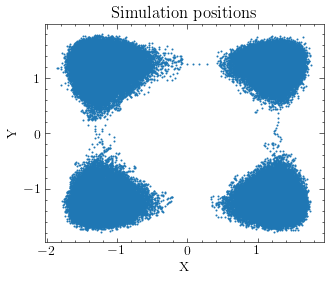

In [45]:
plt.scatter(position_x,position_y,s=1)
plt.title("Simulation positions")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

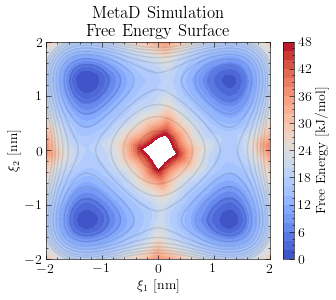

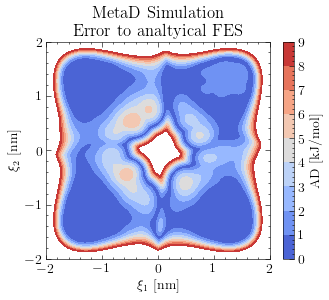

In [44]:
plt.figure(1)
plt.contourf(X, Y, FES, levels=range(0,50,2), cmap='coolwarm');
plt.colorbar(label="Free Energy [kJ/mol]")
plt.contour(X, Y, Z, levels=range(0,50,5), colors="black", alpha=0.1);
plt.xlabel(r"$\xi_1$ [nm]")
plt.ylabel(r"$\xi_2$ [nm]")
plt.title("MetaD Simulation \nFree Energy Surface")

plt.figure(2)
plt.contourf(X, Y, AD, cmap='coolwarm', levels=range(0,10,1))#
plt.colorbar(label="AD [kJ/mol]")
plt.xlabel(r"$\xi_1$ [nm]")
plt.ylabel(r"$\xi_2$ [nm]")
plt.title("MetaD Simulation \nError to analtyical FES")
plt.show()

In [48]:
Ftot_den0 = np.array(Ftot_den)
Ftot_x0 = np.array(Ftot_x)
Ftot_y0 = np.array(Ftot_y)

# Patching simulations

This part requires the terms Ftot_den0, Ftot_x0 and Ftot_y0 to be defined as the force terms obtained from the previous 2D simulation.

Due to the the equations used in the MFI theory, multiple force terms from independent simulations can be patched together and treated as force terms from the same simulation. Considering following equation:

$\Big\langle \frac{dF_t(x)}{dx} \Big\rangle_t = \frac{\sum_t p_t^b(x) \frac{dF_t(x)}{dx}}{\sum_t p_t^b(x)}$

Instead of using the mean force and probability density of the individual windows, one can use the average mean force and the respective probability density of independent simulations. 

To present this concept, the previous simulation data (Ftot_den0, Ftot_x0 and Ftot_y0) will be patched with a new simulation. Given that the previous simulation never reached regions of higher energy, the new simulation will have higher hills for the metadynamics bias ( i.e. a stronger drive towards regions of high energy)


In [18]:
os.chdir(path + "/MFI_2D")

In [47]:
run_langevin2D(1000000, height=5)



PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Mar  8 2021 at 17:46:23
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /home/antoniu/.local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /home/antoniu/.local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: pesmd
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 2
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action DISTANCE
PLUMED:   with label p
PLUMED:   between atoms 1 2
PLUMED:   using periodic boundary conditions
PLUMED:   added component to this action:  p.x 
PLUMED:   added component to this action:  p.y 
PLUMED:   added component to this action:  p.z 
PLUMED:   WARNING: components will not have the proper periodi

Doing step 7040
Doing step 7060
Doing step 7080
Doing step 7100
Doing step 7120
Doing step 7140
Doing step 7160
Doing step 7180
Doing step 7200
Doing step 7220
Doing step 7240
Doing step 7260
Doing step 7280
Doing step 7300
Doing step 7320
Doing step 7340
Doing step 7360
Doing step 7380
Doing step 7400
Doing step 7420
Doing step 7440
Doing step 7460
Doing step 7480
Doing step 7500
Doing step 7520
Doing step 7540
Doing step 7560
Doing step 7580
Doing step 7600
Doing step 7620
Doing step 7640
Doing step 7660
Doing step 7680
Doing step 7700
Doing step 7720
Doing step 7740
Doing step 7760
Doing step 7780
Doing step 7800
Doing step 7820
Doing step 7840
Doing step 7860
Doing step 7880
Doing step 7900
Doing step 7920
Doing step 7940
Doing step 7960
Doing step 7980
Doing step 8000
Doing step 8020
Doing step 8040
Doing step 8060
Doing step 8080
Doing step 8100
Doing step 8120
Doing step 8140
Doing step 8160
Doing step 8180
Doing step 8200
Doing step 8220
Doing step 8240
Doing step 8260
Doing st

Doing step 17300
Doing step 17320
Doing step 17340
Doing step 17360
Doing step 17380
Doing step 17400
Doing step 17420
Doing step 17440
Doing step 17460
Doing step 17480
Doing step 17500
Doing step 17520
Doing step 17540
Doing step 17560
Doing step 17580
Doing step 17600
Doing step 17620
Doing step 17640
Doing step 17660
Doing step 17680
Doing step 17700
Doing step 17720
Doing step 17740
Doing step 17760
Doing step 17780
Doing step 17800
Doing step 17820
Doing step 17840
Doing step 17860
Doing step 17880
Doing step 17900
Doing step 17920
Doing step 17940
Doing step 17960
Doing step 17980
Doing step 18000
Doing step 18020
Doing step 18040
Doing step 18060
Doing step 18080
Doing step 18100
Doing step 18120
Doing step 18140
Doing step 18160
Doing step 18180
Doing step 18200
Doing step 18220
Doing step 18240
Doing step 18260
Doing step 18280
Doing step 18300
Doing step 18320
Doing step 18340
Doing step 18360
Doing step 18380
Doing step 18400
Doing step 18420
Doing step 18440
Doing step 184

Doing step 27500
Doing step 27520
Doing step 27540
Doing step 27560
Doing step 27580
Doing step 27600
Doing step 27620
Doing step 27640
Doing step 27660
Doing step 27680
Doing step 27700
Doing step 27720
Doing step 27740
Doing step 27760
Doing step 27780
Doing step 27800
Doing step 27820
Doing step 27840
Doing step 27860
Doing step 27880
Doing step 27900
Doing step 27920
Doing step 27940
Doing step 27960
Doing step 27980
Doing step 28000
Doing step 28020
Doing step 28040
Doing step 28060
Doing step 28080
Doing step 28100
Doing step 28120
Doing step 28140
Doing step 28160
Doing step 28180
Doing step 28200
Doing step 28220
Doing step 28240
Doing step 28260
Doing step 28280
Doing step 28300
Doing step 28320
Doing step 28340
Doing step 28360
Doing step 28380
Doing step 28400
Doing step 28420
Doing step 28440
Doing step 28460
Doing step 28480
Doing step 28500
Doing step 28520
Doing step 28540
Doing step 28560
Doing step 28580
Doing step 28600
Doing step 28620
Doing step 28640
Doing step 286

Doing step 37800
Doing step 37820
Doing step 37840
Doing step 37860
Doing step 37880
Doing step 37900
Doing step 37920
Doing step 37940
Doing step 37960
Doing step 37980
Doing step 38000
Doing step 38020
Doing step 38040
Doing step 38060
Doing step 38080
Doing step 38100
Doing step 38120
Doing step 38140
Doing step 38160
Doing step 38180
Doing step 38200
Doing step 38220
Doing step 38240
Doing step 38260
Doing step 38280
Doing step 38300
Doing step 38320
Doing step 38340
Doing step 38360
Doing step 38380
Doing step 38400
Doing step 38420
Doing step 38440
Doing step 38460
Doing step 38480
Doing step 38500
Doing step 38520
Doing step 38540
Doing step 38560
Doing step 38580
Doing step 38600
Doing step 38620
Doing step 38640
Doing step 38660
Doing step 38680
Doing step 38700
Doing step 38720
Doing step 38740
Doing step 38760
Doing step 38780
Doing step 38800
Doing step 38820
Doing step 38840
Doing step 38860
Doing step 38880
Doing step 38900
Doing step 38920
Doing step 38940
Doing step 389

Doing step 48200
Doing step 48220
Doing step 48240
Doing step 48260
Doing step 48280
Doing step 48300
Doing step 48320
Doing step 48340
Doing step 48360
Doing step 48380
Doing step 48400
Doing step 48420
Doing step 48440
Doing step 48460
Doing step 48480
Doing step 48500
Doing step 48520
Doing step 48540
Doing step 48560
Doing step 48580
Doing step 48600
Doing step 48620
Doing step 48640
Doing step 48660
Doing step 48680
Doing step 48700
Doing step 48720
Doing step 48740
Doing step 48760
Doing step 48780
Doing step 48800
Doing step 48820
Doing step 48840
Doing step 48860
Doing step 48880
Doing step 48900
Doing step 48920
Doing step 48940
Doing step 48960
Doing step 48980
Doing step 49000
Doing step 49020
Doing step 49040
Doing step 49060
Doing step 49080
Doing step 49100
Doing step 49120
Doing step 49140
Doing step 49160
Doing step 49180
Doing step 49200
Doing step 49220
Doing step 49240
Doing step 49260
Doing step 49280
Doing step 49300
Doing step 49320
Doing step 49340
Doing step 493

Doing step 58500
Doing step 58520
Doing step 58540
Doing step 58560
Doing step 58580
Doing step 58600
Doing step 58620
Doing step 58640
Doing step 58660
Doing step 58680
Doing step 58700
Doing step 58720
Doing step 58740
Doing step 58760
Doing step 58780
Doing step 58800
Doing step 58820
Doing step 58840
Doing step 58860
Doing step 58880
Doing step 58900
Doing step 58920
Doing step 58940
Doing step 58960
Doing step 58980
Doing step 59000
Doing step 59020
Doing step 59040
Doing step 59060
Doing step 59080
Doing step 59100
Doing step 59120
Doing step 59140
Doing step 59160
Doing step 59180
Doing step 59200
Doing step 59220
Doing step 59240
Doing step 59260
Doing step 59280
Doing step 59300
Doing step 59320
Doing step 59340
Doing step 59360
Doing step 59380
Doing step 59400
Doing step 59420
Doing step 59440
Doing step 59460
Doing step 59480
Doing step 59500
Doing step 59520
Doing step 59540
Doing step 59560
Doing step 59580
Doing step 59600
Doing step 59620
Doing step 59640
Doing step 596

Doing step 68700
Doing step 68720
Doing step 68740
Doing step 68760
Doing step 68780
Doing step 68800
Doing step 68820
Doing step 68840
Doing step 68860
Doing step 68880
Doing step 68900
Doing step 68920
Doing step 68940
Doing step 68960
Doing step 68980
Doing step 69000
Doing step 69020
Doing step 69040
Doing step 69060
Doing step 69080
Doing step 69100
Doing step 69120
Doing step 69140
Doing step 69160
Doing step 69180
Doing step 69200
Doing step 69220
Doing step 69240
Doing step 69260
Doing step 69280
Doing step 69300
Doing step 69320
Doing step 69340
Doing step 69360
Doing step 69380
Doing step 69400
Doing step 69420
Doing step 69440
Doing step 69460
Doing step 69480
Doing step 69500
Doing step 69520
Doing step 69540
Doing step 69560
Doing step 69580
Doing step 69600
Doing step 69620
Doing step 69640
Doing step 69660
Doing step 69680
Doing step 69700
Doing step 69720
Doing step 69740
Doing step 69760
Doing step 69780
Doing step 69800
Doing step 69820
Doing step 69840
Doing step 698

Doing step 78820
Doing step 78840
Doing step 78860
Doing step 78880
Doing step 78900
Doing step 78920
Doing step 78940
Doing step 78960
Doing step 78980
Doing step 79000
Doing step 79020
Doing step 79040
Doing step 79060
Doing step 79080
Doing step 79100
Doing step 79120
Doing step 79140
Doing step 79160
Doing step 79180
Doing step 79200
Doing step 79220
Doing step 79240
Doing step 79260
Doing step 79280
Doing step 79300
Doing step 79320
Doing step 79340
Doing step 79360
Doing step 79380
Doing step 79400
Doing step 79420
Doing step 79440
Doing step 79460
Doing step 79480
Doing step 79500
Doing step 79520
Doing step 79540
Doing step 79560
Doing step 79580
Doing step 79600
Doing step 79620
Doing step 79640
Doing step 79660
Doing step 79680
Doing step 79700
Doing step 79720
Doing step 79740
Doing step 79760
Doing step 79780
Doing step 79800
Doing step 79820
Doing step 79840
Doing step 79860
Doing step 79880
Doing step 79900
Doing step 79920
Doing step 79940
Doing step 79960
Doing step 799

Doing step 89000
Doing step 89020
Doing step 89040
Doing step 89060
Doing step 89080
Doing step 89100
Doing step 89120
Doing step 89140
Doing step 89160
Doing step 89180
Doing step 89200
Doing step 89220
Doing step 89240
Doing step 89260
Doing step 89280
Doing step 89300
Doing step 89320
Doing step 89340
Doing step 89360
Doing step 89380
Doing step 89400
Doing step 89420
Doing step 89440
Doing step 89460
Doing step 89480
Doing step 89500
Doing step 89520
Doing step 89540
Doing step 89560
Doing step 89580
Doing step 89600
Doing step 89620
Doing step 89640
Doing step 89660
Doing step 89680
Doing step 89700
Doing step 89720
Doing step 89740
Doing step 89760
Doing step 89780
Doing step 89800
Doing step 89820
Doing step 89840
Doing step 89860
Doing step 89880
Doing step 89900
Doing step 89920
Doing step 89940
Doing step 89960
Doing step 89980
Doing step 90000
Doing step 90020
Doing step 90040
Doing step 90060
Doing step 90080
Doing step 90100
Doing step 90120
Doing step 90140
Doing step 901

Doing step 99000
Doing step 99020
Doing step 99040
Doing step 99060
Doing step 99080
Doing step 99100
Doing step 99120
Doing step 99140
Doing step 99160
Doing step 99180
Doing step 99200
Doing step 99220
Doing step 99240
Doing step 99260
Doing step 99280
Doing step 99300
Doing step 99320
Doing step 99340
Doing step 99360
Doing step 99380
Doing step 99400
Doing step 99420
Doing step 99440
Doing step 99460
Doing step 99480
Doing step 99500
Doing step 99520
Doing step 99540
Doing step 99560
Doing step 99580
Doing step 99600
Doing step 99620
Doing step 99640
Doing step 99660
Doing step 99680
Doing step 99700
Doing step 99720
Doing step 99740
Doing step 99760
Doing step 99780
Doing step 99800
Doing step 99820
Doing step 99840
Doing step 99860
Doing step 99880
Doing step 99900
Doing step 99920
Doing step 99940
Doing step 99960
Doing step 99980
Doing step 100000
Doing step 100020
Doing step 100040
Doing step 100060
Doing step 100080
Doing step 100100
Doing step 100120
Doing step 100140
Doing 

Doing step 108300
Doing step 108320
Doing step 108340
Doing step 108360
Doing step 108380
Doing step 108400
Doing step 108420
Doing step 108440
Doing step 108460
Doing step 108480
Doing step 108500
Doing step 108520
Doing step 108540
Doing step 108560
Doing step 108580
Doing step 108600
Doing step 108620
Doing step 108640
Doing step 108660
Doing step 108680
Doing step 108700
Doing step 108720
Doing step 108740
Doing step 108760
Doing step 108780
Doing step 108800
Doing step 108820
Doing step 108840
Doing step 108860
Doing step 108880
Doing step 108900
Doing step 108920
Doing step 108940
Doing step 108960
Doing step 108980
Doing step 109000
Doing step 109020
Doing step 109040
Doing step 109060
Doing step 109080
Doing step 109100
Doing step 109120
Doing step 109140
Doing step 109160
Doing step 109180
Doing step 109200
Doing step 109220
Doing step 109240
Doing step 109260
Doing step 109280
Doing step 109300
Doing step 109320
Doing step 109340
Doing step 109360
Doing step 109380
Doing step

Doing step 118160
Doing step 118180
Doing step 118200
Doing step 118220
Doing step 118240
Doing step 118260
Doing step 118280
Doing step 118300
Doing step 118320
Doing step 118340
Doing step 118360
Doing step 118380
Doing step 118400
Doing step 118420
Doing step 118440
Doing step 118460
Doing step 118480
Doing step 118500
Doing step 118520
Doing step 118540
Doing step 118560
Doing step 118580
Doing step 118600
Doing step 118620
Doing step 118640
Doing step 118660
Doing step 118680
Doing step 118700
Doing step 118720
Doing step 118740
Doing step 118760
Doing step 118780
Doing step 118800
Doing step 118820
Doing step 118840
Doing step 118860
Doing step 118880
Doing step 118900
Doing step 118920
Doing step 118940
Doing step 118960
Doing step 118980
Doing step 119000
Doing step 119020
Doing step 119040
Doing step 119060
Doing step 119080
Doing step 119100
Doing step 119120
Doing step 119140
Doing step 119160
Doing step 119180
Doing step 119200
Doing step 119220
Doing step 119240
Doing step

Doing step 127400
Doing step 127420
Doing step 127440
Doing step 127460
Doing step 127480
Doing step 127500
Doing step 127520
Doing step 127540
Doing step 127560
Doing step 127580
Doing step 127600
Doing step 127620
Doing step 127640
Doing step 127660
Doing step 127680
Doing step 127700
Doing step 127720
Doing step 127740
Doing step 127760
Doing step 127780
Doing step 127800
Doing step 127820
Doing step 127840
Doing step 127860
Doing step 127880
Doing step 127900
Doing step 127920
Doing step 127940
Doing step 127960
Doing step 127980
Doing step 128000
Doing step 128020
Doing step 128040
Doing step 128060
Doing step 128080
Doing step 128100
Doing step 128120
Doing step 128140
Doing step 128160
Doing step 128180
Doing step 128200
Doing step 128220
Doing step 128240
Doing step 128260
Doing step 128280
Doing step 128300
Doing step 128320
Doing step 128340
Doing step 128360
Doing step 128380
Doing step 128400
Doing step 128420
Doing step 128440
Doing step 128460
Doing step 128480
Doing step

Doing step 136600
Doing step 136620
Doing step 136640
Doing step 136660
Doing step 136680
Doing step 136700
Doing step 136720
Doing step 136740
Doing step 136760
Doing step 136780
Doing step 136800
Doing step 136820
Doing step 136840
Doing step 136860
Doing step 136880
Doing step 136900
Doing step 136920
Doing step 136940
Doing step 136960
Doing step 136980
Doing step 137000
Doing step 137020
Doing step 137040
Doing step 137060
Doing step 137080
Doing step 137100
Doing step 137120
Doing step 137140
Doing step 137160
Doing step 137180
Doing step 137200
Doing step 137220
Doing step 137240
Doing step 137260
Doing step 137280
Doing step 137300
Doing step 137320
Doing step 137340
Doing step 137360
Doing step 137380
Doing step 137400
Doing step 137420
Doing step 137440
Doing step 137460
Doing step 137480
Doing step 137500
Doing step 137520
Doing step 137540
Doing step 137560
Doing step 137580
Doing step 137600
Doing step 137620
Doing step 137640
Doing step 137660
Doing step 137680
Doing step

Doing step 145920
Doing step 145940
Doing step 145960
Doing step 145980
Doing step 146000
Doing step 146020
Doing step 146040
Doing step 146060
Doing step 146080
Doing step 146100
Doing step 146120
Doing step 146140
Doing step 146160
Doing step 146180
Doing step 146200
Doing step 146220
Doing step 146240
Doing step 146260
Doing step 146280
Doing step 146300
Doing step 146320
Doing step 146340
Doing step 146360
Doing step 146380
Doing step 146400
Doing step 146420
Doing step 146440
Doing step 146460
Doing step 146480
Doing step 146500
Doing step 146520
Doing step 146540
Doing step 146560
Doing step 146580
Doing step 146600
Doing step 146620
Doing step 146640
Doing step 146660
Doing step 146680
Doing step 146700
Doing step 146720
Doing step 146740
Doing step 146760
Doing step 146780
Doing step 146800
Doing step 146820
Doing step 146840
Doing step 146860
Doing step 146880
Doing step 146900
Doing step 146920
Doing step 146940
Doing step 146960
Doing step 146980
Doing step 147000
Doing step

Doing step 156000
Doing step 156020
Doing step 156040
Doing step 156060
Doing step 156080
Doing step 156100
Doing step 156120
Doing step 156140
Doing step 156160
Doing step 156180
Doing step 156200
Doing step 156220
Doing step 156240
Doing step 156260
Doing step 156280
Doing step 156300
Doing step 156320
Doing step 156340
Doing step 156360
Doing step 156380
Doing step 156400
Doing step 156420
Doing step 156440
Doing step 156460
Doing step 156480
Doing step 156500
Doing step 156520
Doing step 156540
Doing step 156560
Doing step 156580
Doing step 156600
Doing step 156620
Doing step 156640
Doing step 156660
Doing step 156680
Doing step 156700
Doing step 156720
Doing step 156740
Doing step 156760
Doing step 156780
Doing step 156800
Doing step 156820
Doing step 156840
Doing step 156860
Doing step 156880
Doing step 156900
Doing step 156920
Doing step 156940
Doing step 156960
Doing step 156980
Doing step 157000
Doing step 157020
Doing step 157040
Doing step 157060
Doing step 157080
Doing step

Doing step 165400
Doing step 165420
Doing step 165440
Doing step 165460
Doing step 165480
Doing step 165500
Doing step 165520
Doing step 165540
Doing step 165560
Doing step 165580
Doing step 165600
Doing step 165620
Doing step 165640
Doing step 165660
Doing step 165680
Doing step 165700
Doing step 165720
Doing step 165740
Doing step 165760
Doing step 165780
Doing step 165800
Doing step 165820
Doing step 165840
Doing step 165860
Doing step 165880
Doing step 165900
Doing step 165920
Doing step 165940
Doing step 165960
Doing step 165980
Doing step 166000
Doing step 166020
Doing step 166040
Doing step 166060
Doing step 166080
Doing step 166100
Doing step 166120
Doing step 166140
Doing step 166160
Doing step 166180
Doing step 166200
Doing step 166220
Doing step 166240
Doing step 166260
Doing step 166280
Doing step 166300
Doing step 166320
Doing step 166340
Doing step 166360
Doing step 166380
Doing step 166400
Doing step 166420
Doing step 166440
Doing step 166460
Doing step 166480
Doing step

Doing step 175300
Doing step 175320
Doing step 175340
Doing step 175360
Doing step 175380
Doing step 175400
Doing step 175420
Doing step 175440
Doing step 175460
Doing step 175480
Doing step 175500
Doing step 175520
Doing step 175540
Doing step 175560
Doing step 175580
Doing step 175600
Doing step 175620
Doing step 175640
Doing step 175660
Doing step 175680
Doing step 175700
Doing step 175720
Doing step 175740
Doing step 175760
Doing step 175780
Doing step 175800
Doing step 175820
Doing step 175840
Doing step 175860
Doing step 175880
Doing step 175900
Doing step 175920
Doing step 175940
Doing step 175960
Doing step 175980
Doing step 176000
Doing step 176020
Doing step 176040
Doing step 176060
Doing step 176080
Doing step 176100
Doing step 176120
Doing step 176140
Doing step 176160
Doing step 176180
Doing step 176200
Doing step 176220
Doing step 176240
Doing step 176260
Doing step 176280
Doing step 176300
Doing step 176320
Doing step 176340
Doing step 176360
Doing step 176380
Doing step

Doing step 184580
Doing step 184600
Doing step 184620
Doing step 184640
Doing step 184660
Doing step 184680
Doing step 184700
Doing step 184720
Doing step 184740
Doing step 184760
Doing step 184780
Doing step 184800
Doing step 184820
Doing step 184840
Doing step 184860
Doing step 184880
Doing step 184900
Doing step 184920
Doing step 184940
Doing step 184960
Doing step 184980
Doing step 185000
Doing step 185020
Doing step 185040
Doing step 185060
Doing step 185080
Doing step 185100
Doing step 185120
Doing step 185140
Doing step 185160
Doing step 185180
Doing step 185200
Doing step 185220
Doing step 185240
Doing step 185260
Doing step 185280
Doing step 185300
Doing step 185320
Doing step 185340
Doing step 185360
Doing step 185380
Doing step 185400
Doing step 185420
Doing step 185440
Doing step 185460
Doing step 185480
Doing step 185500
Doing step 185520
Doing step 185540
Doing step 185560
Doing step 185580
Doing step 185600
Doing step 185620
Doing step 185640
Doing step 185660
Doing step

Doing step 194640
Doing step 194660
Doing step 194680
Doing step 194700
Doing step 194720
Doing step 194740
Doing step 194760
Doing step 194780
Doing step 194800
Doing step 194820
Doing step 194840
Doing step 194860
Doing step 194880
Doing step 194900
Doing step 194920
Doing step 194940
Doing step 194960
Doing step 194980
Doing step 195000
Doing step 195020
Doing step 195040
Doing step 195060
Doing step 195080
Doing step 195100
Doing step 195120
Doing step 195140
Doing step 195160
Doing step 195180
Doing step 195200
Doing step 195220
Doing step 195240
Doing step 195260
Doing step 195280
Doing step 195300
Doing step 195320
Doing step 195340
Doing step 195360
Doing step 195380
Doing step 195400
Doing step 195420
Doing step 195440
Doing step 195460
Doing step 195480
Doing step 195500
Doing step 195520
Doing step 195540
Doing step 195560
Doing step 195580
Doing step 195600
Doing step 195620
Doing step 195640
Doing step 195660
Doing step 195680
Doing step 195700
Doing step 195720
Doing step

Doing step 204500
Doing step 204520
Doing step 204540
Doing step 204560
Doing step 204580
Doing step 204600
Doing step 204620
Doing step 204640
Doing step 204660
Doing step 204680
Doing step 204700
Doing step 204720
Doing step 204740
Doing step 204760
Doing step 204780
Doing step 204800
Doing step 204820
Doing step 204840
Doing step 204860
Doing step 204880
Doing step 204900
Doing step 204920
Doing step 204940
Doing step 204960
Doing step 204980
Doing step 205000
Doing step 205020
Doing step 205040
Doing step 205060
Doing step 205080
Doing step 205100
Doing step 205120
Doing step 205140
Doing step 205160
Doing step 205180
Doing step 205200
Doing step 205220
Doing step 205240
Doing step 205260
Doing step 205280
Doing step 205300
Doing step 205320
Doing step 205340
Doing step 205360
Doing step 205380
Doing step 205400
Doing step 205420
Doing step 205440
Doing step 205460
Doing step 205480
Doing step 205500
Doing step 205520
Doing step 205540
Doing step 205560
Doing step 205580
Doing step

Doing step 214380
Doing step 214400
Doing step 214420
Doing step 214440
Doing step 214460
Doing step 214480
Doing step 214500
Doing step 214520
Doing step 214540
Doing step 214560
Doing step 214580
Doing step 214600
Doing step 214620
Doing step 214640
Doing step 214660
Doing step 214680
Doing step 214700
Doing step 214720
Doing step 214740
Doing step 214760
Doing step 214780
Doing step 214800
Doing step 214820
Doing step 214840
Doing step 214860
Doing step 214880
Doing step 214900
Doing step 214920
Doing step 214940
Doing step 214960
Doing step 214980
Doing step 215000
Doing step 215020
Doing step 215040
Doing step 215060
Doing step 215080
Doing step 215100
Doing step 215120
Doing step 215140
Doing step 215160
Doing step 215180
Doing step 215200
Doing step 215220
Doing step 215240
Doing step 215260
Doing step 215280
Doing step 215300
Doing step 215320
Doing step 215340
Doing step 215360
Doing step 215380
Doing step 215400
Doing step 215420
Doing step 215440
Doing step 215460
Doing step

Doing step 223600
Doing step 223620
Doing step 223640
Doing step 223660
Doing step 223680
Doing step 223700
Doing step 223720
Doing step 223740
Doing step 223760
Doing step 223780
Doing step 223800
Doing step 223820
Doing step 223840
Doing step 223860
Doing step 223880
Doing step 223900
Doing step 223920
Doing step 223940
Doing step 223960
Doing step 223980
Doing step 224000
Doing step 224020
Doing step 224040
Doing step 224060
Doing step 224080
Doing step 224100
Doing step 224120
Doing step 224140
Doing step 224160
Doing step 224180
Doing step 224200
Doing step 224220
Doing step 224240
Doing step 224260
Doing step 224280
Doing step 224300
Doing step 224320
Doing step 224340
Doing step 224360
Doing step 224380
Doing step 224400
Doing step 224420
Doing step 224440
Doing step 224460
Doing step 224480
Doing step 224500
Doing step 224520
Doing step 224540
Doing step 224560
Doing step 224580
Doing step 224600
Doing step 224620
Doing step 224640
Doing step 224660
Doing step 224680
Doing step

Doing step 232800
Doing step 232820
Doing step 232840
Doing step 232860
Doing step 232880
Doing step 232900
Doing step 232920
Doing step 232940
Doing step 232960
Doing step 232980
Doing step 233000
Doing step 233020
Doing step 233040
Doing step 233060
Doing step 233080
Doing step 233100
Doing step 233120
Doing step 233140
Doing step 233160
Doing step 233180
Doing step 233200
Doing step 233220
Doing step 233240
Doing step 233260
Doing step 233280
Doing step 233300
Doing step 233320
Doing step 233340
Doing step 233360
Doing step 233380
Doing step 233400
Doing step 233420
Doing step 233440
Doing step 233460
Doing step 233480
Doing step 233500
Doing step 233520
Doing step 233540
Doing step 233560
Doing step 233580
Doing step 233600
Doing step 233620
Doing step 233640
Doing step 233660
Doing step 233680
Doing step 233700
Doing step 233720
Doing step 233740
Doing step 233760
Doing step 233780
Doing step 233800
Doing step 233820
Doing step 233840
Doing step 233860
Doing step 233880
Doing step

Doing step 242000
Doing step 242020
Doing step 242040
Doing step 242060
Doing step 242080
Doing step 242100
Doing step 242120
Doing step 242140
Doing step 242160
Doing step 242180
Doing step 242200
Doing step 242220
Doing step 242240
Doing step 242260
Doing step 242280
Doing step 242300
Doing step 242320
Doing step 242340
Doing step 242360
Doing step 242380
Doing step 242400
Doing step 242420
Doing step 242440
Doing step 242460
Doing step 242480
Doing step 242500
Doing step 242520
Doing step 242540
Doing step 242560
Doing step 242580
Doing step 242600
Doing step 242620
Doing step 242640
Doing step 242660
Doing step 242680
Doing step 242700
Doing step 242720
Doing step 242740
Doing step 242760
Doing step 242780
Doing step 242800
Doing step 242820
Doing step 242840
Doing step 242860
Doing step 242880
Doing step 242900
Doing step 242920
Doing step 242940
Doing step 242960
Doing step 242980
Doing step 243000
Doing step 243020
Doing step 243040
Doing step 243060
Doing step 243080
Doing step

Doing step 251200
Doing step 251220
Doing step 251240
Doing step 251260
Doing step 251280
Doing step 251300
Doing step 251320
Doing step 251340
Doing step 251360
Doing step 251380
Doing step 251400
Doing step 251420
Doing step 251440
Doing step 251460
Doing step 251480
Doing step 251500
Doing step 251520
Doing step 251540
Doing step 251560
Doing step 251580
Doing step 251600
Doing step 251620
Doing step 251640
Doing step 251660
Doing step 251680
Doing step 251700
Doing step 251720
Doing step 251740
Doing step 251760
Doing step 251780
Doing step 251800
Doing step 251820
Doing step 251840
Doing step 251860
Doing step 251880
Doing step 251900
Doing step 251920
Doing step 251940
Doing step 251960
Doing step 251980
Doing step 252000
Doing step 252020
Doing step 252040
Doing step 252060
Doing step 252080
Doing step 252100
Doing step 252120
Doing step 252140
Doing step 252160
Doing step 252180
Doing step 252200
Doing step 252220
Doing step 252240
Doing step 252260
Doing step 252280
Doing step

Doing step 260400
Doing step 260420
Doing step 260440
Doing step 260460
Doing step 260480
Doing step 260500
Doing step 260520
Doing step 260540
Doing step 260560
Doing step 260580
Doing step 260600
Doing step 260620
Doing step 260640
Doing step 260660
Doing step 260680
Doing step 260700
Doing step 260720
Doing step 260740
Doing step 260760
Doing step 260780
Doing step 260800
Doing step 260820
Doing step 260840
Doing step 260860
Doing step 260880
Doing step 260900
Doing step 260920
Doing step 260940
Doing step 260960
Doing step 260980
Doing step 261000
Doing step 261020
Doing step 261040
Doing step 261060
Doing step 261080
Doing step 261100
Doing step 261120
Doing step 261140
Doing step 261160
Doing step 261180
Doing step 261200
Doing step 261220
Doing step 261240
Doing step 261260
Doing step 261280
Doing step 261300
Doing step 261320
Doing step 261340
Doing step 261360
Doing step 261380
Doing step 261400
Doing step 261420
Doing step 261440
Doing step 261460
Doing step 261480
Doing step

Doing step 269840
Doing step 269860
Doing step 269880
Doing step 269900
Doing step 269920
Doing step 269940
Doing step 269960
Doing step 269980
Doing step 270000
Doing step 270020
Doing step 270040
Doing step 270060
Doing step 270080
Doing step 270100
Doing step 270120
Doing step 270140
Doing step 270160
Doing step 270180
Doing step 270200
Doing step 270220
Doing step 270240
Doing step 270260
Doing step 270280
Doing step 270300
Doing step 270320
Doing step 270340
Doing step 270360
Doing step 270380
Doing step 270400
Doing step 270420
Doing step 270440
Doing step 270460
Doing step 270480
Doing step 270500
Doing step 270520
Doing step 270540
Doing step 270560
Doing step 270580
Doing step 270600
Doing step 270620
Doing step 270640
Doing step 270660
Doing step 270680
Doing step 270700
Doing step 270720
Doing step 270740
Doing step 270760
Doing step 270780
Doing step 270800
Doing step 270820
Doing step 270840
Doing step 270860
Doing step 270880
Doing step 270900
Doing step 270920
Doing step

Doing step 279000
Doing step 279020
Doing step 279040
Doing step 279060
Doing step 279080
Doing step 279100
Doing step 279120
Doing step 279140
Doing step 279160
Doing step 279180
Doing step 279200
Doing step 279220
Doing step 279240
Doing step 279260
Doing step 279280
Doing step 279300
Doing step 279320
Doing step 279340
Doing step 279360
Doing step 279380
Doing step 279400
Doing step 279420
Doing step 279440
Doing step 279460
Doing step 279480
Doing step 279500
Doing step 279520
Doing step 279540
Doing step 279560
Doing step 279580
Doing step 279600
Doing step 279620
Doing step 279640
Doing step 279660
Doing step 279680
Doing step 279700
Doing step 279720
Doing step 279740
Doing step 279760
Doing step 279780
Doing step 279800
Doing step 279820
Doing step 279840
Doing step 279860
Doing step 279880
Doing step 279900
Doing step 279920
Doing step 279940
Doing step 279960
Doing step 279980
Doing step 280000
Doing step 280020
Doing step 280040
Doing step 280060
Doing step 280080
Doing step

Doing step 288400
Doing step 288420
Doing step 288440
Doing step 288460
Doing step 288480
Doing step 288500
Doing step 288520
Doing step 288540
Doing step 288560
Doing step 288580
Doing step 288600
Doing step 288620
Doing step 288640
Doing step 288660
Doing step 288680
Doing step 288700
Doing step 288720
Doing step 288740
Doing step 288760
Doing step 288780
Doing step 288800
Doing step 288820
Doing step 288840
Doing step 288860
Doing step 288880
Doing step 288900
Doing step 288920
Doing step 288940
Doing step 288960
Doing step 288980
Doing step 289000
Doing step 289020
Doing step 289040
Doing step 289060
Doing step 289080
Doing step 289100
Doing step 289120
Doing step 289140
Doing step 289160
Doing step 289180
Doing step 289200
Doing step 289220
Doing step 289240
Doing step 289260
Doing step 289280
Doing step 289300
Doing step 289320
Doing step 289340
Doing step 289360
Doing step 289380
Doing step 289400
Doing step 289420
Doing step 289440
Doing step 289460
Doing step 289480
Doing step

Doing step 297900
Doing step 297920
Doing step 297940
Doing step 297960
Doing step 297980
Doing step 298000
Doing step 298020
Doing step 298040
Doing step 298060
Doing step 298080
Doing step 298100
Doing step 298120
Doing step 298140
Doing step 298160
Doing step 298180
Doing step 298200
Doing step 298220
Doing step 298240
Doing step 298260
Doing step 298280
Doing step 298300
Doing step 298320
Doing step 298340
Doing step 298360
Doing step 298380
Doing step 298400
Doing step 298420
Doing step 298440
Doing step 298460
Doing step 298480
Doing step 298500
Doing step 298520
Doing step 298540
Doing step 298560
Doing step 298580
Doing step 298600
Doing step 298620
Doing step 298640
Doing step 298660
Doing step 298680
Doing step 298700
Doing step 298720
Doing step 298740
Doing step 298760
Doing step 298780
Doing step 298800
Doing step 298820
Doing step 298840
Doing step 298860
Doing step 298880
Doing step 298900
Doing step 298920
Doing step 298940
Doing step 298960
Doing step 298980
Doing step

Doing step 307100
Doing step 307120
Doing step 307140
Doing step 307160
Doing step 307180
Doing step 307200
Doing step 307220
Doing step 307240
Doing step 307260
Doing step 307280
Doing step 307300
Doing step 307320
Doing step 307340
Doing step 307360
Doing step 307380
Doing step 307400
Doing step 307420
Doing step 307440
Doing step 307460
Doing step 307480
Doing step 307500
Doing step 307520
Doing step 307540
Doing step 307560
Doing step 307580
Doing step 307600
Doing step 307620
Doing step 307640
Doing step 307660
Doing step 307680
Doing step 307700
Doing step 307720
Doing step 307740
Doing step 307760
Doing step 307780
Doing step 307800
Doing step 307820
Doing step 307840
Doing step 307860
Doing step 307880
Doing step 307900
Doing step 307920
Doing step 307940
Doing step 307960
Doing step 307980
Doing step 308000
Doing step 308020
Doing step 308040
Doing step 308060
Doing step 308080
Doing step 308100
Doing step 308120
Doing step 308140
Doing step 308160
Doing step 308180
Doing step

Doing step 316900
Doing step 316920
Doing step 316940
Doing step 316960
Doing step 316980
Doing step 317000
Doing step 317020
Doing step 317040
Doing step 317060
Doing step 317080
Doing step 317100
Doing step 317120
Doing step 317140
Doing step 317160
Doing step 317180
Doing step 317200
Doing step 317220
Doing step 317240
Doing step 317260
Doing step 317280
Doing step 317300
Doing step 317320
Doing step 317340
Doing step 317360
Doing step 317380
Doing step 317400
Doing step 317420
Doing step 317440
Doing step 317460
Doing step 317480
Doing step 317500
Doing step 317520
Doing step 317540
Doing step 317560
Doing step 317580
Doing step 317600
Doing step 317620
Doing step 317640
Doing step 317660
Doing step 317680
Doing step 317700
Doing step 317720
Doing step 317740
Doing step 317760
Doing step 317780
Doing step 317800
Doing step 317820
Doing step 317840
Doing step 317860
Doing step 317880
Doing step 317900
Doing step 317920
Doing step 317940
Doing step 317960
Doing step 317980
Doing step

Doing step 326600
Doing step 326620
Doing step 326640
Doing step 326660
Doing step 326680
Doing step 326700
Doing step 326720
Doing step 326740
Doing step 326760
Doing step 326780
Doing step 326800
Doing step 326820
Doing step 326840
Doing step 326860
Doing step 326880
Doing step 326900
Doing step 326920
Doing step 326940
Doing step 326960
Doing step 326980
Doing step 327000
Doing step 327020
Doing step 327040
Doing step 327060
Doing step 327080
Doing step 327100
Doing step 327120
Doing step 327140
Doing step 327160
Doing step 327180
Doing step 327200
Doing step 327220
Doing step 327240
Doing step 327260
Doing step 327280
Doing step 327300
Doing step 327320
Doing step 327340
Doing step 327360
Doing step 327380
Doing step 327400
Doing step 327420
Doing step 327440
Doing step 327460
Doing step 327480
Doing step 327500
Doing step 327520
Doing step 327540
Doing step 327560
Doing step 327580
Doing step 327600
Doing step 327620
Doing step 327640
Doing step 327660
Doing step 327680
Doing step

Doing step 336100
Doing step 336120
Doing step 336140
Doing step 336160
Doing step 336180
Doing step 336200
Doing step 336220
Doing step 336240
Doing step 336260
Doing step 336280
Doing step 336300
Doing step 336320
Doing step 336340
Doing step 336360
Doing step 336380
Doing step 336400
Doing step 336420
Doing step 336440
Doing step 336460
Doing step 336480
Doing step 336500
Doing step 336520
Doing step 336540
Doing step 336560
Doing step 336580
Doing step 336600
Doing step 336620
Doing step 336640
Doing step 336660
Doing step 336680
Doing step 336700
Doing step 336720
Doing step 336740
Doing step 336760
Doing step 336780
Doing step 336800
Doing step 336820
Doing step 336840
Doing step 336860
Doing step 336880
Doing step 336900
Doing step 336920
Doing step 336940
Doing step 336960
Doing step 336980
Doing step 337000
Doing step 337020
Doing step 337040
Doing step 337060
Doing step 337080
Doing step 337100
Doing step 337120
Doing step 337140
Doing step 337160
Doing step 337180
Doing step

Doing step 346200
Doing step 346220
Doing step 346240
Doing step 346260
Doing step 346280
Doing step 346300
Doing step 346320
Doing step 346340
Doing step 346360
Doing step 346380
Doing step 346400
Doing step 346420
Doing step 346440
Doing step 346460
Doing step 346480
Doing step 346500
Doing step 346520
Doing step 346540
Doing step 346560
Doing step 346580
Doing step 346600
Doing step 346620
Doing step 346640
Doing step 346660
Doing step 346680
Doing step 346700
Doing step 346720
Doing step 346740
Doing step 346760
Doing step 346780
Doing step 346800
Doing step 346820
Doing step 346840
Doing step 346860
Doing step 346880
Doing step 346900
Doing step 346920
Doing step 346940
Doing step 346960
Doing step 346980
Doing step 347000
Doing step 347020
Doing step 347040
Doing step 347060
Doing step 347080
Doing step 347100
Doing step 347120
Doing step 347140
Doing step 347160
Doing step 347180
Doing step 347200
Doing step 347220
Doing step 347240
Doing step 347260
Doing step 347280
Doing step

Doing step 355400
Doing step 355420
Doing step 355440
Doing step 355460
Doing step 355480
Doing step 355500
Doing step 355520
Doing step 355540
Doing step 355560
Doing step 355580
Doing step 355600
Doing step 355620
Doing step 355640
Doing step 355660
Doing step 355680
Doing step 355700
Doing step 355720
Doing step 355740
Doing step 355760
Doing step 355780
Doing step 355800
Doing step 355820
Doing step 355840
Doing step 355860
Doing step 355880
Doing step 355900
Doing step 355920
Doing step 355940
Doing step 355960
Doing step 355980
Doing step 356000
Doing step 356020
Doing step 356040
Doing step 356060
Doing step 356080
Doing step 356100
Doing step 356120
Doing step 356140
Doing step 356160
Doing step 356180
Doing step 356200
Doing step 356220
Doing step 356240
Doing step 356260
Doing step 356280
Doing step 356300
Doing step 356320
Doing step 356340
Doing step 356360
Doing step 356380
Doing step 356400
Doing step 356420
Doing step 356440
Doing step 356460
Doing step 356480
Doing step

Doing step 364620
Doing step 364640
Doing step 364660
Doing step 364680
Doing step 364700
Doing step 364720
Doing step 364740
Doing step 364760
Doing step 364780
Doing step 364800
Doing step 364820
Doing step 364840
Doing step 364860
Doing step 364880
Doing step 364900
Doing step 364920
Doing step 364940
Doing step 364960
Doing step 364980
Doing step 365000
Doing step 365020
Doing step 365040
Doing step 365060
Doing step 365080
Doing step 365100
Doing step 365120
Doing step 365140
Doing step 365160
Doing step 365180
Doing step 365200
Doing step 365220
Doing step 365240
Doing step 365260
Doing step 365280
Doing step 365300
Doing step 365320
Doing step 365340
Doing step 365360
Doing step 365380
Doing step 365400
Doing step 365420
Doing step 365440
Doing step 365460
Doing step 365480
Doing step 365500
Doing step 365520
Doing step 365540
Doing step 365560
Doing step 365580
Doing step 365600
Doing step 365620
Doing step 365640
Doing step 365660
Doing step 365680
Doing step 365700
Doing step

Doing step 373860
Doing step 373880
Doing step 373900
Doing step 373920
Doing step 373940
Doing step 373960
Doing step 373980
Doing step 374000
Doing step 374020
Doing step 374040
Doing step 374060
Doing step 374080
Doing step 374100
Doing step 374120
Doing step 374140
Doing step 374160
Doing step 374180
Doing step 374200
Doing step 374220
Doing step 374240
Doing step 374260
Doing step 374280
Doing step 374300
Doing step 374320
Doing step 374340
Doing step 374360
Doing step 374380
Doing step 374400
Doing step 374420
Doing step 374440
Doing step 374460
Doing step 374480
Doing step 374500
Doing step 374520
Doing step 374540
Doing step 374560
Doing step 374580
Doing step 374600
Doing step 374620
Doing step 374640
Doing step 374660
Doing step 374680
Doing step 374700
Doing step 374720
Doing step 374740
Doing step 374760
Doing step 374780
Doing step 374800
Doing step 374820
Doing step 374840
Doing step 374860
Doing step 374880
Doing step 374900
Doing step 374920
Doing step 374940
Doing step

Doing step 383700
Doing step 383720
Doing step 383740
Doing step 383760
Doing step 383780
Doing step 383800
Doing step 383820
Doing step 383840
Doing step 383860
Doing step 383880
Doing step 383900
Doing step 383920
Doing step 383940
Doing step 383960
Doing step 383980
Doing step 384000
Doing step 384020
Doing step 384040
Doing step 384060
Doing step 384080
Doing step 384100
Doing step 384120
Doing step 384140
Doing step 384160
Doing step 384180
Doing step 384200
Doing step 384220
Doing step 384240
Doing step 384260
Doing step 384280
Doing step 384300
Doing step 384320
Doing step 384340
Doing step 384360
Doing step 384380
Doing step 384400
Doing step 384420
Doing step 384440
Doing step 384460
Doing step 384480
Doing step 384500
Doing step 384520
Doing step 384540
Doing step 384560
Doing step 384580
Doing step 384600
Doing step 384620
Doing step 384640
Doing step 384660
Doing step 384680
Doing step 384700
Doing step 384720
Doing step 384740
Doing step 384760
Doing step 384780
Doing step

Doing step 393520
Doing step 393540
Doing step 393560
Doing step 393580
Doing step 393600
Doing step 393620
Doing step 393640
Doing step 393660
Doing step 393680
Doing step 393700
Doing step 393720
Doing step 393740
Doing step 393760
Doing step 393780
Doing step 393800
Doing step 393820
Doing step 393840
Doing step 393860
Doing step 393880
Doing step 393900
Doing step 393920
Doing step 393940
Doing step 393960
Doing step 393980
Doing step 394000
Doing step 394020
Doing step 394040
Doing step 394060
Doing step 394080
Doing step 394100
Doing step 394120
Doing step 394140
Doing step 394160
Doing step 394180
Doing step 394200
Doing step 394220
Doing step 394240
Doing step 394260
Doing step 394280
Doing step 394300
Doing step 394320
Doing step 394340
Doing step 394360
Doing step 394380
Doing step 394400
Doing step 394420
Doing step 394440
Doing step 394460
Doing step 394480
Doing step 394500
Doing step 394520
Doing step 394540
Doing step 394560
Doing step 394580
Doing step 394600
Doing step

Doing step 403500
Doing step 403520
Doing step 403540
Doing step 403560
Doing step 403580
Doing step 403600
Doing step 403620
Doing step 403640
Doing step 403660
Doing step 403680
Doing step 403700
Doing step 403720
Doing step 403740
Doing step 403760
Doing step 403780
Doing step 403800
Doing step 403820
Doing step 403840
Doing step 403860
Doing step 403880
Doing step 403900
Doing step 403920
Doing step 403940
Doing step 403960
Doing step 403980
Doing step 404000
Doing step 404020
Doing step 404040
Doing step 404060
Doing step 404080
Doing step 404100
Doing step 404120
Doing step 404140
Doing step 404160
Doing step 404180
Doing step 404200
Doing step 404220
Doing step 404240
Doing step 404260
Doing step 404280
Doing step 404300
Doing step 404320
Doing step 404340
Doing step 404360
Doing step 404380
Doing step 404400
Doing step 404420
Doing step 404440
Doing step 404460
Doing step 404480
Doing step 404500
Doing step 404520
Doing step 404540
Doing step 404560
Doing step 404580
Doing step

Doing step 413400
Doing step 413420
Doing step 413440
Doing step 413460
Doing step 413480
Doing step 413500
Doing step 413520
Doing step 413540
Doing step 413560
Doing step 413580
Doing step 413600
Doing step 413620
Doing step 413640
Doing step 413660
Doing step 413680
Doing step 413700
Doing step 413720
Doing step 413740
Doing step 413760
Doing step 413780
Doing step 413800
Doing step 413820
Doing step 413840
Doing step 413860
Doing step 413880
Doing step 413900
Doing step 413920
Doing step 413940
Doing step 413960
Doing step 413980
Doing step 414000
Doing step 414020
Doing step 414040
Doing step 414060
Doing step 414080
Doing step 414100
Doing step 414120
Doing step 414140
Doing step 414160
Doing step 414180
Doing step 414200
Doing step 414220
Doing step 414240
Doing step 414260
Doing step 414280
Doing step 414300
Doing step 414320
Doing step 414340
Doing step 414360
Doing step 414380
Doing step 414400
Doing step 414420
Doing step 414440
Doing step 414460
Doing step 414480
Doing step

Doing step 423180
Doing step 423200
Doing step 423220
Doing step 423240
Doing step 423260
Doing step 423280
Doing step 423300
Doing step 423320
Doing step 423340
Doing step 423360
Doing step 423380
Doing step 423400
Doing step 423420
Doing step 423440
Doing step 423460
Doing step 423480
Doing step 423500
Doing step 423520
Doing step 423540
Doing step 423560
Doing step 423580
Doing step 423600
Doing step 423620
Doing step 423640
Doing step 423660
Doing step 423680
Doing step 423700
Doing step 423720
Doing step 423740
Doing step 423760
Doing step 423780
Doing step 423800
Doing step 423820
Doing step 423840
Doing step 423860
Doing step 423880
Doing step 423900
Doing step 423920
Doing step 423940
Doing step 423960
Doing step 423980
Doing step 424000
Doing step 424020
Doing step 424040
Doing step 424060
Doing step 424080
Doing step 424100
Doing step 424120
Doing step 424140
Doing step 424160
Doing step 424180
Doing step 424200
Doing step 424220
Doing step 424240
Doing step 424260
Doing step

Doing step 433200
Doing step 433220
Doing step 433240
Doing step 433260
Doing step 433280
Doing step 433300
Doing step 433320
Doing step 433340
Doing step 433360
Doing step 433380
Doing step 433400
Doing step 433420
Doing step 433440
Doing step 433460
Doing step 433480
Doing step 433500
Doing step 433520
Doing step 433540
Doing step 433560
Doing step 433580
Doing step 433600
Doing step 433620
Doing step 433640
Doing step 433660
Doing step 433680
Doing step 433700
Doing step 433720
Doing step 433740
Doing step 433760
Doing step 433780
Doing step 433800
Doing step 433820
Doing step 433840
Doing step 433860
Doing step 433880
Doing step 433900
Doing step 433920
Doing step 433940
Doing step 433960
Doing step 433980
Doing step 434000
Doing step 434020
Doing step 434040
Doing step 434060
Doing step 434080
Doing step 434100
Doing step 434120
Doing step 434140
Doing step 434160
Doing step 434180
Doing step 434200
Doing step 434220
Doing step 434240
Doing step 434260
Doing step 434280
Doing step

Doing step 442400
Doing step 442420
Doing step 442440
Doing step 442460
Doing step 442480
Doing step 442500
Doing step 442520
Doing step 442540
Doing step 442560
Doing step 442580
Doing step 442600
Doing step 442620
Doing step 442640
Doing step 442660
Doing step 442680
Doing step 442700
Doing step 442720
Doing step 442740
Doing step 442760
Doing step 442780
Doing step 442800
Doing step 442820
Doing step 442840
Doing step 442860
Doing step 442880
Doing step 442900
Doing step 442920
Doing step 442940
Doing step 442960
Doing step 442980
Doing step 443000
Doing step 443020
Doing step 443040
Doing step 443060
Doing step 443080
Doing step 443100
Doing step 443120
Doing step 443140
Doing step 443160
Doing step 443180
Doing step 443200
Doing step 443220
Doing step 443240
Doing step 443260
Doing step 443280
Doing step 443300
Doing step 443320
Doing step 443340
Doing step 443360
Doing step 443380
Doing step 443400
Doing step 443420
Doing step 443440
Doing step 443460
Doing step 443480
Doing step

Doing step 451780
Doing step 451800
Doing step 451820
Doing step 451840
Doing step 451860
Doing step 451880
Doing step 451900
Doing step 451920
Doing step 451940
Doing step 451960
Doing step 451980
Doing step 452000
Doing step 452020
Doing step 452040
Doing step 452060
Doing step 452080
Doing step 452100
Doing step 452120
Doing step 452140
Doing step 452160
Doing step 452180
Doing step 452200
Doing step 452220
Doing step 452240
Doing step 452260
Doing step 452280
Doing step 452300
Doing step 452320
Doing step 452340
Doing step 452360
Doing step 452380
Doing step 452400
Doing step 452420
Doing step 452440
Doing step 452460
Doing step 452480
Doing step 452500
Doing step 452520
Doing step 452540
Doing step 452560
Doing step 452580
Doing step 452600
Doing step 452620
Doing step 452640
Doing step 452660
Doing step 452680
Doing step 452700
Doing step 452720
Doing step 452740
Doing step 452760
Doing step 452780
Doing step 452800
Doing step 452820
Doing step 452840
Doing step 452860
Doing step

Doing step 460940
Doing step 460960
Doing step 460980
Doing step 461000
Doing step 461020
Doing step 461040
Doing step 461060
Doing step 461080
Doing step 461100
Doing step 461120
Doing step 461140
Doing step 461160
Doing step 461180
Doing step 461200
Doing step 461220
Doing step 461240
Doing step 461260
Doing step 461280
Doing step 461300
Doing step 461320
Doing step 461340
Doing step 461360
Doing step 461380
Doing step 461400
Doing step 461420
Doing step 461440
Doing step 461460
Doing step 461480
Doing step 461500
Doing step 461520
Doing step 461540
Doing step 461560
Doing step 461580
Doing step 461600
Doing step 461620
Doing step 461640
Doing step 461660
Doing step 461680
Doing step 461700
Doing step 461720
Doing step 461740
Doing step 461760
Doing step 461780
Doing step 461800
Doing step 461820
Doing step 461840
Doing step 461860
Doing step 461880
Doing step 461900
Doing step 461920
Doing step 461940
Doing step 461960
Doing step 461980
Doing step 462000
Doing step 462020
Doing step

Doing step 470800
Doing step 470820
Doing step 470840
Doing step 470860
Doing step 470880
Doing step 470900
Doing step 470920
Doing step 470940
Doing step 470960
Doing step 470980
Doing step 471000
Doing step 471020
Doing step 471040
Doing step 471060
Doing step 471080
Doing step 471100
Doing step 471120
Doing step 471140
Doing step 471160
Doing step 471180
Doing step 471200
Doing step 471220
Doing step 471240
Doing step 471260
Doing step 471280
Doing step 471300
Doing step 471320
Doing step 471340
Doing step 471360
Doing step 471380
Doing step 471400
Doing step 471420
Doing step 471440
Doing step 471460
Doing step 471480
Doing step 471500
Doing step 471520
Doing step 471540
Doing step 471560
Doing step 471580
Doing step 471600
Doing step 471620
Doing step 471640
Doing step 471660
Doing step 471680
Doing step 471700
Doing step 471720
Doing step 471740
Doing step 471760
Doing step 471780
Doing step 471800
Doing step 471820
Doing step 471840
Doing step 471860
Doing step 471880
Doing step

Doing step 480000
Doing step 480020
Doing step 480040
Doing step 480060
Doing step 480080
Doing step 480100
Doing step 480120
Doing step 480140
Doing step 480160
Doing step 480180
Doing step 480200
Doing step 480220
Doing step 480240
Doing step 480260
Doing step 480280
Doing step 480300
Doing step 480320
Doing step 480340
Doing step 480360
Doing step 480380
Doing step 480400
Doing step 480420
Doing step 480440
Doing step 480460
Doing step 480480
Doing step 480500
Doing step 480520
Doing step 480540
Doing step 480560
Doing step 480580
Doing step 480600
Doing step 480620
Doing step 480640
Doing step 480660
Doing step 480680
Doing step 480700
Doing step 480720
Doing step 480740
Doing step 480760
Doing step 480780
Doing step 480800
Doing step 480820
Doing step 480840
Doing step 480860
Doing step 480880
Doing step 480900
Doing step 480920
Doing step 480940
Doing step 480960
Doing step 480980
Doing step 481000
Doing step 481020
Doing step 481040
Doing step 481060
Doing step 481080
Doing step

Doing step 489200
Doing step 489220
Doing step 489240
Doing step 489260
Doing step 489280
Doing step 489300
Doing step 489320
Doing step 489340
Doing step 489360
Doing step 489380
Doing step 489400
Doing step 489420
Doing step 489440
Doing step 489460
Doing step 489480
Doing step 489500
Doing step 489520
Doing step 489540
Doing step 489560
Doing step 489580
Doing step 489600
Doing step 489620
Doing step 489640
Doing step 489660
Doing step 489680
Doing step 489700
Doing step 489720
Doing step 489740
Doing step 489760
Doing step 489780
Doing step 489800
Doing step 489820
Doing step 489840
Doing step 489860
Doing step 489880
Doing step 489900
Doing step 489920
Doing step 489940
Doing step 489960
Doing step 489980
Doing step 490000
Doing step 490020
Doing step 490040
Doing step 490060
Doing step 490080
Doing step 490100
Doing step 490120
Doing step 490140
Doing step 490160
Doing step 490180
Doing step 490200
Doing step 490220
Doing step 490240
Doing step 490260
Doing step 490280
Doing step

Doing step 498400
Doing step 498420
Doing step 498440
Doing step 498460
Doing step 498480
Doing step 498500
Doing step 498520
Doing step 498540
Doing step 498560
Doing step 498580
Doing step 498600
Doing step 498620
Doing step 498640
Doing step 498660
Doing step 498680
Doing step 498700
Doing step 498720
Doing step 498740
Doing step 498760
Doing step 498780
Doing step 498800
Doing step 498820
Doing step 498840
Doing step 498860
Doing step 498880
Doing step 498900
Doing step 498920
Doing step 498940
Doing step 498960
Doing step 498980
Doing step 499000
Doing step 499020
Doing step 499040
Doing step 499060
Doing step 499080
Doing step 499100
Doing step 499120
Doing step 499140
Doing step 499160
Doing step 499180
Doing step 499200
Doing step 499220
Doing step 499240
Doing step 499260
Doing step 499280
Doing step 499300
Doing step 499320
Doing step 499340
Doing step 499360
Doing step 499380
Doing step 499400
Doing step 499420
Doing step 499440
Doing step 499460
Doing step 499480
Doing step

Doing step 507800
Doing step 507820
Doing step 507840
Doing step 507860
Doing step 507880
Doing step 507900
Doing step 507920
Doing step 507940
Doing step 507960
Doing step 507980
Doing step 508000
Doing step 508020
Doing step 508040
Doing step 508060
Doing step 508080
Doing step 508100
Doing step 508120
Doing step 508140
Doing step 508160
Doing step 508180
Doing step 508200
Doing step 508220
Doing step 508240
Doing step 508260
Doing step 508280
Doing step 508300
Doing step 508320
Doing step 508340
Doing step 508360
Doing step 508380
Doing step 508400
Doing step 508420
Doing step 508440
Doing step 508460
Doing step 508480
Doing step 508500
Doing step 508520
Doing step 508540
Doing step 508560
Doing step 508580
Doing step 508600
Doing step 508620
Doing step 508640
Doing step 508660
Doing step 508680
Doing step 508700
Doing step 508720
Doing step 508740
Doing step 508760
Doing step 508780
Doing step 508800
Doing step 508820
Doing step 508840
Doing step 508860
Doing step 508880
Doing step

Doing step 517800
Doing step 517820
Doing step 517840
Doing step 517860
Doing step 517880
Doing step 517900
Doing step 517920
Doing step 517940
Doing step 517960
Doing step 517980
Doing step 518000
Doing step 518020
Doing step 518040
Doing step 518060
Doing step 518080
Doing step 518100
Doing step 518120
Doing step 518140
Doing step 518160
Doing step 518180
Doing step 518200
Doing step 518220
Doing step 518240
Doing step 518260
Doing step 518280
Doing step 518300
Doing step 518320
Doing step 518340
Doing step 518360
Doing step 518380
Doing step 518400
Doing step 518420
Doing step 518440
Doing step 518460
Doing step 518480
Doing step 518500
Doing step 518520
Doing step 518540
Doing step 518560
Doing step 518580
Doing step 518600
Doing step 518620
Doing step 518640
Doing step 518660
Doing step 518680
Doing step 518700
Doing step 518720
Doing step 518740
Doing step 518760
Doing step 518780
Doing step 518800
Doing step 518820
Doing step 518840
Doing step 518860
Doing step 518880
Doing step

Doing step 527700
Doing step 527720
Doing step 527740
Doing step 527760
Doing step 527780
Doing step 527800
Doing step 527820
Doing step 527840
Doing step 527860
Doing step 527880
Doing step 527900
Doing step 527920
Doing step 527940
Doing step 527960
Doing step 527980
Doing step 528000
Doing step 528020
Doing step 528040
Doing step 528060
Doing step 528080
Doing step 528100
Doing step 528120
Doing step 528140
Doing step 528160
Doing step 528180
Doing step 528200
Doing step 528220
Doing step 528240
Doing step 528260
Doing step 528280
Doing step 528300
Doing step 528320
Doing step 528340
Doing step 528360
Doing step 528380
Doing step 528400
Doing step 528420
Doing step 528440
Doing step 528460
Doing step 528480
Doing step 528500
Doing step 528520
Doing step 528540
Doing step 528560
Doing step 528580
Doing step 528600
Doing step 528620
Doing step 528640
Doing step 528660
Doing step 528680
Doing step 528700
Doing step 528720
Doing step 528740
Doing step 528760
Doing step 528780
Doing step

Doing step 538700
Doing step 538720
Doing step 538740
Doing step 538760
Doing step 538780
Doing step 538800
Doing step 538820
Doing step 538840
Doing step 538860
Doing step 538880
Doing step 538900
Doing step 538920
Doing step 538940
Doing step 538960
Doing step 538980
Doing step 539000
Doing step 539020
Doing step 539040
Doing step 539060
Doing step 539080
Doing step 539100
Doing step 539120
Doing step 539140
Doing step 539160
Doing step 539180
Doing step 539200
Doing step 539220
Doing step 539240
Doing step 539260
Doing step 539280
Doing step 539300
Doing step 539320
Doing step 539340
Doing step 539360
Doing step 539380
Doing step 539400
Doing step 539420
Doing step 539440
Doing step 539460
Doing step 539480
Doing step 539500
Doing step 539520
Doing step 539540
Doing step 539560
Doing step 539580
Doing step 539600
Doing step 539620
Doing step 539640
Doing step 539660
Doing step 539680
Doing step 539700
Doing step 539720
Doing step 539740
Doing step 539760
Doing step 539780
Doing step

Doing step 548800
Doing step 548820
Doing step 548840
Doing step 548860
Doing step 548880
Doing step 548900
Doing step 548920
Doing step 548940
Doing step 548960
Doing step 548980
Doing step 549000
Doing step 549020
Doing step 549040
Doing step 549060
Doing step 549080
Doing step 549100
Doing step 549120
Doing step 549140
Doing step 549160
Doing step 549180
Doing step 549200
Doing step 549220
Doing step 549240
Doing step 549260
Doing step 549280
Doing step 549300
Doing step 549320
Doing step 549340
Doing step 549360
Doing step 549380
Doing step 549400
Doing step 549420
Doing step 549440
Doing step 549460
Doing step 549480
Doing step 549500
Doing step 549520
Doing step 549540
Doing step 549560
Doing step 549580
Doing step 549600
Doing step 549620
Doing step 549640
Doing step 549660
Doing step 549680
Doing step 549700
Doing step 549720
Doing step 549740
Doing step 549760
Doing step 549780
Doing step 549800
Doing step 549820
Doing step 549840
Doing step 549860
Doing step 549880
Doing step

Doing step 558820
Doing step 558840
Doing step 558860
Doing step 558880
Doing step 558900
Doing step 558920
Doing step 558940
Doing step 558960
Doing step 558980
Doing step 559000
Doing step 559020
Doing step 559040
Doing step 559060
Doing step 559080
Doing step 559100
Doing step 559120
Doing step 559140
Doing step 559160
Doing step 559180
Doing step 559200
Doing step 559220
Doing step 559240
Doing step 559260
Doing step 559280
Doing step 559300
Doing step 559320
Doing step 559340
Doing step 559360
Doing step 559380
Doing step 559400
Doing step 559420
Doing step 559440
Doing step 559460
Doing step 559480
Doing step 559500
Doing step 559520
Doing step 559540
Doing step 559560
Doing step 559580
Doing step 559600
Doing step 559620
Doing step 559640
Doing step 559660
Doing step 559680
Doing step 559700
Doing step 559720
Doing step 559740
Doing step 559760
Doing step 559780
Doing step 559800
Doing step 559820
Doing step 559840
Doing step 559860
Doing step 559880
Doing step 559900
Doing step

Doing step 568200
Doing step 568220
Doing step 568240
Doing step 568260
Doing step 568280
Doing step 568300
Doing step 568320
Doing step 568340
Doing step 568360
Doing step 568380
Doing step 568400
Doing step 568420
Doing step 568440
Doing step 568460
Doing step 568480
Doing step 568500
Doing step 568520
Doing step 568540
Doing step 568560
Doing step 568580
Doing step 568600
Doing step 568620
Doing step 568640
Doing step 568660
Doing step 568680
Doing step 568700
Doing step 568720
Doing step 568740
Doing step 568760
Doing step 568780
Doing step 568800
Doing step 568820
Doing step 568840
Doing step 568860
Doing step 568880
Doing step 568900
Doing step 568920
Doing step 568940
Doing step 568960
Doing step 568980
Doing step 569000
Doing step 569020
Doing step 569040
Doing step 569060
Doing step 569080
Doing step 569100
Doing step 569120
Doing step 569140
Doing step 569160
Doing step 569180
Doing step 569200
Doing step 569220
Doing step 569240
Doing step 569260
Doing step 569280
Doing step

Doing step 577400
Doing step 577420
Doing step 577440
Doing step 577460
Doing step 577480
Doing step 577500
Doing step 577520
Doing step 577540
Doing step 577560
Doing step 577580
Doing step 577600
Doing step 577620
Doing step 577640
Doing step 577660
Doing step 577680
Doing step 577700
Doing step 577720
Doing step 577740
Doing step 577760
Doing step 577780
Doing step 577800
Doing step 577820
Doing step 577840
Doing step 577860
Doing step 577880
Doing step 577900
Doing step 577920
Doing step 577940
Doing step 577960
Doing step 577980
Doing step 578000
Doing step 578020
Doing step 578040
Doing step 578060
Doing step 578080
Doing step 578100
Doing step 578120
Doing step 578140
Doing step 578160
Doing step 578180
Doing step 578200
Doing step 578220
Doing step 578240
Doing step 578260
Doing step 578280
Doing step 578300
Doing step 578320
Doing step 578340
Doing step 578360
Doing step 578380
Doing step 578400
Doing step 578420
Doing step 578440
Doing step 578460
Doing step 578480
Doing step

Doing step 587500
Doing step 587520
Doing step 587540
Doing step 587560
Doing step 587580
Doing step 587600
Doing step 587620
Doing step 587640
Doing step 587660
Doing step 587680
Doing step 587700
Doing step 587720
Doing step 587740
Doing step 587760
Doing step 587780
Doing step 587800
Doing step 587820
Doing step 587840
Doing step 587860
Doing step 587880
Doing step 587900
Doing step 587920
Doing step 587940
Doing step 587960
Doing step 587980
Doing step 588000
Doing step 588020
Doing step 588040
Doing step 588060
Doing step 588080
Doing step 588100
Doing step 588120
Doing step 588140
Doing step 588160
Doing step 588180
Doing step 588200
Doing step 588220
Doing step 588240
Doing step 588260
Doing step 588280
Doing step 588300
Doing step 588320
Doing step 588340
Doing step 588360
Doing step 588380
Doing step 588400
Doing step 588420
Doing step 588440
Doing step 588460
Doing step 588480
Doing step 588500
Doing step 588520
Doing step 588540
Doing step 588560
Doing step 588580
Doing step

Doing step 597000
Doing step 597020
Doing step 597040
Doing step 597060
Doing step 597080
Doing step 597100
Doing step 597120
Doing step 597140
Doing step 597160
Doing step 597180
Doing step 597200
Doing step 597220
Doing step 597240
Doing step 597260
Doing step 597280
Doing step 597300
Doing step 597320
Doing step 597340
Doing step 597360
Doing step 597380
Doing step 597400
Doing step 597420
Doing step 597440
Doing step 597460
Doing step 597480
Doing step 597500
Doing step 597520
Doing step 597540
Doing step 597560
Doing step 597580
Doing step 597600
Doing step 597620
Doing step 597640
Doing step 597660
Doing step 597680
Doing step 597700
Doing step 597720
Doing step 597740
Doing step 597760
Doing step 597780
Doing step 597800
Doing step 597820
Doing step 597840
Doing step 597860
Doing step 597880
Doing step 597900
Doing step 597920
Doing step 597940
Doing step 597960
Doing step 597980
Doing step 598000
Doing step 598020
Doing step 598040
Doing step 598060
Doing step 598080
Doing step

Doing step 607000
Doing step 607020
Doing step 607040
Doing step 607060
Doing step 607080
Doing step 607100
Doing step 607120
Doing step 607140
Doing step 607160
Doing step 607180
Doing step 607200
Doing step 607220
Doing step 607240
Doing step 607260
Doing step 607280
Doing step 607300
Doing step 607320
Doing step 607340
Doing step 607360
Doing step 607380
Doing step 607400
Doing step 607420
Doing step 607440
Doing step 607460
Doing step 607480
Doing step 607500
Doing step 607520
Doing step 607540
Doing step 607560
Doing step 607580
Doing step 607600
Doing step 607620
Doing step 607640
Doing step 607660
Doing step 607680
Doing step 607700
Doing step 607720
Doing step 607740
Doing step 607760
Doing step 607780
Doing step 607800
Doing step 607820
Doing step 607840
Doing step 607860
Doing step 607880
Doing step 607900
Doing step 607920
Doing step 607940
Doing step 607960
Doing step 607980
Doing step 608000
Doing step 608020
Doing step 608040
Doing step 608060
Doing step 608080
Doing step

Doing step 617140
Doing step 617160
Doing step 617180
Doing step 617200
Doing step 617220
Doing step 617240
Doing step 617260
Doing step 617280
Doing step 617300
Doing step 617320
Doing step 617340
Doing step 617360
Doing step 617380
Doing step 617400
Doing step 617420
Doing step 617440
Doing step 617460
Doing step 617480
Doing step 617500
Doing step 617520
Doing step 617540
Doing step 617560
Doing step 617580
Doing step 617600
Doing step 617620
Doing step 617640
Doing step 617660
Doing step 617680
Doing step 617700
Doing step 617720
Doing step 617740
Doing step 617760
Doing step 617780
Doing step 617800
Doing step 617820
Doing step 617840
Doing step 617860
Doing step 617880
Doing step 617900
Doing step 617920
Doing step 617940
Doing step 617960
Doing step 617980
Doing step 618000
Doing step 618020
Doing step 618040
Doing step 618060
Doing step 618080
Doing step 618100
Doing step 618120
Doing step 618140
Doing step 618160
Doing step 618180
Doing step 618200
Doing step 618220
Doing step

Doing step 627160
Doing step 627180
Doing step 627200
Doing step 627220
Doing step 627240
Doing step 627260
Doing step 627280
Doing step 627300
Doing step 627320
Doing step 627340
Doing step 627360
Doing step 627380
Doing step 627400
Doing step 627420
Doing step 627440
Doing step 627460
Doing step 627480
Doing step 627500
Doing step 627520
Doing step 627540
Doing step 627560
Doing step 627580
Doing step 627600
Doing step 627620
Doing step 627640
Doing step 627660
Doing step 627680
Doing step 627700
Doing step 627720
Doing step 627740
Doing step 627760
Doing step 627780
Doing step 627800
Doing step 627820
Doing step 627840
Doing step 627860
Doing step 627880
Doing step 627900
Doing step 627920
Doing step 627940
Doing step 627960
Doing step 627980
Doing step 628000
Doing step 628020
Doing step 628040
Doing step 628060
Doing step 628080
Doing step 628100
Doing step 628120
Doing step 628140
Doing step 628160
Doing step 628180
Doing step 628200
Doing step 628220
Doing step 628240
Doing step

Doing step 636440
Doing step 636460
Doing step 636480
Doing step 636500
Doing step 636520
Doing step 636540
Doing step 636560
Doing step 636580
Doing step 636600
Doing step 636620
Doing step 636640
Doing step 636660
Doing step 636680
Doing step 636700
Doing step 636720
Doing step 636740
Doing step 636760
Doing step 636780
Doing step 636800
Doing step 636820
Doing step 636840
Doing step 636860
Doing step 636880
Doing step 636900
Doing step 636920
Doing step 636940
Doing step 636960
Doing step 636980
Doing step 637000
Doing step 637020
Doing step 637040
Doing step 637060
Doing step 637080
Doing step 637100
Doing step 637120
Doing step 637140
Doing step 637160
Doing step 637180
Doing step 637200
Doing step 637220
Doing step 637240
Doing step 637260
Doing step 637280
Doing step 637300
Doing step 637320
Doing step 637340
Doing step 637360
Doing step 637380
Doing step 637400
Doing step 637420
Doing step 637440
Doing step 637460
Doing step 637480
Doing step 637500
Doing step 637520
Doing step

Doing step 645880
Doing step 645900
Doing step 645920
Doing step 645940
Doing step 645960
Doing step 645980
Doing step 646000
Doing step 646020
Doing step 646040
Doing step 646060
Doing step 646080
Doing step 646100
Doing step 646120
Doing step 646140
Doing step 646160
Doing step 646180
Doing step 646200
Doing step 646220
Doing step 646240
Doing step 646260
Doing step 646280
Doing step 646300
Doing step 646320
Doing step 646340
Doing step 646360
Doing step 646380
Doing step 646400
Doing step 646420
Doing step 646440
Doing step 646460
Doing step 646480
Doing step 646500
Doing step 646520
Doing step 646540
Doing step 646560
Doing step 646580
Doing step 646600
Doing step 646620
Doing step 646640
Doing step 646660
Doing step 646680
Doing step 646700
Doing step 646720
Doing step 646740
Doing step 646760
Doing step 646780
Doing step 646800
Doing step 646820
Doing step 646840
Doing step 646860
Doing step 646880
Doing step 646900
Doing step 646920
Doing step 646940
Doing step 646960
Doing step

Doing step 655860
Doing step 655880
Doing step 655900
Doing step 655920
Doing step 655940
Doing step 655960
Doing step 655980
Doing step 656000
Doing step 656020
Doing step 656040
Doing step 656060
Doing step 656080
Doing step 656100
Doing step 656120
Doing step 656140
Doing step 656160
Doing step 656180
Doing step 656200
Doing step 656220
Doing step 656240
Doing step 656260
Doing step 656280
Doing step 656300
Doing step 656320
Doing step 656340
Doing step 656360
Doing step 656380
Doing step 656400
Doing step 656420
Doing step 656440
Doing step 656460
Doing step 656480
Doing step 656500
Doing step 656520
Doing step 656540
Doing step 656560
Doing step 656580
Doing step 656600
Doing step 656620
Doing step 656640
Doing step 656660
Doing step 656680
Doing step 656700
Doing step 656720
Doing step 656740
Doing step 656760
Doing step 656780
Doing step 656800
Doing step 656820
Doing step 656840
Doing step 656860
Doing step 656880
Doing step 656900
Doing step 656920
Doing step 656940
Doing step

Doing step 665940
Doing step 665960
Doing step 665980
Doing step 666000
Doing step 666020
Doing step 666040
Doing step 666060
Doing step 666080
Doing step 666100
Doing step 666120
Doing step 666140
Doing step 666160
Doing step 666180
Doing step 666200
Doing step 666220
Doing step 666240
Doing step 666260
Doing step 666280
Doing step 666300
Doing step 666320
Doing step 666340
Doing step 666360
Doing step 666380
Doing step 666400
Doing step 666420
Doing step 666440
Doing step 666460
Doing step 666480
Doing step 666500
Doing step 666520
Doing step 666540
Doing step 666560
Doing step 666580
Doing step 666600
Doing step 666620
Doing step 666640
Doing step 666660
Doing step 666680
Doing step 666700
Doing step 666720
Doing step 666740
Doing step 666760
Doing step 666780
Doing step 666800
Doing step 666820
Doing step 666840
Doing step 666860
Doing step 666880
Doing step 666900
Doing step 666920
Doing step 666940
Doing step 666960
Doing step 666980
Doing step 667000
Doing step 667020
Doing step

Doing step 675380
Doing step 675400
Doing step 675420
Doing step 675440
Doing step 675460
Doing step 675480
Doing step 675500
Doing step 675520
Doing step 675540
Doing step 675560
Doing step 675580
Doing step 675600
Doing step 675620
Doing step 675640
Doing step 675660
Doing step 675680
Doing step 675700
Doing step 675720
Doing step 675740
Doing step 675760
Doing step 675780
Doing step 675800
Doing step 675820
Doing step 675840
Doing step 675860
Doing step 675880
Doing step 675900
Doing step 675920
Doing step 675940
Doing step 675960
Doing step 675980
Doing step 676000
Doing step 676020
Doing step 676040
Doing step 676060
Doing step 676080
Doing step 676100
Doing step 676120
Doing step 676140
Doing step 676160
Doing step 676180
Doing step 676200
Doing step 676220
Doing step 676240
Doing step 676260
Doing step 676280
Doing step 676300
Doing step 676320
Doing step 676340
Doing step 676360
Doing step 676380
Doing step 676400
Doing step 676420
Doing step 676440
Doing step 676460
Doing step

Doing step 685500
Doing step 685520
Doing step 685540
Doing step 685560
Doing step 685580
Doing step 685600
Doing step 685620
Doing step 685640
Doing step 685660
Doing step 685680
Doing step 685700
Doing step 685720
Doing step 685740
Doing step 685760
Doing step 685780
Doing step 685800
Doing step 685820
Doing step 685840
Doing step 685860
Doing step 685880
Doing step 685900
Doing step 685920
Doing step 685940
Doing step 685960
Doing step 685980
Doing step 686000
Doing step 686020
Doing step 686040
Doing step 686060
Doing step 686080
Doing step 686100
Doing step 686120
Doing step 686140
Doing step 686160
Doing step 686180
Doing step 686200
Doing step 686220
Doing step 686240
Doing step 686260
Doing step 686280
Doing step 686300
Doing step 686320
Doing step 686340
Doing step 686360
Doing step 686380
Doing step 686400
Doing step 686420
Doing step 686440
Doing step 686460
Doing step 686480
Doing step 686500
Doing step 686520
Doing step 686540
Doing step 686560
Doing step 686580
Doing step

Doing step 695560
Doing step 695580
Doing step 695600
Doing step 695620
Doing step 695640
Doing step 695660
Doing step 695680
Doing step 695700
Doing step 695720
Doing step 695740
Doing step 695760
Doing step 695780
Doing step 695800
Doing step 695820
Doing step 695840
Doing step 695860
Doing step 695880
Doing step 695900
Doing step 695920
Doing step 695940
Doing step 695960
Doing step 695980
Doing step 696000
Doing step 696020
Doing step 696040
Doing step 696060
Doing step 696080
Doing step 696100
Doing step 696120
Doing step 696140
Doing step 696160
Doing step 696180
Doing step 696200
Doing step 696220
Doing step 696240
Doing step 696260
Doing step 696280
Doing step 696300
Doing step 696320
Doing step 696340
Doing step 696360
Doing step 696380
Doing step 696400
Doing step 696420
Doing step 696440
Doing step 696460
Doing step 696480
Doing step 696500
Doing step 696520
Doing step 696540
Doing step 696560
Doing step 696580
Doing step 696600
Doing step 696620
Doing step 696640
Doing step

Doing step 704700
Doing step 704720
Doing step 704740
Doing step 704760
Doing step 704780
Doing step 704800
Doing step 704820
Doing step 704840
Doing step 704860
Doing step 704880
Doing step 704900
Doing step 704920
Doing step 704940
Doing step 704960
Doing step 704980
Doing step 705000
Doing step 705020
Doing step 705040
Doing step 705060
Doing step 705080
Doing step 705100
Doing step 705120
Doing step 705140
Doing step 705160
Doing step 705180
Doing step 705200
Doing step 705220
Doing step 705240
Doing step 705260
Doing step 705280
Doing step 705300
Doing step 705320
Doing step 705340
Doing step 705360
Doing step 705380
Doing step 705400
Doing step 705420
Doing step 705440
Doing step 705460
Doing step 705480
Doing step 705500
Doing step 705520
Doing step 705540
Doing step 705560
Doing step 705580
Doing step 705600
Doing step 705620
Doing step 705640
Doing step 705660
Doing step 705680
Doing step 705700
Doing step 705720
Doing step 705740
Doing step 705760
Doing step 705780
Doing step

Doing step 714300
Doing step 714320
Doing step 714340
Doing step 714360
Doing step 714380
Doing step 714400
Doing step 714420
Doing step 714440
Doing step 714460
Doing step 714480
Doing step 714500
Doing step 714520
Doing step 714540
Doing step 714560
Doing step 714580
Doing step 714600
Doing step 714620
Doing step 714640
Doing step 714660
Doing step 714680
Doing step 714700
Doing step 714720
Doing step 714740
Doing step 714760
Doing step 714780
Doing step 714800
Doing step 714820
Doing step 714840
Doing step 714860
Doing step 714880
Doing step 714900
Doing step 714920
Doing step 714940
Doing step 714960
Doing step 714980
Doing step 715000
Doing step 715020
Doing step 715040
Doing step 715060
Doing step 715080
Doing step 715100
Doing step 715120
Doing step 715140
Doing step 715160
Doing step 715180
Doing step 715200
Doing step 715220
Doing step 715240
Doing step 715260
Doing step 715280
Doing step 715300
Doing step 715320
Doing step 715340
Doing step 715360
Doing step 715380
Doing step

Doing step 724500
Doing step 724520
Doing step 724540
Doing step 724560
Doing step 724580
Doing step 724600
Doing step 724620
Doing step 724640
Doing step 724660
Doing step 724680
Doing step 724700
Doing step 724720
Doing step 724740
Doing step 724760
Doing step 724780
Doing step 724800
Doing step 724820
Doing step 724840
Doing step 724860
Doing step 724880
Doing step 724900
Doing step 724920
Doing step 724940
Doing step 724960
Doing step 724980
Doing step 725000
Doing step 725020
Doing step 725040
Doing step 725060
Doing step 725080
Doing step 725100
Doing step 725120
Doing step 725140
Doing step 725160
Doing step 725180
Doing step 725200
Doing step 725220
Doing step 725240
Doing step 725260
Doing step 725280
Doing step 725300
Doing step 725320
Doing step 725340
Doing step 725360
Doing step 725380
Doing step 725400
Doing step 725420
Doing step 725440
Doing step 725460
Doing step 725480
Doing step 725500
Doing step 725520
Doing step 725540
Doing step 725560
Doing step 725580
Doing step

Doing step 733800
Doing step 733820
Doing step 733840
Doing step 733860
Doing step 733880
Doing step 733900
Doing step 733920
Doing step 733940
Doing step 733960
Doing step 733980
Doing step 734000
Doing step 734020
Doing step 734040
Doing step 734060
Doing step 734080
Doing step 734100
Doing step 734120
Doing step 734140
Doing step 734160
Doing step 734180
Doing step 734200
Doing step 734220
Doing step 734240
Doing step 734260
Doing step 734280
Doing step 734300
Doing step 734320
Doing step 734340
Doing step 734360
Doing step 734380
Doing step 734400
Doing step 734420
Doing step 734440
Doing step 734460
Doing step 734480
Doing step 734500
Doing step 734520
Doing step 734540
Doing step 734560
Doing step 734580
Doing step 734600
Doing step 734620
Doing step 734640
Doing step 734660
Doing step 734680
Doing step 734700
Doing step 734720
Doing step 734740
Doing step 734760
Doing step 734780
Doing step 734800
Doing step 734820
Doing step 734840
Doing step 734860
Doing step 734880
Doing step

Doing step 743220
Doing step 743240
Doing step 743260
Doing step 743280
Doing step 743300
Doing step 743320
Doing step 743340
Doing step 743360
Doing step 743380
Doing step 743400
Doing step 743420
Doing step 743440
Doing step 743460
Doing step 743480
Doing step 743500
Doing step 743520
Doing step 743540
Doing step 743560
Doing step 743580
Doing step 743600
Doing step 743620
Doing step 743640
Doing step 743660
Doing step 743680
Doing step 743700
Doing step 743720
Doing step 743740
Doing step 743760
Doing step 743780
Doing step 743800
Doing step 743820
Doing step 743840
Doing step 743860
Doing step 743880
Doing step 743900
Doing step 743920
Doing step 743940
Doing step 743960
Doing step 743980
Doing step 744000
Doing step 744020
Doing step 744040
Doing step 744060
Doing step 744080
Doing step 744100
Doing step 744120
Doing step 744140
Doing step 744160
Doing step 744180
Doing step 744200
Doing step 744220
Doing step 744240
Doing step 744260
Doing step 744280
Doing step 744300
Doing step

Doing step 752600
Doing step 752620
Doing step 752640
Doing step 752660
Doing step 752680
Doing step 752700
Doing step 752720
Doing step 752740
Doing step 752760
Doing step 752780
Doing step 752800
Doing step 752820
Doing step 752840
Doing step 752860
Doing step 752880
Doing step 752900
Doing step 752920
Doing step 752940
Doing step 752960
Doing step 752980
Doing step 753000
Doing step 753020
Doing step 753040
Doing step 753060
Doing step 753080
Doing step 753100
Doing step 753120
Doing step 753140
Doing step 753160
Doing step 753180
Doing step 753200
Doing step 753220
Doing step 753240
Doing step 753260
Doing step 753280
Doing step 753300
Doing step 753320
Doing step 753340
Doing step 753360
Doing step 753380
Doing step 753400
Doing step 753420
Doing step 753440
Doing step 753460
Doing step 753480
Doing step 753500
Doing step 753520
Doing step 753540
Doing step 753560
Doing step 753580
Doing step 753600
Doing step 753620
Doing step 753640
Doing step 753660
Doing step 753680
Doing step

Doing step 762720
Doing step 762740
Doing step 762760
Doing step 762780
Doing step 762800
Doing step 762820
Doing step 762840
Doing step 762860
Doing step 762880
Doing step 762900
Doing step 762920
Doing step 762940
Doing step 762960
Doing step 762980
Doing step 763000
Doing step 763020
Doing step 763040
Doing step 763060
Doing step 763080
Doing step 763100
Doing step 763120
Doing step 763140
Doing step 763160
Doing step 763180
Doing step 763200
Doing step 763220
Doing step 763240
Doing step 763260
Doing step 763280
Doing step 763300
Doing step 763320
Doing step 763340
Doing step 763360
Doing step 763380
Doing step 763400
Doing step 763420
Doing step 763440
Doing step 763460
Doing step 763480
Doing step 763500
Doing step 763520
Doing step 763540
Doing step 763560
Doing step 763580
Doing step 763600
Doing step 763620
Doing step 763640
Doing step 763660
Doing step 763680
Doing step 763700
Doing step 763720
Doing step 763740
Doing step 763760
Doing step 763780
Doing step 763800
Doing step

Doing step 772100
Doing step 772120
Doing step 772140
Doing step 772160
Doing step 772180
Doing step 772200
Doing step 772220
Doing step 772240
Doing step 772260
Doing step 772280
Doing step 772300
Doing step 772320
Doing step 772340
Doing step 772360
Doing step 772380
Doing step 772400
Doing step 772420
Doing step 772440
Doing step 772460
Doing step 772480
Doing step 772500
Doing step 772520
Doing step 772540
Doing step 772560
Doing step 772580
Doing step 772600
Doing step 772620
Doing step 772640
Doing step 772660
Doing step 772680
Doing step 772700
Doing step 772720
Doing step 772740
Doing step 772760
Doing step 772780
Doing step 772800
Doing step 772820
Doing step 772840
Doing step 772860
Doing step 772880
Doing step 772900
Doing step 772920
Doing step 772940
Doing step 772960
Doing step 772980
Doing step 773000
Doing step 773020
Doing step 773040
Doing step 773060
Doing step 773080
Doing step 773100
Doing step 773120
Doing step 773140
Doing step 773160
Doing step 773180
Doing step

Doing step 781400
Doing step 781420
Doing step 781440
Doing step 781460
Doing step 781480
Doing step 781500
Doing step 781520
Doing step 781540
Doing step 781560
Doing step 781580
Doing step 781600
Doing step 781620
Doing step 781640
Doing step 781660
Doing step 781680
Doing step 781700
Doing step 781720
Doing step 781740
Doing step 781760
Doing step 781780
Doing step 781800
Doing step 781820
Doing step 781840
Doing step 781860
Doing step 781880
Doing step 781900
Doing step 781920
Doing step 781940
Doing step 781960
Doing step 781980
Doing step 782000
Doing step 782020
Doing step 782040
Doing step 782060
Doing step 782080
Doing step 782100
Doing step 782120
Doing step 782140
Doing step 782160
Doing step 782180
Doing step 782200
Doing step 782220
Doing step 782240
Doing step 782260
Doing step 782280
Doing step 782300
Doing step 782320
Doing step 782340
Doing step 782360
Doing step 782380
Doing step 782400
Doing step 782420
Doing step 782440
Doing step 782460
Doing step 782480
Doing step

Doing step 790600
Doing step 790620
Doing step 790640
Doing step 790660
Doing step 790680
Doing step 790700
Doing step 790720
Doing step 790740
Doing step 790760
Doing step 790780
Doing step 790800
Doing step 790820
Doing step 790840
Doing step 790860
Doing step 790880
Doing step 790900
Doing step 790920
Doing step 790940
Doing step 790960
Doing step 790980
Doing step 791000
Doing step 791020
Doing step 791040
Doing step 791060
Doing step 791080
Doing step 791100
Doing step 791120
Doing step 791140
Doing step 791160
Doing step 791180
Doing step 791200
Doing step 791220
Doing step 791240
Doing step 791260
Doing step 791280
Doing step 791300
Doing step 791320
Doing step 791340
Doing step 791360
Doing step 791380
Doing step 791400
Doing step 791420
Doing step 791440
Doing step 791460
Doing step 791480
Doing step 791500
Doing step 791520
Doing step 791540
Doing step 791560
Doing step 791580
Doing step 791600
Doing step 791620
Doing step 791640
Doing step 791660
Doing step 791680
Doing step

Doing step 800480
Doing step 800500
Doing step 800520
Doing step 800540
Doing step 800560
Doing step 800580
Doing step 800600
Doing step 800620
Doing step 800640
Doing step 800660
Doing step 800680
Doing step 800700
Doing step 800720
Doing step 800740
Doing step 800760
Doing step 800780
Doing step 800800
Doing step 800820
Doing step 800840
Doing step 800860
Doing step 800880
Doing step 800900
Doing step 800920
Doing step 800940
Doing step 800960
Doing step 800980
Doing step 801000
Doing step 801020
Doing step 801040
Doing step 801060
Doing step 801080
Doing step 801100
Doing step 801120
Doing step 801140
Doing step 801160
Doing step 801180
Doing step 801200
Doing step 801220
Doing step 801240
Doing step 801260
Doing step 801280
Doing step 801300
Doing step 801320
Doing step 801340
Doing step 801360
Doing step 801380
Doing step 801400
Doing step 801420
Doing step 801440
Doing step 801460
Doing step 801480
Doing step 801500
Doing step 801520
Doing step 801540
Doing step 801560
Doing step

Doing step 810440
Doing step 810460
Doing step 810480
Doing step 810500
Doing step 810520
Doing step 810540
Doing step 810560
Doing step 810580
Doing step 810600
Doing step 810620
Doing step 810640
Doing step 810660
Doing step 810680
Doing step 810700
Doing step 810720
Doing step 810740
Doing step 810760
Doing step 810780
Doing step 810800
Doing step 810820
Doing step 810840
Doing step 810860
Doing step 810880
Doing step 810900
Doing step 810920
Doing step 810940
Doing step 810960
Doing step 810980
Doing step 811000
Doing step 811020
Doing step 811040
Doing step 811060
Doing step 811080
Doing step 811100
Doing step 811120
Doing step 811140
Doing step 811160
Doing step 811180
Doing step 811200
Doing step 811220
Doing step 811240
Doing step 811260
Doing step 811280
Doing step 811300
Doing step 811320
Doing step 811340
Doing step 811360
Doing step 811380
Doing step 811400
Doing step 811420
Doing step 811440
Doing step 811460
Doing step 811480
Doing step 811500
Doing step 811520
Doing step

Doing step 820240
Doing step 820260
Doing step 820280
Doing step 820300
Doing step 820320
Doing step 820340
Doing step 820360
Doing step 820380
Doing step 820400
Doing step 820420
Doing step 820440
Doing step 820460
Doing step 820480
Doing step 820500
Doing step 820520
Doing step 820540
Doing step 820560
Doing step 820580
Doing step 820600
Doing step 820620
Doing step 820640
Doing step 820660
Doing step 820680
Doing step 820700
Doing step 820720
Doing step 820740
Doing step 820760
Doing step 820780
Doing step 820800
Doing step 820820
Doing step 820840
Doing step 820860
Doing step 820880
Doing step 820900
Doing step 820920
Doing step 820940
Doing step 820960
Doing step 820980
Doing step 821000
Doing step 821020
Doing step 821040
Doing step 821060
Doing step 821080
Doing step 821100
Doing step 821120
Doing step 821140
Doing step 821160
Doing step 821180
Doing step 821200
Doing step 821220
Doing step 821240
Doing step 821260
Doing step 821280
Doing step 821300
Doing step 821320
Doing step

Doing step 830140
Doing step 830160
Doing step 830180
Doing step 830200
Doing step 830220
Doing step 830240
Doing step 830260
Doing step 830280
Doing step 830300
Doing step 830320
Doing step 830340
Doing step 830360
Doing step 830380
Doing step 830400
Doing step 830420
Doing step 830440
Doing step 830460
Doing step 830480
Doing step 830500
Doing step 830520
Doing step 830540
Doing step 830560
Doing step 830580
Doing step 830600
Doing step 830620
Doing step 830640
Doing step 830660
Doing step 830680
Doing step 830700
Doing step 830720
Doing step 830740
Doing step 830760
Doing step 830780
Doing step 830800
Doing step 830820
Doing step 830840
Doing step 830860
Doing step 830880
Doing step 830900
Doing step 830920
Doing step 830940
Doing step 830960
Doing step 830980
Doing step 831000
Doing step 831020
Doing step 831040
Doing step 831060
Doing step 831080
Doing step 831100
Doing step 831120
Doing step 831140
Doing step 831160
Doing step 831180
Doing step 831200
Doing step 831220
Doing step

Doing step 839500
Doing step 839520
Doing step 839540
Doing step 839560
Doing step 839580
Doing step 839600
Doing step 839620
Doing step 839640
Doing step 839660
Doing step 839680
Doing step 839700
Doing step 839720
Doing step 839740
Doing step 839760
Doing step 839780
Doing step 839800
Doing step 839820
Doing step 839840
Doing step 839860
Doing step 839880
Doing step 839900
Doing step 839920
Doing step 839940
Doing step 839960
Doing step 839980
Doing step 840000
Doing step 840020
Doing step 840040
Doing step 840060
Doing step 840080
Doing step 840100
Doing step 840120
Doing step 840140
Doing step 840160
Doing step 840180
Doing step 840200
Doing step 840220
Doing step 840240
Doing step 840260
Doing step 840280
Doing step 840300
Doing step 840320
Doing step 840340
Doing step 840360
Doing step 840380
Doing step 840400
Doing step 840420
Doing step 840440
Doing step 840460
Doing step 840480
Doing step 840500
Doing step 840520
Doing step 840540
Doing step 840560
Doing step 840580
Doing step

Doing step 848700
Doing step 848720
Doing step 848740
Doing step 848760
Doing step 848780
Doing step 848800
Doing step 848820
Doing step 848840
Doing step 848860
Doing step 848880
Doing step 848900
Doing step 848920
Doing step 848940
Doing step 848960
Doing step 848980
Doing step 849000
Doing step 849020
Doing step 849040
Doing step 849060
Doing step 849080
Doing step 849100
Doing step 849120
Doing step 849140
Doing step 849160
Doing step 849180
Doing step 849200
Doing step 849220
Doing step 849240
Doing step 849260
Doing step 849280
Doing step 849300
Doing step 849320
Doing step 849340
Doing step 849360
Doing step 849380
Doing step 849400
Doing step 849420
Doing step 849440
Doing step 849460
Doing step 849480
Doing step 849500
Doing step 849520
Doing step 849540
Doing step 849560
Doing step 849580
Doing step 849600
Doing step 849620
Doing step 849640
Doing step 849660
Doing step 849680
Doing step 849700
Doing step 849720
Doing step 849740
Doing step 849760
Doing step 849780
Doing step

Doing step 858220
Doing step 858240
Doing step 858260
Doing step 858280
Doing step 858300
Doing step 858320
Doing step 858340
Doing step 858360
Doing step 858380
Doing step 858400
Doing step 858420
Doing step 858440
Doing step 858460
Doing step 858480
Doing step 858500
Doing step 858520
Doing step 858540
Doing step 858560
Doing step 858580
Doing step 858600
Doing step 858620
Doing step 858640
Doing step 858660
Doing step 858680
Doing step 858700
Doing step 858720
Doing step 858740
Doing step 858760
Doing step 858780
Doing step 858800
Doing step 858820
Doing step 858840
Doing step 858860
Doing step 858880
Doing step 858900
Doing step 858920
Doing step 858940
Doing step 858960
Doing step 858980
Doing step 859000
Doing step 859020
Doing step 859040
Doing step 859060
Doing step 859080
Doing step 859100
Doing step 859120
Doing step 859140
Doing step 859160
Doing step 859180
Doing step 859200
Doing step 859220
Doing step 859240
Doing step 859260
Doing step 859280
Doing step 859300
Doing step

Doing step 868340
Doing step 868360
Doing step 868380
Doing step 868400
Doing step 868420
Doing step 868440
Doing step 868460
Doing step 868480
Doing step 868500
Doing step 868520
Doing step 868540
Doing step 868560
Doing step 868580
Doing step 868600
Doing step 868620
Doing step 868640
Doing step 868660
Doing step 868680
Doing step 868700
Doing step 868720
Doing step 868740
Doing step 868760
Doing step 868780
Doing step 868800
Doing step 868820
Doing step 868840
Doing step 868860
Doing step 868880
Doing step 868900
Doing step 868920
Doing step 868940
Doing step 868960
Doing step 868980
Doing step 869000
Doing step 869020
Doing step 869040
Doing step 869060
Doing step 869080
Doing step 869100
Doing step 869120
Doing step 869140
Doing step 869160
Doing step 869180
Doing step 869200
Doing step 869220
Doing step 869240
Doing step 869260
Doing step 869280
Doing step 869300
Doing step 869320
Doing step 869340
Doing step 869360
Doing step 869380
Doing step 869400
Doing step 869420
Doing step

Doing step 878120
Doing step 878140
Doing step 878160
Doing step 878180
Doing step 878200
Doing step 878220
Doing step 878240
Doing step 878260
Doing step 878280
Doing step 878300
Doing step 878320
Doing step 878340
Doing step 878360
Doing step 878380
Doing step 878400
Doing step 878420
Doing step 878440
Doing step 878460
Doing step 878480
Doing step 878500
Doing step 878520
Doing step 878540
Doing step 878560
Doing step 878580
Doing step 878600
Doing step 878620
Doing step 878640
Doing step 878660
Doing step 878680
Doing step 878700
Doing step 878720
Doing step 878740
Doing step 878760
Doing step 878780
Doing step 878800
Doing step 878820
Doing step 878840
Doing step 878860
Doing step 878880
Doing step 878900
Doing step 878920
Doing step 878940
Doing step 878960
Doing step 878980
Doing step 879000
Doing step 879020
Doing step 879040
Doing step 879060
Doing step 879080
Doing step 879100
Doing step 879120
Doing step 879140
Doing step 879160
Doing step 879180
Doing step 879200
Doing step

Doing step 888300
Doing step 888320
Doing step 888340
Doing step 888360
Doing step 888380
Doing step 888400
Doing step 888420
Doing step 888440
Doing step 888460
Doing step 888480
Doing step 888500
Doing step 888520
Doing step 888540
Doing step 888560
Doing step 888580
Doing step 888600
Doing step 888620
Doing step 888640
Doing step 888660
Doing step 888680
Doing step 888700
Doing step 888720
Doing step 888740
Doing step 888760
Doing step 888780
Doing step 888800
Doing step 888820
Doing step 888840
Doing step 888860
Doing step 888880
Doing step 888900
Doing step 888920
Doing step 888940
Doing step 888960
Doing step 888980
Doing step 889000
Doing step 889020
Doing step 889040
Doing step 889060
Doing step 889080
Doing step 889100
Doing step 889120
Doing step 889140
Doing step 889160
Doing step 889180
Doing step 889200
Doing step 889220
Doing step 889240
Doing step 889260
Doing step 889280
Doing step 889300
Doing step 889320
Doing step 889340
Doing step 889360
Doing step 889380
Doing step

Doing step 897500
Doing step 897520
Doing step 897540
Doing step 897560
Doing step 897580
Doing step 897600
Doing step 897620
Doing step 897640
Doing step 897660
Doing step 897680
Doing step 897700
Doing step 897720
Doing step 897740
Doing step 897760
Doing step 897780
Doing step 897800
Doing step 897820
Doing step 897840
Doing step 897860
Doing step 897880
Doing step 897900
Doing step 897920
Doing step 897940
Doing step 897960
Doing step 897980
Doing step 898000
Doing step 898020
Doing step 898040
Doing step 898060
Doing step 898080
Doing step 898100
Doing step 898120
Doing step 898140
Doing step 898160
Doing step 898180
Doing step 898200
Doing step 898220
Doing step 898240
Doing step 898260
Doing step 898280
Doing step 898300
Doing step 898320
Doing step 898340
Doing step 898360
Doing step 898380
Doing step 898400
Doing step 898420
Doing step 898440
Doing step 898460
Doing step 898480
Doing step 898500
Doing step 898520
Doing step 898540
Doing step 898560
Doing step 898580
Doing step

Doing step 907000
Doing step 907020
Doing step 907040
Doing step 907060
Doing step 907080
Doing step 907100
Doing step 907120
Doing step 907140
Doing step 907160
Doing step 907180
Doing step 907200
Doing step 907220
Doing step 907240
Doing step 907260
Doing step 907280
Doing step 907300
Doing step 907320
Doing step 907340
Doing step 907360
Doing step 907380
Doing step 907400
Doing step 907420
Doing step 907440
Doing step 907460
Doing step 907480
Doing step 907500
Doing step 907520
Doing step 907540
Doing step 907560
Doing step 907580
Doing step 907600
Doing step 907620
Doing step 907640
Doing step 907660
Doing step 907680
Doing step 907700
Doing step 907720
Doing step 907740
Doing step 907760
Doing step 907780
Doing step 907800
Doing step 907820
Doing step 907840
Doing step 907860
Doing step 907880
Doing step 907900
Doing step 907920
Doing step 907940
Doing step 907960
Doing step 907980
Doing step 908000
Doing step 908020
Doing step 908040
Doing step 908060
Doing step 908080
Doing step

Doing step 916160
Doing step 916180
Doing step 916200
Doing step 916220
Doing step 916240
Doing step 916260
Doing step 916280
Doing step 916300
Doing step 916320
Doing step 916340
Doing step 916360
Doing step 916380
Doing step 916400
Doing step 916420
Doing step 916440
Doing step 916460
Doing step 916480
Doing step 916500
Doing step 916520
Doing step 916540
Doing step 916560
Doing step 916580
Doing step 916600
Doing step 916620
Doing step 916640
Doing step 916660
Doing step 916680
Doing step 916700
Doing step 916720
Doing step 916740
Doing step 916760
Doing step 916780
Doing step 916800
Doing step 916820
Doing step 916840
Doing step 916860
Doing step 916880
Doing step 916900
Doing step 916920
Doing step 916940
Doing step 916960
Doing step 916980
Doing step 917000
Doing step 917020
Doing step 917040
Doing step 917060
Doing step 917080
Doing step 917100
Doing step 917120
Doing step 917140
Doing step 917160
Doing step 917180
Doing step 917200
Doing step 917220
Doing step 917240
Doing step

Doing step 926200
Doing step 926220
Doing step 926240
Doing step 926260
Doing step 926280
Doing step 926300
Doing step 926320
Doing step 926340
Doing step 926360
Doing step 926380
Doing step 926400
Doing step 926420
Doing step 926440
Doing step 926460
Doing step 926480
Doing step 926500
Doing step 926520
Doing step 926540
Doing step 926560
Doing step 926580
Doing step 926600
Doing step 926620
Doing step 926640
Doing step 926660
Doing step 926680
Doing step 926700
Doing step 926720
Doing step 926740
Doing step 926760
Doing step 926780
Doing step 926800
Doing step 926820
Doing step 926840
Doing step 926860
Doing step 926880
Doing step 926900
Doing step 926920
Doing step 926940
Doing step 926960
Doing step 926980
Doing step 927000
Doing step 927020
Doing step 927040
Doing step 927060
Doing step 927080
Doing step 927100
Doing step 927120
Doing step 927140
Doing step 927160
Doing step 927180
Doing step 927200
Doing step 927220
Doing step 927240
Doing step 927260
Doing step 927280
Doing step

Doing step 935500
Doing step 935520
Doing step 935540
Doing step 935560
Doing step 935580
Doing step 935600
Doing step 935620
Doing step 935640
Doing step 935660
Doing step 935680
Doing step 935700
Doing step 935720
Doing step 935740
Doing step 935760
Doing step 935780
Doing step 935800
Doing step 935820
Doing step 935840
Doing step 935860
Doing step 935880
Doing step 935900
Doing step 935920
Doing step 935940
Doing step 935960
Doing step 935980
Doing step 936000
Doing step 936020
Doing step 936040
Doing step 936060
Doing step 936080
Doing step 936100
Doing step 936120
Doing step 936140
Doing step 936160
Doing step 936180
Doing step 936200
Doing step 936220
Doing step 936240
Doing step 936260
Doing step 936280
Doing step 936300
Doing step 936320
Doing step 936340
Doing step 936360
Doing step 936380
Doing step 936400
Doing step 936420
Doing step 936440
Doing step 936460
Doing step 936480
Doing step 936500
Doing step 936520
Doing step 936540
Doing step 936560
Doing step 936580
Doing step

Doing step 945000
Doing step 945020
Doing step 945040
Doing step 945060
Doing step 945080
Doing step 945100
Doing step 945120
Doing step 945140
Doing step 945160
Doing step 945180
Doing step 945200
Doing step 945220
Doing step 945240
Doing step 945260
Doing step 945280
Doing step 945300
Doing step 945320
Doing step 945340
Doing step 945360
Doing step 945380
Doing step 945400
Doing step 945420
Doing step 945440
Doing step 945460
Doing step 945480
Doing step 945500
Doing step 945520
Doing step 945540
Doing step 945560
Doing step 945580
Doing step 945600
Doing step 945620
Doing step 945640
Doing step 945660
Doing step 945680
Doing step 945700
Doing step 945720
Doing step 945740
Doing step 945760
Doing step 945780
Doing step 945800
Doing step 945820
Doing step 945840
Doing step 945860
Doing step 945880
Doing step 945900
Doing step 945920
Doing step 945940
Doing step 945960
Doing step 945980
Doing step 946000
Doing step 946020
Doing step 946040
Doing step 946060
Doing step 946080
Doing step

Doing step 954320
Doing step 954340
Doing step 954360
Doing step 954380
Doing step 954400
Doing step 954420
Doing step 954440
Doing step 954460
Doing step 954480
Doing step 954500
Doing step 954520
Doing step 954540
Doing step 954560
Doing step 954580
Doing step 954600
Doing step 954620
Doing step 954640
Doing step 954660
Doing step 954680
Doing step 954700
Doing step 954720
Doing step 954740
Doing step 954760
Doing step 954780
Doing step 954800
Doing step 954820
Doing step 954840
Doing step 954860
Doing step 954880
Doing step 954900
Doing step 954920
Doing step 954940
Doing step 954960
Doing step 954980
Doing step 955000
Doing step 955020
Doing step 955040
Doing step 955060
Doing step 955080
Doing step 955100
Doing step 955120
Doing step 955140
Doing step 955160
Doing step 955180
Doing step 955200
Doing step 955220
Doing step 955240
Doing step 955260
Doing step 955280
Doing step 955300
Doing step 955320
Doing step 955340
Doing step 955360
Doing step 955380
Doing step 955400
Doing step

Doing step 963800
Doing step 963820
Doing step 963840
Doing step 963860
Doing step 963880
Doing step 963900
Doing step 963920
Doing step 963940
Doing step 963960
Doing step 963980
Doing step 964000
Doing step 964020
Doing step 964040
Doing step 964060
Doing step 964080
Doing step 964100
Doing step 964120
Doing step 964140
Doing step 964160
Doing step 964180
Doing step 964200
Doing step 964220
Doing step 964240
Doing step 964260
Doing step 964280
Doing step 964300
Doing step 964320
Doing step 964340
Doing step 964360
Doing step 964380
Doing step 964400
Doing step 964420
Doing step 964440
Doing step 964460
Doing step 964480
Doing step 964500
Doing step 964520
Doing step 964540
Doing step 964560
Doing step 964580
Doing step 964600
Doing step 964620
Doing step 964640
Doing step 964660
Doing step 964680
Doing step 964700
Doing step 964720
Doing step 964740
Doing step 964760
Doing step 964780
Doing step 964800
Doing step 964820
Doing step 964840
Doing step 964860
Doing step 964880
Doing step

Doing step 973100
Doing step 973120
Doing step 973140
Doing step 973160
Doing step 973180
Doing step 973200
Doing step 973220
Doing step 973240
Doing step 973260
Doing step 973280
Doing step 973300
Doing step 973320
Doing step 973340
Doing step 973360
Doing step 973380
Doing step 973400
Doing step 973420
Doing step 973440
Doing step 973460
Doing step 973480
Doing step 973500
Doing step 973520
Doing step 973540
Doing step 973560
Doing step 973580
Doing step 973600
Doing step 973620
Doing step 973640
Doing step 973660
Doing step 973680
Doing step 973700
Doing step 973720
Doing step 973740
Doing step 973760
Doing step 973780
Doing step 973800
Doing step 973820
Doing step 973840
Doing step 973860
Doing step 973880
Doing step 973900
Doing step 973920
Doing step 973940
Doing step 973960
Doing step 973980
Doing step 974000
Doing step 974020
Doing step 974040
Doing step 974060
Doing step 974080
Doing step 974100
Doing step 974120
Doing step 974140
Doing step 974160
Doing step 974180
Doing step

Doing step 983100
Doing step 983120
Doing step 983140
Doing step 983160
Doing step 983180
Doing step 983200
Doing step 983220
Doing step 983240
Doing step 983260
Doing step 983280
Doing step 983300
Doing step 983320
Doing step 983340
Doing step 983360
Doing step 983380
Doing step 983400
Doing step 983420
Doing step 983440
Doing step 983460
Doing step 983480
Doing step 983500
Doing step 983520
Doing step 983540
Doing step 983560
Doing step 983580
Doing step 983600
Doing step 983620
Doing step 983640
Doing step 983660
Doing step 983680
Doing step 983700
Doing step 983720
Doing step 983740
Doing step 983760
Doing step 983780
Doing step 983800
Doing step 983820
Doing step 983840
Doing step 983860
Doing step 983880
Doing step 983900
Doing step 983920
Doing step 983940
Doing step 983960
Doing step 983980
Doing step 984000
Doing step 984020
Doing step 984040
Doing step 984060
Doing step 984080
Doing step 984100
Doing step 984120
Doing step 984140
Doing step 984160
Doing step 984180
Doing step

Doing step 992800
Doing step 992820
Doing step 992840
Doing step 992860
Doing step 992880
Doing step 992900
Doing step 992920
Doing step 992940
Doing step 992960
Doing step 992980
Doing step 993000
Doing step 993020
Doing step 993040
Doing step 993060
Doing step 993080
Doing step 993100
Doing step 993120
Doing step 993140
Doing step 993160
Doing step 993180
Doing step 993200
Doing step 993220
Doing step 993240
Doing step 993260
Doing step 993280
Doing step 993300
Doing step 993320
Doing step 993340
Doing step 993360
Doing step 993380
Doing step 993400
Doing step 993420
Doing step 993440
Doing step 993460
Doing step 993480
Doing step 993500
Doing step 993520
Doing step 993540
Doing step 993560
Doing step 993580
Doing step 993600
Doing step 993620
Doing step 993640
Doing step 993660
Doing step 993680
Doing step 993700
Doing step 993720
Doing step 993740
Doing step 993760
Doing step 993780
Doing step 993800
Doing step 993820
Doing step 993840
Doing step 993860
Doing step 993880
Doing step

In [57]:
# HILLS = load_HILLS_2D()
# [position_x, position_y] = laod_position_2D()


# #Define Constants
# bw = 0.1  # bw: bandwidth for the KDE of the biased probability density
# bw2 = bw**2        
# kT = 1          # kT:       value of kT
# stride = int(len(position_x) / len(HILLS[:,1]))     
# const = (1 / (bw*np.sqrt(2*np.pi)*stride))
# total_number_of_hills=len(HILLS[:,1])
# print("total number of hills:", total_number_of_hills)

# [Ftot_den, Ftot_x, Ftot_y] = MFI_2D_simple()

FES = FFT_intg_2D(Ftot_x, Ftot_y)

(AD, AAD) = error_2D(FES)


The AAD of the FES is: 1.8355747140460628


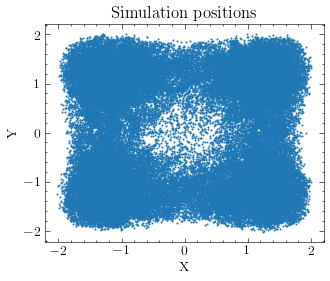

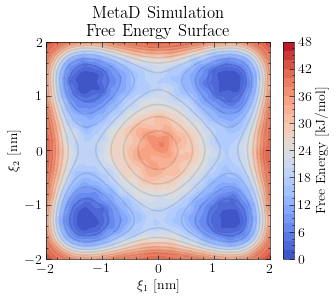

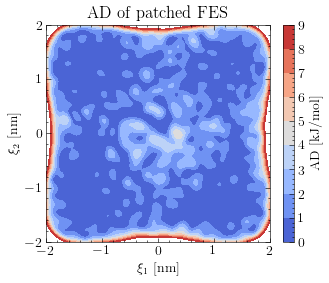

In [58]:
plt.scatter(position_x,position_y,s=1)
plt.title("Simulation positions")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

plt.figure(1)
plt.contourf(X, Y, FES, levels=range(0,50,2), cmap='coolwarm');
plt.colorbar(label="Free Energy [kJ/mol]")
plt.contour(X, Y, Z, levels=range(0,50,5), colors="black", alpha=0.1);
plt.xlabel(r"$\xi_1$ [nm]")
plt.ylabel(r"$\xi_2$ [nm]")
plt.title("MetaD Simulation \nFree Energy Surface")
plt.show()

plt.figure(2)
plt.contourf(X, Y, AD, cmap='coolwarm', levels=range(0,10,1))#
plt.colorbar(label="AD [kJ/mol]")
plt.xlabel(r"$\xi_1$ [nm]")
plt.ylabel(r"$\xi_2$ [nm]")
plt.title("AD of patched FES")
plt.show()

Now that there are two independent simulations they can patched together. 

For this purpose, the force terms are collected in a list called "master"

In [59]:
def patch_2D(master_array):

    FX = np.zeros((nbins, nbins))
    FY = np.zeros((nbins, nbins))
    FP = np.zeros((nbins, nbins))

    for i in range(len(master)):
        FX += master_array[i][0] * master_array[i][1]
        FY += master_array[i][0] * master_array[i][2]
        FP += master_array[i][0]

    FX = np.divide(FX, FP, out=np.zeros_like(FX), where=FP != 0)
    FY = np.divide(FY, FP, out=np.zeros_like(FY), where=FP != 0)
    
    return [FP, FX, FY]

master = []
master.append([Ftot_den0, Ftot_x0, Ftot_y0])
master.append([Ftot_den, Ftot_x, Ftot_y])

[Ftot_den_patch, Ftot_x_patch, Ftot_y_patch] = patch_2D(master)



In [61]:
FES = FFT_intg_2D(Ftot_x_patch, Ftot_y_patch)

(AD, AAD) = error_2D(FES)

The AAD of the FES is: 2.617263265516199


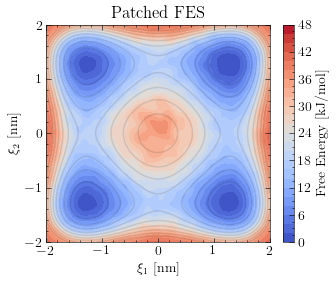

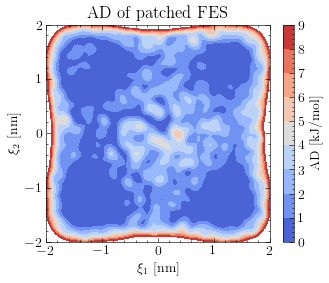

In [62]:
plt.figure(1)
plt.contourf(X, Y, FES, levels=range(0,50,2), cmap='coolwarm');
plt.colorbar(label="Free Energy [kJ/mol]")
plt.contour(X, Y, Z, levels=range(0,50,5), colors="black", alpha=0.1);
plt.xlabel(r"$\xi_1$ [nm]")
plt.ylabel(r"$\xi_2$ [nm]")
plt.title("Patched  FES")


plt.figure(2)
plt.contourf(X, Y, AD, cmap='coolwarm', levels=range(0,10,1))#
plt.colorbar(label="AD [kJ/mol]")
plt.xlabel(r"$\xi_1$ [nm]")
plt.ylabel(r"$\xi_2$ [nm]")
plt.title("AD of patched FES")
plt.show()

Although the patch FES is better than the FES from the first simulation, it is slightly worse than the FES from the second simulation.

This is not necessarily a typical feature of the patching technique. For very simple systems like the one above, it is sometimes enough to run one simulation with a good choice of parameters. However, the patching technique can be very usefull for more complex systems where running only one simulation might be inadequate. Additionally, more somplex siulation set-up's are possible, such as combining a metadynamcis simulation with a umbrella sampling simulaton, which will be discussed in the next notebook.